In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment import *
from experiment_train import *
from keras.datasets import mnist, boston_housing
from scipy.special import expit
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


Initialized TensorFlow


In [24]:
# network configuration
N = [100]
p = 0.01
p_inference = [0, p, 0]
KLips = 1
activation = 'sigmoid'

In [25]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train = x_train[:10]
y_train = y_train[:10]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_291 (Dense)            (None, 100)               1400      
_________________________________________________________________
dense_292 (Dense)            (None, 1)                 101       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________
Train on 10 samples, validate on 10 samples
Epoch 1/10000
10/10 [==============================] - 1s 53ms/step - loss: 680.3033 - acc: 0.0000e+00 - mean_squared_error: 680.3033 - mean_absolute_error: 23.0093 - val_loss: 673.5048 - val_acc: 0.0000e+00 - val_mean_squared_error: 673.5048 - val_mean_absolute_error: 22.8860
Epoch 2/10000
10/10 [==============================] - 0s 289us/step - loss: 673.5048 - acc: 0.0000e+00 - mean_squared_error: 673.5048 - mean_absolute_error: 22.8860 - val_loss: 667.0945 - val_acc: 0.0000e+00 - val

Epoch 29/10000
10/10 [==============================] - 0s 173us/step - loss: 569.8275 - acc: 0.0000e+00 - mean_squared_error: 569.8275 - mean_absolute_error: 20.4838 - val_loss: 566.5453 - val_acc: 0.0000e+00 - val_mean_squared_error: 566.5453 - val_mean_absolute_error: 20.4035
Epoch 30/10000
10/10 [==============================] - 0s 172us/step - loss: 566.5453 - acc: 0.0000e+00 - mean_squared_error: 566.5453 - mean_absolute_error: 20.4035 - val_loss: 563.2833 - val_acc: 0.0000e+00 - val_mean_squared_error: 563.2833 - val_mean_absolute_error: 20.3235
Epoch 31/10000
10/10 [==============================] - 0s 186us/step - loss: 563.2834 - acc: 0.0000e+00 - mean_squared_error: 563.2834 - mean_absolute_error: 20.3235 - val_loss: 560.0416 - val_acc: 0.0000e+00 - val_mean_squared_error: 560.0416 - val_mean_absolute_error: 20.2436
Epoch 32/10000
10/10 [==============================] - 0s 175us/step - loss: 560.0416 - acc: 0.0000e+00 - mean_squared_error: 560.0416 - mean_absolute_error: 2

Epoch 59/10000
10/10 [==============================] - 0s 213us/step - loss: 479.9277 - acc: 0.0000e+00 - mean_squared_error: 479.9277 - mean_absolute_error: 18.1587 - val_loss: 477.2251 - val_acc: 0.0000e+00 - val_mean_squared_error: 477.2251 - val_mean_absolute_error: 18.0842
Epoch 60/10000
10/10 [==============================] - 0s 192us/step - loss: 477.2251 - acc: 0.0000e+00 - mean_squared_error: 477.2251 - mean_absolute_error: 18.0842 - val_loss: 474.5405 - val_acc: 0.0000e+00 - val_mean_squared_error: 474.5405 - val_mean_absolute_error: 18.0099
Epoch 61/10000
10/10 [==============================] - 0s 181us/step - loss: 474.5405 - acc: 0.0000e+00 - mean_squared_error: 474.5405 - mean_absolute_error: 18.0099 - val_loss: 471.8739 - val_acc: 0.0000e+00 - val_mean_squared_error: 471.8739 - val_mean_absolute_error: 17.9358
Epoch 62/10000
10/10 [==============================] - 0s 177us/step - loss: 471.8739 - acc: 0.0000e+00 - mean_squared_error: 471.8739 - mean_absolute_error: 1

Epoch 89/10000
10/10 [==============================] - 0s 211us/step - loss: 405.5988 - acc: 0.0000e+00 - mean_squared_error: 405.5988 - mean_absolute_error: 15.9969 - val_loss: 403.4211 - val_acc: 0.0000e+00 - val_mean_squared_error: 403.4211 - val_mean_absolute_error: 15.9286
Epoch 90/10000
10/10 [==============================] - 0s 183us/step - loss: 403.4212 - acc: 0.0000e+00 - mean_squared_error: 403.4212 - mean_absolute_error: 15.9286 - val_loss: 401.2442 - val_acc: 0.0000e+00 - val_mean_squared_error: 401.2442 - val_mean_absolute_error: 15.8597
Epoch 91/10000
10/10 [==============================] - 0s 209us/step - loss: 401.2441 - acc: 0.0000e+00 - mean_squared_error: 401.2441 - mean_absolute_error: 15.8597 - val_loss: 399.0589 - val_acc: 0.0000e+00 - val_mean_squared_error: 399.0589 - val_mean_absolute_error: 15.7895
Epoch 92/10000
10/10 [==============================] - 0s 228us/step - loss: 399.0589 - acc: 0.0000e+00 - mean_squared_error: 399.0589 - mean_absolute_error: 1

Epoch 119/10000
10/10 [==============================] - 0s 174us/step - loss: 345.6683 - acc: 0.0000e+00 - mean_squared_error: 345.6683 - mean_absolute_error: 13.9637 - val_loss: 343.9110 - val_acc: 0.0000e+00 - val_mean_squared_error: 343.9110 - val_mean_absolute_error: 13.9004
Epoch 120/10000
10/10 [==============================] - 0s 170us/step - loss: 343.9110 - acc: 0.0000e+00 - mean_squared_error: 343.9110 - mean_absolute_error: 13.9004 - val_loss: 342.1664 - val_acc: 0.0000e+00 - val_mean_squared_error: 342.1664 - val_mean_absolute_error: 13.8373
Epoch 121/10000
10/10 [==============================] - 0s 176us/step - loss: 342.1664 - acc: 0.0000e+00 - mean_squared_error: 342.1664 - mean_absolute_error: 13.8373 - val_loss: 340.4345 - val_acc: 0.0000e+00 - val_mean_squared_error: 340.4345 - val_mean_absolute_error: 13.7743
Epoch 122/10000
10/10 [==============================] - 0s 192us/step - loss: 340.4345 - acc: 0.0000e+00 - mean_squared_error: 340.4345 - mean_absolute_erro

Epoch 149/10000
10/10 [==============================] - 0s 177us/step - loss: 297.8968 - acc: 0.0000e+00 - mean_squared_error: 297.8968 - mean_absolute_error: 12.1342 - val_loss: 296.4738 - val_acc: 0.0000e+00 - val_mean_squared_error: 296.4738 - val_mean_absolute_error: 12.0754
Epoch 150/10000
10/10 [==============================] - 0s 215us/step - loss: 296.4738 - acc: 0.0000e+00 - mean_squared_error: 296.4738 - mean_absolute_error: 12.0754 - val_loss: 295.0615 - val_acc: 0.0000e+00 - val_mean_squared_error: 295.0615 - val_mean_absolute_error: 12.0167
Epoch 151/10000
10/10 [==============================] - 0s 217us/step - loss: 295.0615 - acc: 0.0000e+00 - mean_squared_error: 295.0615 - mean_absolute_error: 12.0167 - val_loss: 293.6600 - val_acc: 0.0000e+00 - val_mean_squared_error: 293.6600 - val_mean_absolute_error: 11.9582
Epoch 152/10000
10/10 [==============================] - 0s 188us/step - loss: 293.6600 - acc: 0.0000e+00 - mean_squared_error: 293.6600 - mean_absolute_erro

Epoch 179/10000
10/10 [==============================] - 0s 186us/step - loss: 259.4870 - acc: 0.0000e+00 - mean_squared_error: 259.4870 - mean_absolute_error: 10.5229 - val_loss: 258.3576 - val_acc: 0.0000e+00 - val_mean_squared_error: 258.3576 - val_mean_absolute_error: 10.4793
Epoch 180/10000
10/10 [==============================] - 0s 202us/step - loss: 258.3576 - acc: 0.0000e+00 - mean_squared_error: 258.3576 - mean_absolute_error: 10.4793 - val_loss: 257.2372 - val_acc: 0.0000e+00 - val_mean_squared_error: 257.2372 - val_mean_absolute_error: 10.4359
Epoch 181/10000
10/10 [==============================] - 0s 179us/step - loss: 257.2372 - acc: 0.0000e+00 - mean_squared_error: 257.2372 - mean_absolute_error: 10.4359 - val_loss: 256.1257 - val_acc: 0.0000e+00 - val_mean_squared_error: 256.1257 - val_mean_absolute_error: 10.3927
Epoch 182/10000
10/10 [==============================] - 0s 183us/step - loss: 256.1257 - acc: 0.0000e+00 - mean_squared_error: 256.1257 - mean_absolute_erro

Epoch 209/10000
10/10 [==============================] - 0s 198us/step - loss: 229.3060 - acc: 0.0000e+00 - mean_squared_error: 229.3060 - mean_absolute_error: 9.2708 - val_loss: 228.4233 - val_acc: 0.0000e+00 - val_mean_squared_error: 228.4233 - val_mean_absolute_error: 9.2309
Epoch 210/10000
10/10 [==============================] - 0s 175us/step - loss: 228.4233 - acc: 0.0000e+00 - mean_squared_error: 228.4233 - mean_absolute_error: 9.2309 - val_loss: 227.5421 - val_acc: 0.0000e+00 - val_mean_squared_error: 227.5421 - val_mean_absolute_error: 9.1896
Epoch 211/10000
10/10 [==============================] - 0s 179us/step - loss: 227.5421 - acc: 0.0000e+00 - mean_squared_error: 227.5421 - mean_absolute_error: 9.1896 - val_loss: 226.5798 - val_acc: 0.0000e+00 - val_mean_squared_error: 226.5798 - val_mean_absolute_error: 9.1043
Epoch 212/10000
10/10 [==============================] - 0s 182us/step - loss: 226.5799 - acc: 0.0000e+00 - mean_squared_error: 226.5799 - mean_absolute_error: 9.1

Epoch 239/10000
10/10 [==============================] - 0s 179us/step - loss: 205.8654 - acc: 0.0000e+00 - mean_squared_error: 205.8654 - mean_absolute_error: 8.3808 - val_loss: 205.1857 - val_acc: 0.0000e+00 - val_mean_squared_error: 205.1857 - val_mean_absolute_error: 8.3630
Epoch 240/10000
10/10 [==============================] - 0s 183us/step - loss: 205.1857 - acc: 0.0000e+00 - mean_squared_error: 205.1857 - mean_absolute_error: 8.3630 - val_loss: 204.5120 - val_acc: 0.0000e+00 - val_mean_squared_error: 204.5120 - val_mean_absolute_error: 8.3452
Epoch 241/10000
10/10 [==============================] - 0s 178us/step - loss: 204.5120 - acc: 0.0000e+00 - mean_squared_error: 204.5120 - mean_absolute_error: 8.3452 - val_loss: 203.8442 - val_acc: 0.0000e+00 - val_mean_squared_error: 203.8442 - val_mean_absolute_error: 8.3274
Epoch 242/10000
10/10 [==============================] - 0s 190us/step - loss: 203.8442 - acc: 0.0000e+00 - mean_squared_error: 203.8442 - mean_absolute_error: 8.3

Epoch 269/10000
10/10 [==============================] - 0s 206us/step - loss: 186.9583 - acc: 0.0000e+00 - mean_squared_error: 186.9583 - mean_absolute_error: 7.8878 - val_loss: 186.4131 - val_acc: 0.0000e+00 - val_mean_squared_error: 186.4131 - val_mean_absolute_error: 7.8875
Epoch 270/10000
10/10 [==============================] - 0s 188us/step - loss: 186.4131 - acc: 0.0000e+00 - mean_squared_error: 186.4131 - mean_absolute_error: 7.8875 - val_loss: 185.8729 - val_acc: 0.0000e+00 - val_mean_squared_error: 185.8729 - val_mean_absolute_error: 7.8872
Epoch 271/10000
10/10 [==============================] - 0s 178us/step - loss: 185.8729 - acc: 0.0000e+00 - mean_squared_error: 185.8729 - mean_absolute_error: 7.8872 - val_loss: 185.3379 - val_acc: 0.0000e+00 - val_mean_squared_error: 185.3379 - val_mean_absolute_error: 7.8869
Epoch 272/10000
10/10 [==============================] - 0s 184us/step - loss: 185.3378 - acc: 0.0000e+00 - mean_squared_error: 185.3378 - mean_absolute_error: 7.8

Epoch 299/10000
10/10 [==============================] - 0s 176us/step - loss: 172.2079 - acc: 0.0000e+00 - mean_squared_error: 172.2079 - mean_absolute_error: 7.7600 - val_loss: 171.7398 - val_acc: 0.0000e+00 - val_mean_squared_error: 171.7398 - val_mean_absolute_error: 7.7478
Epoch 300/10000
10/10 [==============================] - 0s 185us/step - loss: 171.7398 - acc: 0.0000e+00 - mean_squared_error: 171.7398 - mean_absolute_error: 7.7478 - val_loss: 171.3226 - val_acc: 0.0000e+00 - val_mean_squared_error: 171.3226 - val_mean_absolute_error: 7.7477
Epoch 301/10000
10/10 [==============================] - 0s 189us/step - loss: 171.3226 - acc: 0.0000e+00 - mean_squared_error: 171.3226 - mean_absolute_error: 7.7477 - val_loss: 170.9099 - val_acc: 0.0000e+00 - val_mean_squared_error: 170.9099 - val_mean_absolute_error: 7.7475
Epoch 302/10000
10/10 [==============================] - 0s 174us/step - loss: 170.9099 - acc: 0.0000e+00 - mean_squared_error: 170.9099 - mean_absolute_error: 7.7

Epoch 329/10000
10/10 [==============================] - 0s 186us/step - loss: 160.9872 - acc: 0.0000e+00 - mean_squared_error: 160.9872 - mean_absolute_error: 7.7195 - val_loss: 160.6743 - val_acc: 0.0000e+00 - val_mean_squared_error: 160.6743 - val_mean_absolute_error: 7.7263
Epoch 330/10000
10/10 [==============================] - 0s 179us/step - loss: 160.6743 - acc: 0.0000e+00 - mean_squared_error: 160.6743 - mean_absolute_error: 7.7263 - val_loss: 160.3650 - val_acc: 0.0000e+00 - val_mean_squared_error: 160.3650 - val_mean_absolute_error: 7.7330
Epoch 331/10000
10/10 [==============================] - 0s 181us/step - loss: 160.3651 - acc: 0.0000e+00 - mean_squared_error: 160.3651 - mean_absolute_error: 7.7330 - val_loss: 160.0595 - val_acc: 0.0000e+00 - val_mean_squared_error: 160.0595 - val_mean_absolute_error: 7.7398
Epoch 332/10000
10/10 [==============================] - 0s 179us/step - loss: 160.0595 - acc: 0.0000e+00 - mean_squared_error: 160.0595 - mean_absolute_error: 7.7

Epoch 359/10000
10/10 [==============================] - 0s 179us/step - loss: 153.0804 - acc: 0.0000e+00 - mean_squared_error: 153.0804 - mean_absolute_error: 7.9099 - val_loss: 152.8651 - val_acc: 0.0000e+00 - val_mean_squared_error: 152.8651 - val_mean_absolute_error: 7.9158
Epoch 360/10000
10/10 [==============================] - 0s 197us/step - loss: 152.8651 - acc: 0.0000e+00 - mean_squared_error: 152.8651 - mean_absolute_error: 7.9158 - val_loss: 152.6526 - val_acc: 0.0000e+00 - val_mean_squared_error: 152.6526 - val_mean_absolute_error: 7.9216
Epoch 361/10000
10/10 [==============================] - 0s 201us/step - loss: 152.6526 - acc: 0.0000e+00 - mean_squared_error: 152.6526 - mean_absolute_error: 7.9216 - val_loss: 152.4429 - val_acc: 0.0000e+00 - val_mean_squared_error: 152.4429 - val_mean_absolute_error: 7.9274
Epoch 362/10000
10/10 [==============================] - 0s 180us/step - loss: 152.4429 - acc: 0.0000e+00 - mean_squared_error: 152.4429 - mean_absolute_error: 7.9

Epoch 389/10000
10/10 [==============================] - 0s 184us/step - loss: 147.6989 - acc: 0.0000e+00 - mean_squared_error: 147.6989 - mean_absolute_error: 8.1544 - val_loss: 148.6450 - val_acc: 0.0000e+00 - val_mean_squared_error: 148.6450 - val_mean_absolute_error: 8.2789
Epoch 390/10000
10/10 [==============================] - 0s 188us/step - loss: 148.6450 - acc: 0.0000e+00 - mean_squared_error: 148.6450 - mean_absolute_error: 8.2789 - val_loss: 147.8061 - val_acc: 0.0000e+00 - val_mean_squared_error: 147.8061 - val_mean_absolute_error: 8.2486
Epoch 391/10000
10/10 [==============================] - 0s 185us/step - loss: 147.8061 - acc: 0.0000e+00 - mean_squared_error: 147.8061 - mean_absolute_error: 8.2486 - val_loss: 146.6621 - val_acc: 0.0000e+00 - val_mean_squared_error: 146.6621 - val_mean_absolute_error: 8.1813
Epoch 392/10000
10/10 [==============================] - 0s 189us/step - loss: 146.6621 - acc: 0.0000e+00 - mean_squared_error: 146.6621 - mean_absolute_error: 8.1

Epoch 419/10000
10/10 [==============================] - 0s 175us/step - loss: 143.3082 - acc: 0.0000e+00 - mean_squared_error: 143.3082 - mean_absolute_error: 8.4175 - val_loss: 143.2096 - val_acc: 0.0000e+00 - val_mean_squared_error: 143.2096 - val_mean_absolute_error: 8.4253
Epoch 420/10000
10/10 [==============================] - 0s 204us/step - loss: 143.2096 - acc: 0.0000e+00 - mean_squared_error: 143.2096 - mean_absolute_error: 8.4253 - val_loss: 143.1123 - val_acc: 0.0000e+00 - val_mean_squared_error: 143.1123 - val_mean_absolute_error: 8.4331
Epoch 421/10000
10/10 [==============================] - 0s 184us/step - loss: 143.1123 - acc: 0.0000e+00 - mean_squared_error: 143.1123 - mean_absolute_error: 8.4331 - val_loss: 143.0164 - val_acc: 0.0000e+00 - val_mean_squared_error: 143.0164 - val_mean_absolute_error: 8.4408
Epoch 422/10000
10/10 [==============================] - 0s 217us/step - loss: 143.0164 - acc: 0.0000e+00 - mean_squared_error: 143.0164 - mean_absolute_error: 8.4

Epoch 449/10000
10/10 [==============================] - 0s 237us/step - loss: 140.8320 - acc: 0.0000e+00 - mean_squared_error: 140.8320 - mean_absolute_error: 8.6143 - val_loss: 140.7630 - val_acc: 0.0000e+00 - val_mean_squared_error: 140.7630 - val_mean_absolute_error: 8.6196
Epoch 450/10000
10/10 [==============================] - 0s 200us/step - loss: 140.7630 - acc: 0.0000e+00 - mean_squared_error: 140.7630 - mean_absolute_error: 8.6196 - val_loss: 140.6947 - val_acc: 0.0000e+00 - val_mean_squared_error: 140.6947 - val_mean_absolute_error: 8.6247
Epoch 451/10000
10/10 [==============================] - 0s 225us/step - loss: 140.6947 - acc: 0.0000e+00 - mean_squared_error: 140.6947 - mean_absolute_error: 8.6247 - val_loss: 140.6270 - val_acc: 0.0000e+00 - val_mean_squared_error: 140.6270 - val_mean_absolute_error: 8.6297
Epoch 452/10000
10/10 [==============================] - 0s 185us/step - loss: 140.6270 - acc: 0.0000e+00 - mean_squared_error: 140.6270 - mean_absolute_error: 8.6

Epoch 479/10000
10/10 [==============================] - 0s 182us/step - loss: 138.6306 - acc: 0.0000e+00 - mean_squared_error: 138.6306 - mean_absolute_error: 8.7114 - val_loss: 138.5569 - val_acc: 0.0000e+00 - val_mean_squared_error: 138.5569 - val_mean_absolute_error: 8.7132
Epoch 480/10000
10/10 [==============================] - 0s 196us/step - loss: 138.5569 - acc: 0.0000e+00 - mean_squared_error: 138.5569 - mean_absolute_error: 8.7132 - val_loss: 138.4834 - val_acc: 0.0000e+00 - val_mean_squared_error: 138.4834 - val_mean_absolute_error: 8.7150
Epoch 481/10000
10/10 [==============================] - 0s 185us/step - loss: 138.4834 - acc: 0.0000e+00 - mean_squared_error: 138.4834 - mean_absolute_error: 8.7150 - val_loss: 138.4100 - val_acc: 0.0000e+00 - val_mean_squared_error: 138.4100 - val_mean_absolute_error: 8.7167
Epoch 482/10000
10/10 [==============================] - 0s 194us/step - loss: 138.4100 - acc: 0.0000e+00 - mean_squared_error: 138.4100 - mean_absolute_error: 8.7

Epoch 509/10000
10/10 [==============================] - 0s 188us/step - loss: 136.4743 - acc: 0.0000e+00 - mean_squared_error: 136.4743 - mean_absolute_error: 8.7601 - val_loss: 136.4037 - val_acc: 0.0000e+00 - val_mean_squared_error: 136.4037 - val_mean_absolute_error: 8.7618
Epoch 510/10000
10/10 [==============================] - 0s 189us/step - loss: 136.4037 - acc: 0.0000e+00 - mean_squared_error: 136.4037 - mean_absolute_error: 8.7618 - val_loss: 136.3330 - val_acc: 0.0000e+00 - val_mean_squared_error: 136.3330 - val_mean_absolute_error: 8.7634
Epoch 511/10000
10/10 [==============================] - 0s 179us/step - loss: 136.3330 - acc: 0.0000e+00 - mean_squared_error: 136.3330 - mean_absolute_error: 8.7634 - val_loss: 136.2625 - val_acc: 0.0000e+00 - val_mean_squared_error: 136.2625 - val_mean_absolute_error: 8.7649
Epoch 512/10000
10/10 [==============================] - 0s 182us/step - loss: 136.2625 - acc: 0.0000e+00 - mean_squared_error: 136.2625 - mean_absolute_error: 8.7

Epoch 539/10000
10/10 [==============================] - 0s 179us/step - loss: 134.3610 - acc: 0.0000e+00 - mean_squared_error: 134.3610 - mean_absolute_error: 8.7815 - val_loss: 134.2902 - val_acc: 0.0000e+00 - val_mean_squared_error: 134.2902 - val_mean_absolute_error: 8.7811
Epoch 540/10000
10/10 [==============================] - 0s 187us/step - loss: 134.2902 - acc: 0.0000e+00 - mean_squared_error: 134.2902 - mean_absolute_error: 8.7811 - val_loss: 134.2190 - val_acc: 0.0000e+00 - val_mean_squared_error: 134.2190 - val_mean_absolute_error: 8.7807
Epoch 541/10000
10/10 [==============================] - 0s 183us/step - loss: 134.2190 - acc: 0.0000e+00 - mean_squared_error: 134.2190 - mean_absolute_error: 8.7807 - val_loss: 134.1471 - val_acc: 0.0000e+00 - val_mean_squared_error: 134.1471 - val_mean_absolute_error: 8.7799
Epoch 542/10000
10/10 [==============================] - 0s 176us/step - loss: 134.1471 - acc: 0.0000e+00 - mean_squared_error: 134.1471 - mean_absolute_error: 8.7

Epoch 569/10000
10/10 [==============================] - 0s 189us/step - loss: 131.8676 - acc: 0.0000e+00 - mean_squared_error: 131.8676 - mean_absolute_error: 8.7065 - val_loss: 131.3836 - val_acc: 0.0000e+00 - val_mean_squared_error: 131.3836 - val_mean_absolute_error: 8.6741
Epoch 570/10000
10/10 [==============================] - 0s 195us/step - loss: 131.3836 - acc: 0.0000e+00 - mean_squared_error: 131.3836 - mean_absolute_error: 8.6741 - val_loss: 130.8849 - val_acc: 0.0000e+00 - val_mean_squared_error: 130.8849 - val_mean_absolute_error: 8.6443
Epoch 571/10000
10/10 [==============================] - 0s 177us/step - loss: 130.8849 - acc: 0.0000e+00 - mean_squared_error: 130.8849 - mean_absolute_error: 8.6443 - val_loss: 130.7549 - val_acc: 0.0000e+00 - val_mean_squared_error: 130.7549 - val_mean_absolute_error: 8.6434
Epoch 572/10000
10/10 [==============================] - 0s 187us/step - loss: 130.7548 - acc: 0.0000e+00 - mean_squared_error: 130.7548 - mean_absolute_error: 8.6

Epoch 599/10000
10/10 [==============================] - 0s 181us/step - loss: 128.7159 - acc: 0.0000e+00 - mean_squared_error: 128.7159 - mean_absolute_error: 8.6315 - val_loss: 128.6412 - val_acc: 0.0000e+00 - val_mean_squared_error: 128.6412 - val_mean_absolute_error: 8.6292
Epoch 600/10000
10/10 [==============================] - 0s 196us/step - loss: 128.6412 - acc: 0.0000e+00 - mean_squared_error: 128.6412 - mean_absolute_error: 8.6292 - val_loss: 128.5665 - val_acc: 0.0000e+00 - val_mean_squared_error: 128.5665 - val_mean_absolute_error: 8.6269
Epoch 601/10000
10/10 [==============================] - 0s 171us/step - loss: 128.5665 - acc: 0.0000e+00 - mean_squared_error: 128.5665 - mean_absolute_error: 8.6269 - val_loss: 128.4919 - val_acc: 0.0000e+00 - val_mean_squared_error: 128.4919 - val_mean_absolute_error: 8.6245
Epoch 602/10000
10/10 [==============================] - 0s 179us/step - loss: 128.4919 - acc: 0.0000e+00 - mean_squared_error: 128.4919 - mean_absolute_error: 8.6

Epoch 629/10000
10/10 [==============================] - 0s 224us/step - loss: 126.2125 - acc: 0.0000e+00 - mean_squared_error: 126.2125 - mean_absolute_error: 8.5383 - val_loss: 126.1217 - val_acc: 0.0000e+00 - val_mean_squared_error: 126.1217 - val_mean_absolute_error: 8.5351
Epoch 630/10000
10/10 [==============================] - 0s 219us/step - loss: 126.1217 - acc: 0.0000e+00 - mean_squared_error: 126.1217 - mean_absolute_error: 8.5351 - val_loss: 126.0310 - val_acc: 0.0000e+00 - val_mean_squared_error: 126.0310 - val_mean_absolute_error: 8.5319
Epoch 631/10000
10/10 [==============================] - 0s 177us/step - loss: 126.0310 - acc: 0.0000e+00 - mean_squared_error: 126.0310 - mean_absolute_error: 8.5319 - val_loss: 125.9403 - val_acc: 0.0000e+00 - val_mean_squared_error: 125.9403 - val_mean_absolute_error: 8.5286
Epoch 632/10000
10/10 [==============================] - 0s 175us/step - loss: 125.9403 - acc: 0.0000e+00 - mean_squared_error: 125.9403 - mean_absolute_error: 8.5

Epoch 659/10000
10/10 [==============================] - 0s 182us/step - loss: 123.5038 - acc: 0.0000e+00 - mean_squared_error: 123.5038 - mean_absolute_error: 8.4392 - val_loss: 123.4140 - val_acc: 0.0000e+00 - val_mean_squared_error: 123.4140 - val_mean_absolute_error: 8.4358
Epoch 660/10000
10/10 [==============================] - 0s 175us/step - loss: 123.4140 - acc: 0.0000e+00 - mean_squared_error: 123.4140 - mean_absolute_error: 8.4358 - val_loss: 123.3243 - val_acc: 0.0000e+00 - val_mean_squared_error: 123.3243 - val_mean_absolute_error: 8.4323
Epoch 661/10000
10/10 [==============================] - 0s 191us/step - loss: 123.3243 - acc: 0.0000e+00 - mean_squared_error: 123.3243 - mean_absolute_error: 8.4323 - val_loss: 123.2346 - val_acc: 0.0000e+00 - val_mean_squared_error: 123.2346 - val_mean_absolute_error: 8.4289
Epoch 662/10000
10/10 [==============================] - 0s 211us/step - loss: 123.2346 - acc: 0.0000e+00 - mean_squared_error: 123.2346 - mean_absolute_error: 8.4

Epoch 689/10000
10/10 [==============================] - 0s 180us/step - loss: 120.8263 - acc: 0.0000e+00 - mean_squared_error: 120.8263 - mean_absolute_error: 8.3350 - val_loss: 120.7376 - val_acc: 0.0000e+00 - val_mean_squared_error: 120.7376 - val_mean_absolute_error: 8.3315
Epoch 690/10000
10/10 [==============================] - 0s 191us/step - loss: 120.7376 - acc: 0.0000e+00 - mean_squared_error: 120.7376 - mean_absolute_error: 8.3315 - val_loss: 120.6489 - val_acc: 0.0000e+00 - val_mean_squared_error: 120.6489 - val_mean_absolute_error: 8.3280
Epoch 691/10000
10/10 [==============================] - 0s 185us/step - loss: 120.6489 - acc: 0.0000e+00 - mean_squared_error: 120.6489 - mean_absolute_error: 8.3280 - val_loss: 120.5603 - val_acc: 0.0000e+00 - val_mean_squared_error: 120.5603 - val_mean_absolute_error: 8.3244
Epoch 692/10000
10/10 [==============================] - 0s 188us/step - loss: 120.5603 - acc: 0.0000e+00 - mean_squared_error: 120.5603 - mean_absolute_error: 8.3

Epoch 719/10000
10/10 [==============================] - 0s 190us/step - loss: 118.1806 - acc: 0.0000e+00 - mean_squared_error: 118.1806 - mean_absolute_error: 8.2287 - val_loss: 118.0930 - val_acc: 0.0000e+00 - val_mean_squared_error: 118.0930 - val_mean_absolute_error: 8.2251
Epoch 720/10000
10/10 [==============================] - 0s 198us/step - loss: 118.0930 - acc: 0.0000e+00 - mean_squared_error: 118.0930 - mean_absolute_error: 8.2251 - val_loss: 118.0053 - val_acc: 0.0000e+00 - val_mean_squared_error: 118.0053 - val_mean_absolute_error: 8.2216
Epoch 721/10000
10/10 [==============================] - 0s 184us/step - loss: 118.0053 - acc: 0.0000e+00 - mean_squared_error: 118.0053 - mean_absolute_error: 8.2216 - val_loss: 117.9178 - val_acc: 0.0000e+00 - val_mean_squared_error: 117.9178 - val_mean_absolute_error: 8.2180
Epoch 722/10000
10/10 [==============================] - 0s 198us/step - loss: 117.9178 - acc: 0.0000e+00 - mean_squared_error: 117.9178 - mean_absolute_error: 8.2

Epoch 749/10000
10/10 [==============================] - 0s 184us/step - loss: 115.5689 - acc: 0.0000e+00 - mean_squared_error: 115.5689 - mean_absolute_error: 8.1220 - val_loss: 115.1730 - val_acc: 0.0000e+00 - val_mean_squared_error: 115.1730 - val_mean_absolute_error: 8.0893
Epoch 750/10000
10/10 [==============================] - 0s 192us/step - loss: 115.1730 - acc: 0.0000e+00 - mean_squared_error: 115.1730 - mean_absolute_error: 8.0893 - val_loss: 115.0777 - val_acc: 0.0000e+00 - val_mean_squared_error: 115.0777 - val_mean_absolute_error: 8.1063
Epoch 751/10000
10/10 [==============================] - 0s 175us/step - loss: 115.0777 - acc: 0.0000e+00 - mean_squared_error: 115.0777 - mean_absolute_error: 8.1063 - val_loss: 114.9858 - val_acc: 0.0000e+00 - val_mean_squared_error: 114.9858 - val_mean_absolute_error: 8.0968
Epoch 752/10000
10/10 [==============================] - 0s 191us/step - loss: 114.9858 - acc: 0.0000e+00 - mean_squared_error: 114.9858 - mean_absolute_error: 8.0

Epoch 779/10000
10/10 [==============================] - 0s 178us/step - loss: 112.5422 - acc: 0.0000e+00 - mean_squared_error: 112.5422 - mean_absolute_error: 7.9950 - val_loss: 112.4525 - val_acc: 0.0000e+00 - val_mean_squared_error: 112.4525 - val_mean_absolute_error: 7.9912
Epoch 780/10000
10/10 [==============================] - 0s 199us/step - loss: 112.4525 - acc: 0.0000e+00 - mean_squared_error: 112.4525 - mean_absolute_error: 7.9912 - val_loss: 112.3630 - val_acc: 0.0000e+00 - val_mean_squared_error: 112.3630 - val_mean_absolute_error: 7.9874
Epoch 781/10000
10/10 [==============================] - 0s 182us/step - loss: 112.3629 - acc: 0.0000e+00 - mean_squared_error: 112.3629 - mean_absolute_error: 7.9874 - val_loss: 112.2734 - val_acc: 0.0000e+00 - val_mean_squared_error: 112.2734 - val_mean_absolute_error: 7.9836
Epoch 782/10000
10/10 [==============================] - 0s 203us/step - loss: 112.2734 - acc: 0.0000e+00 - mean_squared_error: 112.2734 - mean_absolute_error: 7.9

Epoch 809/10000
10/10 [==============================] - 0s 193us/step - loss: 109.8761 - acc: 0.0000e+00 - mean_squared_error: 109.8761 - mean_absolute_error: 7.8821 - val_loss: 109.7880 - val_acc: 0.0000e+00 - val_mean_squared_error: 109.7880 - val_mean_absolute_error: 7.8785
Epoch 810/10000
10/10 [==============================] - 0s 202us/step - loss: 109.7880 - acc: 0.0000e+00 - mean_squared_error: 109.7880 - mean_absolute_error: 7.8785 - val_loss: 109.7000 - val_acc: 0.0000e+00 - val_mean_squared_error: 109.7000 - val_mean_absolute_error: 7.8748
Epoch 811/10000
10/10 [==============================] - 0s 186us/step - loss: 109.7000 - acc: 0.0000e+00 - mean_squared_error: 109.7000 - mean_absolute_error: 7.8748 - val_loss: 109.6121 - val_acc: 0.0000e+00 - val_mean_squared_error: 109.6121 - val_mean_absolute_error: 7.8712
Epoch 812/10000
10/10 [==============================] - 0s 225us/step - loss: 109.6121 - acc: 0.0000e+00 - mean_squared_error: 109.6121 - mean_absolute_error: 7.8

Epoch 839/10000
10/10 [==============================] - 0s 189us/step - loss: 105.6961 - acc: 0.0000e+00 - mean_squared_error: 105.6961 - mean_absolute_error: 7.6907 - val_loss: 105.6053 - val_acc: 0.0000e+00 - val_mean_squared_error: 105.6053 - val_mean_absolute_error: 7.6882
Epoch 840/10000
10/10 [==============================] - 0s 187us/step - loss: 105.6053 - acc: 0.0000e+00 - mean_squared_error: 105.6053 - mean_absolute_error: 7.6882 - val_loss: 105.5145 - val_acc: 0.0000e+00 - val_mean_squared_error: 105.5145 - val_mean_absolute_error: 7.6847
Epoch 841/10000
10/10 [==============================] - 0s 214us/step - loss: 105.5145 - acc: 0.0000e+00 - mean_squared_error: 105.5145 - mean_absolute_error: 7.6847 - val_loss: 105.4239 - val_acc: 0.0000e+00 - val_mean_squared_error: 105.4239 - val_mean_absolute_error: 7.6808
Epoch 842/10000
10/10 [==============================] - 0s 195us/step - loss: 105.4239 - acc: 0.0000e+00 - mean_squared_error: 105.4239 - mean_absolute_error: 7.6

Epoch 869/10000
10/10 [==============================] - 0s 213us/step - loss: 103.0250 - acc: 0.0000e+00 - mean_squared_error: 103.0250 - mean_absolute_error: 7.5765 - val_loss: 102.8318 - val_acc: 0.0000e+00 - val_mean_squared_error: 102.8318 - val_mean_absolute_error: 7.5597
Epoch 870/10000
10/10 [==============================] - 0s 189us/step - loss: 102.8318 - acc: 0.0000e+00 - mean_squared_error: 102.8318 - mean_absolute_error: 7.5597 - val_loss: 102.1837 - val_acc: 0.0000e+00 - val_mean_squared_error: 102.1837 - val_mean_absolute_error: 7.4892
Epoch 871/10000
10/10 [==============================] - 0s 233us/step - loss: 102.1837 - acc: 0.0000e+00 - mean_squared_error: 102.1837 - mean_absolute_error: 7.4892 - val_loss: 101.6917 - val_acc: 0.0000e+00 - val_mean_squared_error: 101.6917 - val_mean_absolute_error: 7.4183
Epoch 872/10000
10/10 [==============================] - 0s 193us/step - loss: 101.6917 - acc: 0.0000e+00 - mean_squared_error: 101.6917 - mean_absolute_error: 7.4

Epoch 899/10000
10/10 [==============================] - 0s 212us/step - loss: 98.8291 - acc: 0.0000e+00 - mean_squared_error: 98.8291 - mean_absolute_error: 7.3557 - val_loss: 98.7422 - val_acc: 0.0000e+00 - val_mean_squared_error: 98.7422 - val_mean_absolute_error: 7.3516
Epoch 900/10000
10/10 [==============================] - 0s 198us/step - loss: 98.7422 - acc: 0.0000e+00 - mean_squared_error: 98.7422 - mean_absolute_error: 7.3516 - val_loss: 98.6554 - val_acc: 0.0000e+00 - val_mean_squared_error: 98.6554 - val_mean_absolute_error: 7.3476
Epoch 901/10000
10/10 [==============================] - 0s 195us/step - loss: 98.6554 - acc: 0.0000e+00 - mean_squared_error: 98.6554 - mean_absolute_error: 7.3476 - val_loss: 98.5687 - val_acc: 0.0000e+00 - val_mean_squared_error: 98.5687 - val_mean_absolute_error: 7.3436
Epoch 902/10000
10/10 [==============================] - 0s 174us/step - loss: 98.5687 - acc: 0.0000e+00 - mean_squared_error: 98.5687 - mean_absolute_error: 7.3436 - val_loss

Epoch 929/10000
10/10 [==============================] - 0s 229us/step - loss: 96.2673 - acc: 0.0000e+00 - mean_squared_error: 96.2673 - mean_absolute_error: 7.2369 - val_loss: 96.1833 - val_acc: 0.0000e+00 - val_mean_squared_error: 96.1833 - val_mean_absolute_error: 7.2330
Epoch 930/10000
10/10 [==============================] - 0s 187us/step - loss: 96.1833 - acc: 0.0000e+00 - mean_squared_error: 96.1833 - mean_absolute_error: 7.2330 - val_loss: 96.0993 - val_acc: 0.0000e+00 - val_mean_squared_error: 96.0993 - val_mean_absolute_error: 7.2291
Epoch 931/10000
10/10 [==============================] - 0s 204us/step - loss: 96.0993 - acc: 0.0000e+00 - mean_squared_error: 96.0993 - mean_absolute_error: 7.2291 - val_loss: 96.0153 - val_acc: 0.0000e+00 - val_mean_squared_error: 96.0153 - val_mean_absolute_error: 7.2252
Epoch 932/10000
10/10 [==============================] - 0s 186us/step - loss: 96.0153 - acc: 0.0000e+00 - mean_squared_error: 96.0153 - mean_absolute_error: 7.2252 - val_loss

Epoch 959/10000
10/10 [==============================] - 0s 180us/step - loss: 93.8278 - acc: 0.0000e+00 - mean_squared_error: 93.8278 - mean_absolute_error: 7.1240 - val_loss: 93.7456 - val_acc: 0.0000e+00 - val_mean_squared_error: 93.7456 - val_mean_absolute_error: 7.1202
Epoch 960/10000
10/10 [==============================] - 0s 202us/step - loss: 93.7456 - acc: 0.0000e+00 - mean_squared_error: 93.7456 - mean_absolute_error: 7.1202 - val_loss: 93.6635 - val_acc: 0.0000e+00 - val_mean_squared_error: 93.6635 - val_mean_absolute_error: 7.1163
Epoch 961/10000
10/10 [==============================] - 0s 192us/step - loss: 93.6635 - acc: 0.0000e+00 - mean_squared_error: 93.6635 - mean_absolute_error: 7.1163 - val_loss: 93.5814 - val_acc: 0.0000e+00 - val_mean_squared_error: 93.5814 - val_mean_absolute_error: 7.1124
Epoch 962/10000
10/10 [==============================] - 0s 203us/step - loss: 93.5814 - acc: 0.0000e+00 - mean_squared_error: 93.5814 - mean_absolute_error: 7.1124 - val_loss

Epoch 989/10000
10/10 [==============================] - 0s 173us/step - loss: 91.3933 - acc: 0.0000e+00 - mean_squared_error: 91.3933 - mean_absolute_error: 7.0080 - val_loss: 91.2868 - val_acc: 0.0000e+00 - val_mean_squared_error: 91.2868 - val_mean_absolute_error: 7.0016
Epoch 990/10000
10/10 [==============================] - 0s 194us/step - loss: 91.2868 - acc: 0.0000e+00 - mean_squared_error: 91.2868 - mean_absolute_error: 7.0016 - val_loss: 90.8481 - val_acc: 0.0000e+00 - val_mean_squared_error: 90.8481 - val_mean_absolute_error: 6.9780
Epoch 991/10000
10/10 [==============================] - 0s 182us/step - loss: 90.8481 - acc: 0.0000e+00 - mean_squared_error: 90.8481 - mean_absolute_error: 6.9780 - val_loss: 90.7516 - val_acc: 0.0000e+00 - val_mean_squared_error: 90.7516 - val_mean_absolute_error: 6.9834
Epoch 992/10000
10/10 [==============================] - 0s 177us/step - loss: 90.7516 - acc: 0.0000e+00 - mean_squared_error: 90.7516 - mean_absolute_error: 6.9834 - val_loss

Epoch 1019/10000
10/10 [==============================] - 0s 190us/step - loss: 88.3787 - acc: 0.0000e+00 - mean_squared_error: 88.3787 - mean_absolute_error: 6.8737 - val_loss: 88.2919 - val_acc: 0.0000e+00 - val_mean_squared_error: 88.2919 - val_mean_absolute_error: 6.8697
Epoch 1020/10000
10/10 [==============================] - 0s 221us/step - loss: 88.2919 - acc: 0.0000e+00 - mean_squared_error: 88.2919 - mean_absolute_error: 6.8697 - val_loss: 88.2051 - val_acc: 0.0000e+00 - val_mean_squared_error: 88.2051 - val_mean_absolute_error: 6.8657
Epoch 1021/10000
10/10 [==============================] - 0s 182us/step - loss: 88.2051 - acc: 0.0000e+00 - mean_squared_error: 88.2051 - mean_absolute_error: 6.8657 - val_loss: 88.1184 - val_acc: 0.0000e+00 - val_mean_squared_error: 88.1184 - val_mean_absolute_error: 6.8617
Epoch 1022/10000
10/10 [==============================] - 0s 179us/step - loss: 88.1184 - acc: 0.0000e+00 - mean_squared_error: 88.1184 - mean_absolute_error: 6.8617 - val_

Epoch 1049/10000
10/10 [==============================] - 0s 223us/step - loss: 85.8304 - acc: 0.0000e+00 - mean_squared_error: 85.8304 - mean_absolute_error: 6.7484 - val_loss: 85.7460 - val_acc: 0.0000e+00 - val_mean_squared_error: 85.7460 - val_mean_absolute_error: 6.7444
Epoch 1050/10000
10/10 [==============================] - 0s 180us/step - loss: 85.7460 - acc: 0.0000e+00 - mean_squared_error: 85.7460 - mean_absolute_error: 6.7444 - val_loss: 85.6617 - val_acc: 0.0000e+00 - val_mean_squared_error: 85.6617 - val_mean_absolute_error: 6.7404
Epoch 1051/10000
10/10 [==============================] - 0s 183us/step - loss: 85.6617 - acc: 0.0000e+00 - mean_squared_error: 85.6617 - mean_absolute_error: 6.7404 - val_loss: 85.5774 - val_acc: 0.0000e+00 - val_mean_squared_error: 85.5774 - val_mean_absolute_error: 6.7364
Epoch 1052/10000
10/10 [==============================] - 0s 193us/step - loss: 85.5774 - acc: 0.0000e+00 - mean_squared_error: 85.5774 - mean_absolute_error: 6.7364 - val_

Epoch 1079/10000
10/10 [==============================] - 0s 171us/step - loss: 83.3319 - acc: 0.0000e+00 - mean_squared_error: 83.3319 - mean_absolute_error: 6.6282 - val_loss: 83.2498 - val_acc: 0.0000e+00 - val_mean_squared_error: 83.2498 - val_mean_absolute_error: 6.6242
Epoch 1080/10000
10/10 [==============================] - 0s 190us/step - loss: 83.2498 - acc: 0.0000e+00 - mean_squared_error: 83.2498 - mean_absolute_error: 6.6242 - val_loss: 83.1677 - val_acc: 0.0000e+00 - val_mean_squared_error: 83.1677 - val_mean_absolute_error: 6.6201
Epoch 1081/10000
10/10 [==============================] - 0s 181us/step - loss: 83.1677 - acc: 0.0000e+00 - mean_squared_error: 83.1677 - mean_absolute_error: 6.6201 - val_loss: 83.0857 - val_acc: 0.0000e+00 - val_mean_squared_error: 83.0857 - val_mean_absolute_error: 6.6161
Epoch 1082/10000
10/10 [==============================] - 0s 177us/step - loss: 83.0857 - acc: 0.0000e+00 - mean_squared_error: 83.0857 - mean_absolute_error: 6.6161 - val_

Epoch 1109/10000
10/10 [==============================] - 0s 208us/step - loss: 80.8981 - acc: 0.0000e+00 - mean_squared_error: 80.8981 - mean_absolute_error: 6.5082 - val_loss: 80.8180 - val_acc: 0.0000e+00 - val_mean_squared_error: 80.8180 - val_mean_absolute_error: 6.5043
Epoch 1110/10000
10/10 [==============================] - 0s 189us/step - loss: 80.8180 - acc: 0.0000e+00 - mean_squared_error: 80.8180 - mean_absolute_error: 6.5043 - val_loss: 80.7381 - val_acc: 0.0000e+00 - val_mean_squared_error: 80.7381 - val_mean_absolute_error: 6.5003
Epoch 1111/10000
10/10 [==============================] - 0s 183us/step - loss: 80.7381 - acc: 0.0000e+00 - mean_squared_error: 80.7381 - mean_absolute_error: 6.5003 - val_loss: 80.6581 - val_acc: 0.0000e+00 - val_mean_squared_error: 80.6581 - val_mean_absolute_error: 6.4963
Epoch 1112/10000
10/10 [==============================] - 0s 179us/step - loss: 80.6581 - acc: 0.0000e+00 - mean_squared_error: 80.6581 - mean_absolute_error: 6.4963 - val_

Epoch 1139/10000
10/10 [==============================] - 0s 234us/step - loss: 78.5275 - acc: 0.0000e+00 - mean_squared_error: 78.5275 - mean_absolute_error: 6.4053 - val_loss: 78.4499 - val_acc: 0.0000e+00 - val_mean_squared_error: 78.4499 - val_mean_absolute_error: 6.3725
Epoch 1140/10000
10/10 [==============================] - 0s 193us/step - loss: 78.4499 - acc: 0.0000e+00 - mean_squared_error: 78.4499 - mean_absolute_error: 6.3725 - val_loss: 78.3721 - val_acc: 0.0000e+00 - val_mean_squared_error: 78.3721 - val_mean_absolute_error: 6.4010
Epoch 1141/10000
10/10 [==============================] - 0s 188us/step - loss: 78.3721 - acc: 0.0000e+00 - mean_squared_error: 78.3721 - mean_absolute_error: 6.4010 - val_loss: 78.2943 - val_acc: 0.0000e+00 - val_mean_squared_error: 78.2943 - val_mean_absolute_error: 6.3636
Epoch 1142/10000
10/10 [==============================] - 0s 212us/step - loss: 78.2943 - acc: 0.0000e+00 - mean_squared_error: 78.2943 - mean_absolute_error: 6.3636 - val_

Epoch 1169/10000
10/10 [==============================] - 0s 173us/step - loss: 76.2331 - acc: 0.0000e+00 - mean_squared_error: 76.2331 - mean_absolute_error: 6.2808 - val_loss: 76.1571 - val_acc: 0.0000e+00 - val_mean_squared_error: 76.1571 - val_mean_absolute_error: 6.2633
Epoch 1170/10000
10/10 [==============================] - 0s 174us/step - loss: 76.1571 - acc: 0.0000e+00 - mean_squared_error: 76.1571 - mean_absolute_error: 6.2633 - val_loss: 76.0811 - val_acc: 0.0000e+00 - val_mean_squared_error: 76.0811 - val_mean_absolute_error: 6.2687
Epoch 1171/10000
10/10 [==============================] - 0s 196us/step - loss: 76.0811 - acc: 0.0000e+00 - mean_squared_error: 76.0811 - mean_absolute_error: 6.2687 - val_loss: 76.0053 - val_acc: 0.0000e+00 - val_mean_squared_error: 76.0053 - val_mean_absolute_error: 6.2576
Epoch 1172/10000
10/10 [==============================] - 0s 212us/step - loss: 76.0053 - acc: 0.0000e+00 - mean_squared_error: 76.0053 - mean_absolute_error: 6.2576 - val_

Epoch 1199/10000
10/10 [==============================] - 0s 182us/step - loss: 73.9843 - acc: 0.0000e+00 - mean_squared_error: 73.9843 - mean_absolute_error: 6.1553 - val_loss: 73.9104 - val_acc: 0.0000e+00 - val_mean_squared_error: 73.9104 - val_mean_absolute_error: 6.1514
Epoch 1200/10000
10/10 [==============================] - 0s 205us/step - loss: 73.9104 - acc: 0.0000e+00 - mean_squared_error: 73.9104 - mean_absolute_error: 6.1514 - val_loss: 73.8365 - val_acc: 0.0000e+00 - val_mean_squared_error: 73.8365 - val_mean_absolute_error: 6.1475
Epoch 1201/10000
10/10 [==============================] - 0s 183us/step - loss: 73.8365 - acc: 0.0000e+00 - mean_squared_error: 73.8365 - mean_absolute_error: 6.1475 - val_loss: 73.7627 - val_acc: 0.0000e+00 - val_mean_squared_error: 73.7627 - val_mean_absolute_error: 6.1436
Epoch 1202/10000
10/10 [==============================] - 0s 179us/step - loss: 73.7627 - acc: 0.0000e+00 - mean_squared_error: 73.7627 - mean_absolute_error: 6.1436 - val_

Epoch 1229/10000
10/10 [==============================] - 0s 194us/step - loss: 71.8038 - acc: 0.0000e+00 - mean_squared_error: 71.8038 - mean_absolute_error: 6.0391 - val_loss: 71.7318 - val_acc: 0.0000e+00 - val_mean_squared_error: 71.7318 - val_mean_absolute_error: 6.0354
Epoch 1230/10000
10/10 [==============================] - 0s 179us/step - loss: 71.7318 - acc: 0.0000e+00 - mean_squared_error: 71.7318 - mean_absolute_error: 6.0354 - val_loss: 71.6598 - val_acc: 0.0000e+00 - val_mean_squared_error: 71.6598 - val_mean_absolute_error: 6.0317
Epoch 1231/10000
10/10 [==============================] - 0s 180us/step - loss: 71.6598 - acc: 0.0000e+00 - mean_squared_error: 71.6598 - mean_absolute_error: 6.0317 - val_loss: 71.5880 - val_acc: 0.0000e+00 - val_mean_squared_error: 71.5880 - val_mean_absolute_error: 6.0280
Epoch 1232/10000
10/10 [==============================] - 0s 185us/step - loss: 71.5880 - acc: 0.0000e+00 - mean_squared_error: 71.5880 - mean_absolute_error: 6.0280 - val_

Epoch 1259/10000
10/10 [==============================] - 0s 186us/step - loss: 69.6739 - acc: 0.0000e+00 - mean_squared_error: 69.6739 - mean_absolute_error: 5.9267 - val_loss: 69.6040 - val_acc: 0.0000e+00 - val_mean_squared_error: 69.6040 - val_mean_absolute_error: 5.9240
Epoch 1260/10000
10/10 [==============================] - 0s 196us/step - loss: 69.6040 - acc: 0.0000e+00 - mean_squared_error: 69.6040 - mean_absolute_error: 5.9240 - val_loss: 69.5341 - val_acc: 0.0000e+00 - val_mean_squared_error: 69.5341 - val_mean_absolute_error: 5.9213
Epoch 1261/10000
10/10 [==============================] - 0s 205us/step - loss: 69.5341 - acc: 0.0000e+00 - mean_squared_error: 69.5341 - mean_absolute_error: 5.9213 - val_loss: 69.4642 - val_acc: 0.0000e+00 - val_mean_squared_error: 69.4642 - val_mean_absolute_error: 5.9185
Epoch 1262/10000
10/10 [==============================] - 0s 187us/step - loss: 69.4642 - acc: 0.0000e+00 - mean_squared_error: 69.4642 - mean_absolute_error: 5.9185 - val_

Epoch 1289/10000
10/10 [==============================] - 0s 180us/step - loss: 67.6020 - acc: 0.0000e+00 - mean_squared_error: 67.6020 - mean_absolute_error: 5.8449 - val_loss: 67.5339 - val_acc: 0.0000e+00 - val_mean_squared_error: 67.5339 - val_mean_absolute_error: 5.8423
Epoch 1290/10000
10/10 [==============================] - 0s 189us/step - loss: 67.5339 - acc: 0.0000e+00 - mean_squared_error: 67.5339 - mean_absolute_error: 5.8423 - val_loss: 67.4659 - val_acc: 0.0000e+00 - val_mean_squared_error: 67.4659 - val_mean_absolute_error: 5.8396
Epoch 1291/10000
10/10 [==============================] - 0s 185us/step - loss: 67.4659 - acc: 0.0000e+00 - mean_squared_error: 67.4659 - mean_absolute_error: 5.8396 - val_loss: 67.3980 - val_acc: 0.0000e+00 - val_mean_squared_error: 67.3980 - val_mean_absolute_error: 5.8370
Epoch 1292/10000
10/10 [==============================] - 0s 176us/step - loss: 67.3980 - acc: 0.0000e+00 - mean_squared_error: 67.3980 - mean_absolute_error: 5.8370 - val_

Epoch 1319/10000
10/10 [==============================] - 0s 193us/step - loss: 65.5877 - acc: 0.0000e+00 - mean_squared_error: 65.5877 - mean_absolute_error: 5.7640 - val_loss: 65.5215 - val_acc: 0.0000e+00 - val_mean_squared_error: 65.5215 - val_mean_absolute_error: 5.7613
Epoch 1320/10000
10/10 [==============================] - 0s 172us/step - loss: 65.5215 - acc: 0.0000e+00 - mean_squared_error: 65.5215 - mean_absolute_error: 5.7613 - val_loss: 65.4553 - val_acc: 0.0000e+00 - val_mean_squared_error: 65.4553 - val_mean_absolute_error: 5.7586
Epoch 1321/10000
10/10 [==============================] - 0s 184us/step - loss: 65.4554 - acc: 0.0000e+00 - mean_squared_error: 65.4554 - mean_absolute_error: 5.7586 - val_loss: 65.3893 - val_acc: 0.0000e+00 - val_mean_squared_error: 65.3893 - val_mean_absolute_error: 5.7559
Epoch 1322/10000
10/10 [==============================] - 0s 175us/step - loss: 65.3893 - acc: 0.0000e+00 - mean_squared_error: 65.3893 - mean_absolute_error: 5.7559 - val_

Epoch 1349/10000
10/10 [==============================] - 0s 184us/step - loss: 63.6288 - acc: 0.0000e+00 - mean_squared_error: 63.6288 - mean_absolute_error: 5.6828 - val_loss: 63.5644 - val_acc: 0.0000e+00 - val_mean_squared_error: 63.5644 - val_mean_absolute_error: 5.6801
Epoch 1350/10000
10/10 [==============================] - 0s 188us/step - loss: 63.5644 - acc: 0.0000e+00 - mean_squared_error: 63.5644 - mean_absolute_error: 5.6801 - val_loss: 63.5001 - val_acc: 0.0000e+00 - val_mean_squared_error: 63.5001 - val_mean_absolute_error: 5.6773
Epoch 1351/10000
10/10 [==============================] - 0s 176us/step - loss: 63.5001 - acc: 0.0000e+00 - mean_squared_error: 63.5001 - mean_absolute_error: 5.6773 - val_loss: 63.4359 - val_acc: 0.0000e+00 - val_mean_squared_error: 63.4359 - val_mean_absolute_error: 5.6746
Epoch 1352/10000
10/10 [==============================] - 0s 191us/step - loss: 63.4359 - acc: 0.0000e+00 - mean_squared_error: 63.4359 - mean_absolute_error: 5.6746 - val_

Epoch 1379/10000
10/10 [==============================] - 0s 190us/step - loss: 61.7340 - acc: 0.0000e+00 - mean_squared_error: 61.7340 - mean_absolute_error: 5.5771 - val_loss: 61.7049 - val_acc: 0.0000e+00 - val_mean_squared_error: 61.7049 - val_mean_absolute_error: 5.6021
Epoch 1380/10000
10/10 [==============================] - 0s 175us/step - loss: 61.7049 - acc: 0.0000e+00 - mean_squared_error: 61.7049 - mean_absolute_error: 5.6021 - val_loss: 61.6305 - val_acc: 0.0000e+00 - val_mean_squared_error: 61.6305 - val_mean_absolute_error: 5.5845
Epoch 1381/10000
10/10 [==============================] - 0s 201us/step - loss: 61.6305 - acc: 0.0000e+00 - mean_squared_error: 61.6305 - mean_absolute_error: 5.5845 - val_loss: 61.5664 - val_acc: 0.0000e+00 - val_mean_squared_error: 61.5664 - val_mean_absolute_error: 5.5842
Epoch 1382/10000
10/10 [==============================] - 0s 209us/step - loss: 61.5664 - acc: 0.0000e+00 - mean_squared_error: 61.5664 - mean_absolute_error: 5.5842 - val_

Epoch 1409/10000
10/10 [==============================] - 0s 188us/step - loss: 59.8737 - acc: 0.0000e+00 - mean_squared_error: 59.8737 - mean_absolute_error: 5.4940 - val_loss: 59.8367 - val_acc: 0.0000e+00 - val_mean_squared_error: 59.8367 - val_mean_absolute_error: 5.5095
Epoch 1410/10000
10/10 [==============================] - 0s 194us/step - loss: 59.8367 - acc: 0.0000e+00 - mean_squared_error: 59.8367 - mean_absolute_error: 5.5095 - val_loss: 59.7086 - val_acc: 0.0000e+00 - val_mean_squared_error: 59.7086 - val_mean_absolute_error: 5.4335
Epoch 1411/10000
10/10 [==============================] - 0s 208us/step - loss: 59.7086 - acc: 0.0000e+00 - mean_squared_error: 59.7086 - mean_absolute_error: 5.4335 - val_loss: 59.7084 - val_acc: 0.0000e+00 - val_mean_squared_error: 59.7084 - val_mean_absolute_error: 5.4909
Epoch 1412/10000
10/10 [==============================] - 0s 210us/step - loss: 59.7084 - acc: 0.0000e+00 - mean_squared_error: 59.7084 - mean_absolute_error: 5.4909 - val_

Epoch 1439/10000
10/10 [==============================] - 0s 186us/step - loss: 58.0188 - acc: 0.0000e+00 - mean_squared_error: 58.0188 - mean_absolute_error: 5.3417 - val_loss: 57.9781 - val_acc: 0.0000e+00 - val_mean_squared_error: 57.9781 - val_mean_absolute_error: 5.3375
Epoch 1440/10000
10/10 [==============================] - 0s 178us/step - loss: 57.9781 - acc: 0.0000e+00 - mean_squared_error: 57.9781 - mean_absolute_error: 5.3375 - val_loss: 58.2908 - val_acc: 0.0000e+00 - val_mean_squared_error: 58.2908 - val_mean_absolute_error: 5.3530
Epoch 1441/10000
10/10 [==============================] - 0s 188us/step - loss: 58.2908 - acc: 0.0000e+00 - mean_squared_error: 58.2908 - mean_absolute_error: 5.3530 - val_loss: 61.9433 - val_acc: 0.0000e+00 - val_mean_squared_error: 61.9433 - val_mean_absolute_error: 5.4297
Epoch 1442/10000
10/10 [==============================] - 0s 175us/step - loss: 61.9433 - acc: 0.0000e+00 - mean_squared_error: 61.9433 - mean_absolute_error: 5.4297 - val_

Epoch 1469/10000
10/10 [==============================] - 0s 183us/step - loss: 56.1857 - acc: 0.0000e+00 - mean_squared_error: 56.1857 - mean_absolute_error: 5.2222 - val_loss: 56.1254 - val_acc: 0.0000e+00 - val_mean_squared_error: 56.1254 - val_mean_absolute_error: 5.2183
Epoch 1470/10000
10/10 [==============================] - 0s 189us/step - loss: 56.1254 - acc: 0.0000e+00 - mean_squared_error: 56.1254 - mean_absolute_error: 5.2183 - val_loss: 56.0651 - val_acc: 0.0000e+00 - val_mean_squared_error: 56.0651 - val_mean_absolute_error: 5.2144
Epoch 1471/10000
10/10 [==============================] - 0s 184us/step - loss: 56.0651 - acc: 0.0000e+00 - mean_squared_error: 56.0651 - mean_absolute_error: 5.2144 - val_loss: 56.0049 - val_acc: 0.0000e+00 - val_mean_squared_error: 56.0049 - val_mean_absolute_error: 5.2105
Epoch 1472/10000
10/10 [==============================] - 0s 181us/step - loss: 56.0049 - acc: 0.0000e+00 - mean_squared_error: 56.0049 - mean_absolute_error: 5.2105 - val_

Epoch 1499/10000
10/10 [==============================] - 0s 180us/step - loss: 54.4039 - acc: 0.0000e+00 - mean_squared_error: 54.4039 - mean_absolute_error: 5.1070 - val_loss: 54.3648 - val_acc: 0.0000e+00 - val_mean_squared_error: 54.3648 - val_mean_absolute_error: 5.1032
Epoch 1500/10000
10/10 [==============================] - 0s 180us/step - loss: 54.3648 - acc: 0.0000e+00 - mean_squared_error: 54.3648 - mean_absolute_error: 5.1032 - val_loss: 54.3548 - val_acc: 0.0000e+00 - val_mean_squared_error: 54.3548 - val_mean_absolute_error: 5.1095
Epoch 1501/10000
10/10 [==============================] - 0s 188us/step - loss: 54.3548 - acc: 0.0000e+00 - mean_squared_error: 54.3548 - mean_absolute_error: 5.1095 - val_loss: 55.0014 - val_acc: 0.0000e+00 - val_mean_squared_error: 55.0014 - val_mean_absolute_error: 5.1117
Epoch 1502/10000
10/10 [==============================] - 0s 212us/step - loss: 55.0014 - acc: 0.0000e+00 - mean_squared_error: 55.0014 - mean_absolute_error: 5.1117 - val_

Epoch 1529/10000
10/10 [==============================] - 0s 197us/step - loss: 52.6816 - acc: 0.0000e+00 - mean_squared_error: 52.6816 - mean_absolute_error: 4.9955 - val_loss: 52.6253 - val_acc: 0.0000e+00 - val_mean_squared_error: 52.6253 - val_mean_absolute_error: 4.9931
Epoch 1530/10000
10/10 [==============================] - 0s 189us/step - loss: 52.6253 - acc: 0.0000e+00 - mean_squared_error: 52.6253 - mean_absolute_error: 4.9931 - val_loss: 52.5688 - val_acc: 0.0000e+00 - val_mean_squared_error: 52.5688 - val_mean_absolute_error: 4.9883
Epoch 1531/10000
10/10 [==============================] - 0s 195us/step - loss: 52.5688 - acc: 0.0000e+00 - mean_squared_error: 52.5688 - mean_absolute_error: 4.9883 - val_loss: 52.5125 - val_acc: 0.0000e+00 - val_mean_squared_error: 52.5125 - val_mean_absolute_error: 4.9851
Epoch 1532/10000
10/10 [==============================] - 0s 181us/step - loss: 52.5125 - acc: 0.0000e+00 - mean_squared_error: 52.5125 - mean_absolute_error: 4.9851 - val_

Epoch 1559/10000
10/10 [==============================] - 0s 192us/step - loss: 51.0093 - acc: 0.0000e+00 - mean_squared_error: 51.0093 - mean_absolute_error: 4.8948 - val_loss: 50.9542 - val_acc: 0.0000e+00 - val_mean_squared_error: 50.9542 - val_mean_absolute_error: 4.8917
Epoch 1560/10000
10/10 [==============================] - 0s 198us/step - loss: 50.9542 - acc: 0.0000e+00 - mean_squared_error: 50.9542 - mean_absolute_error: 4.8917 - val_loss: 50.8993 - val_acc: 0.0000e+00 - val_mean_squared_error: 50.8993 - val_mean_absolute_error: 4.8887
Epoch 1561/10000
10/10 [==============================] - 0s 177us/step - loss: 50.8993 - acc: 0.0000e+00 - mean_squared_error: 50.8993 - mean_absolute_error: 4.8887 - val_loss: 50.8444 - val_acc: 0.0000e+00 - val_mean_squared_error: 50.8444 - val_mean_absolute_error: 4.8857
Epoch 1562/10000
10/10 [==============================] - 0s 195us/step - loss: 50.8444 - acc: 0.0000e+00 - mean_squared_error: 50.8444 - mean_absolute_error: 4.8857 - val_

Epoch 1589/10000
10/10 [==============================] - 0s 194us/step - loss: 49.3820 - acc: 0.0000e+00 - mean_squared_error: 49.3820 - mean_absolute_error: 4.8095 - val_loss: 49.3286 - val_acc: 0.0000e+00 - val_mean_squared_error: 49.3286 - val_mean_absolute_error: 4.8067
Epoch 1590/10000
10/10 [==============================] - 0s 181us/step - loss: 49.3286 - acc: 0.0000e+00 - mean_squared_error: 49.3286 - mean_absolute_error: 4.8067 - val_loss: 49.2752 - val_acc: 0.0000e+00 - val_mean_squared_error: 49.2752 - val_mean_absolute_error: 4.8039
Epoch 1591/10000
10/10 [==============================] - 0s 201us/step - loss: 49.2752 - acc: 0.0000e+00 - mean_squared_error: 49.2752 - mean_absolute_error: 4.8039 - val_loss: 49.2219 - val_acc: 0.0000e+00 - val_mean_squared_error: 49.2219 - val_mean_absolute_error: 4.8011
Epoch 1592/10000
10/10 [==============================] - 0s 189us/step - loss: 49.2219 - acc: 0.0000e+00 - mean_squared_error: 49.2219 - mean_absolute_error: 4.8011 - val_

Epoch 1619/10000
10/10 [==============================] - 0s 185us/step - loss: 47.8021 - acc: 0.0000e+00 - mean_squared_error: 47.8021 - mean_absolute_error: 4.7280 - val_loss: 47.7503 - val_acc: 0.0000e+00 - val_mean_squared_error: 47.7503 - val_mean_absolute_error: 4.7253
Epoch 1620/10000
10/10 [==============================] - 0s 175us/step - loss: 47.7503 - acc: 0.0000e+00 - mean_squared_error: 47.7503 - mean_absolute_error: 4.7253 - val_loss: 47.6985 - val_acc: 0.0000e+00 - val_mean_squared_error: 47.6985 - val_mean_absolute_error: 4.7226
Epoch 1621/10000
10/10 [==============================] - 0s 177us/step - loss: 47.6985 - acc: 0.0000e+00 - mean_squared_error: 47.6985 - mean_absolute_error: 4.7226 - val_loss: 47.6468 - val_acc: 0.0000e+00 - val_mean_squared_error: 47.6468 - val_mean_absolute_error: 4.7199
Epoch 1622/10000
10/10 [==============================] - 0s 173us/step - loss: 47.6468 - acc: 0.0000e+00 - mean_squared_error: 47.6468 - mean_absolute_error: 4.7199 - val_

Epoch 1649/10000
10/10 [==============================] - 0s 178us/step - loss: 46.2664 - acc: 0.0000e+00 - mean_squared_error: 46.2664 - mean_absolute_error: 4.6431 - val_loss: 46.2139 - val_acc: 0.0000e+00 - val_mean_squared_error: 46.2139 - val_mean_absolute_error: 4.6365
Epoch 1650/10000
10/10 [==============================] - 0s 167us/step - loss: 46.2139 - acc: 0.0000e+00 - mean_squared_error: 46.2139 - mean_absolute_error: 4.6365 - val_loss: 46.1573 - val_acc: 0.0000e+00 - val_mean_squared_error: 46.1573 - val_mean_absolute_error: 4.6188
Epoch 1651/10000
10/10 [==============================] - 0s 175us/step - loss: 46.1573 - acc: 0.0000e+00 - mean_squared_error: 46.1573 - mean_absolute_error: 4.6188 - val_loss: 46.1203 - val_acc: 0.0000e+00 - val_mean_squared_error: 46.1203 - val_mean_absolute_error: 4.6286
Epoch 1652/10000
10/10 [==============================] - 0s 175us/step - loss: 46.1203 - acc: 0.0000e+00 - mean_squared_error: 46.1203 - mean_absolute_error: 4.6286 - val_

Epoch 1679/10000
10/10 [==============================] - 0s 183us/step - loss: 44.7952 - acc: 0.0000e+00 - mean_squared_error: 44.7952 - mean_absolute_error: 4.5444 - val_loss: 44.7327 - val_acc: 0.0000e+00 - val_mean_squared_error: 44.7327 - val_mean_absolute_error: 4.5605
Epoch 1680/10000
10/10 [==============================] - 0s 196us/step - loss: 44.7327 - acc: 0.0000e+00 - mean_squared_error: 44.7327 - mean_absolute_error: 4.5605 - val_loss: 44.6836 - val_acc: 0.0000e+00 - val_mean_squared_error: 44.6836 - val_mean_absolute_error: 4.5620
Epoch 1681/10000
10/10 [==============================] - 0s 195us/step - loss: 44.6836 - acc: 0.0000e+00 - mean_squared_error: 44.6836 - mean_absolute_error: 4.5620 - val_loss: 44.6350 - val_acc: 0.0000e+00 - val_mean_squared_error: 44.6350 - val_mean_absolute_error: 4.5596
Epoch 1682/10000
10/10 [==============================] - 0s 180us/step - loss: 44.6350 - acc: 0.0000e+00 - mean_squared_error: 44.6350 - mean_absolute_error: 4.5596 - val_

Epoch 1709/10000
10/10 [==============================] - 0s 183us/step - loss: 43.3375 - acc: 0.0000e+00 - mean_squared_error: 43.3375 - mean_absolute_error: 4.4864 - val_loss: 43.2888 - val_acc: 0.0000e+00 - val_mean_squared_error: 43.2888 - val_mean_absolute_error: 4.4824
Epoch 1710/10000
10/10 [==============================] - 0s 184us/step - loss: 43.2888 - acc: 0.0000e+00 - mean_squared_error: 43.2888 - mean_absolute_error: 4.4824 - val_loss: 43.2385 - val_acc: 0.0000e+00 - val_mean_squared_error: 43.2385 - val_mean_absolute_error: 4.4768
Epoch 1711/10000
10/10 [==============================] - 0s 190us/step - loss: 43.2385 - acc: 0.0000e+00 - mean_squared_error: 43.2385 - mean_absolute_error: 4.4768 - val_loss: 43.1831 - val_acc: 0.0000e+00 - val_mean_squared_error: 43.1831 - val_mean_absolute_error: 4.4656
Epoch 1712/10000
10/10 [==============================] - 0s 195us/step - loss: 43.1832 - acc: 0.0000e+00 - mean_squared_error: 43.1832 - mean_absolute_error: 4.4656 - val_

Epoch 1739/10000
10/10 [==============================] - 0s 186us/step - loss: 41.9406 - acc: 0.0000e+00 - mean_squared_error: 41.9406 - mean_absolute_error: 4.4104 - val_loss: 41.8945 - val_acc: 0.0000e+00 - val_mean_squared_error: 41.8945 - val_mean_absolute_error: 4.4076
Epoch 1740/10000
10/10 [==============================] - 0s 187us/step - loss: 41.8945 - acc: 0.0000e+00 - mean_squared_error: 41.8945 - mean_absolute_error: 4.4076 - val_loss: 41.8484 - val_acc: 0.0000e+00 - val_mean_squared_error: 41.8484 - val_mean_absolute_error: 4.4047
Epoch 1741/10000
10/10 [==============================] - 0s 186us/step - loss: 41.8484 - acc: 0.0000e+00 - mean_squared_error: 41.8484 - mean_absolute_error: 4.4047 - val_loss: 41.8021 - val_acc: 0.0000e+00 - val_mean_squared_error: 41.8021 - val_mean_absolute_error: 4.4017
Epoch 1742/10000
10/10 [==============================] - 0s 191us/step - loss: 41.8021 - acc: 0.0000e+00 - mean_squared_error: 41.8021 - mean_absolute_error: 4.4017 - val_

Epoch 1769/10000
10/10 [==============================] - 0s 169us/step - loss: 40.6047 - acc: 0.0000e+00 - mean_squared_error: 40.6047 - mean_absolute_error: 4.3167 - val_loss: 40.5540 - val_acc: 0.0000e+00 - val_mean_squared_error: 40.5540 - val_mean_absolute_error: 4.3183
Epoch 1770/10000
10/10 [==============================] - 0s 203us/step - loss: 40.5540 - acc: 0.0000e+00 - mean_squared_error: 40.5540 - mean_absolute_error: 4.3183 - val_loss: 40.5016 - val_acc: 0.0000e+00 - val_mean_squared_error: 40.5016 - val_mean_absolute_error: 4.3142
Epoch 1771/10000
10/10 [==============================] - 0s 177us/step - loss: 40.5016 - acc: 0.0000e+00 - mean_squared_error: 40.5016 - mean_absolute_error: 4.3142 - val_loss: 40.4343 - val_acc: 0.0000e+00 - val_mean_squared_error: 40.4343 - val_mean_absolute_error: 4.2958
Epoch 1772/10000
10/10 [==============================] - 0s 178us/step - loss: 40.4343 - acc: 0.0000e+00 - mean_squared_error: 40.4343 - mean_absolute_error: 4.2958 - val_

Epoch 1799/10000
10/10 [==============================] - 0s 196us/step - loss: 44.8757 - acc: 0.0000e+00 - mean_squared_error: 44.8757 - mean_absolute_error: 4.6845 - val_loss: 44.7557 - val_acc: 0.0000e+00 - val_mean_squared_error: 44.7557 - val_mean_absolute_error: 4.6580
Epoch 1800/10000
10/10 [==============================] - 0s 193us/step - loss: 44.7557 - acc: 0.0000e+00 - mean_squared_error: 44.7557 - mean_absolute_error: 4.6580 - val_loss: 44.6682 - val_acc: 0.0000e+00 - val_mean_squared_error: 44.6682 - val_mean_absolute_error: 4.6366
Epoch 1801/10000
10/10 [==============================] - 0s 183us/step - loss: 44.6682 - acc: 0.0000e+00 - mean_squared_error: 44.6682 - mean_absolute_error: 4.6366 - val_loss: 44.5986 - val_acc: 0.0000e+00 - val_mean_squared_error: 44.5986 - val_mean_absolute_error: 4.6195
Epoch 1802/10000
10/10 [==============================] - 0s 186us/step - loss: 44.5986 - acc: 0.0000e+00 - mean_squared_error: 44.5986 - mean_absolute_error: 4.6195 - val_

Epoch 1829/10000
10/10 [==============================] - 0s 194us/step - loss: 38.0449 - acc: 0.0000e+00 - mean_squared_error: 38.0449 - mean_absolute_error: 4.1312 - val_loss: 38.0627 - val_acc: 0.0000e+00 - val_mean_squared_error: 38.0627 - val_mean_absolute_error: 4.1501
Epoch 1830/10000
10/10 [==============================] - 0s 187us/step - loss: 38.0627 - acc: 0.0000e+00 - mean_squared_error: 38.0627 - mean_absolute_error: 4.1501 - val_loss: 38.0128 - val_acc: 0.0000e+00 - val_mean_squared_error: 38.0128 - val_mean_absolute_error: 4.1528
Epoch 1831/10000
10/10 [==============================] - 0s 188us/step - loss: 38.0128 - acc: 0.0000e+00 - mean_squared_error: 38.0128 - mean_absolute_error: 4.1528 - val_loss: 37.9618 - val_acc: 0.0000e+00 - val_mean_squared_error: 37.9618 - val_mean_absolute_error: 4.1510
Epoch 1832/10000
10/10 [==============================] - 0s 192us/step - loss: 37.9618 - acc: 0.0000e+00 - mean_squared_error: 37.9618 - mean_absolute_error: 4.1510 - val_

Epoch 1859/10000
10/10 [==============================] - 0s 230us/step - loss: 36.8692 - acc: 0.0000e+00 - mean_squared_error: 36.8692 - mean_absolute_error: 4.1051 - val_loss: 36.8142 - val_acc: 0.0000e+00 - val_mean_squared_error: 36.8142 - val_mean_absolute_error: 4.0956
Epoch 1860/10000
10/10 [==============================] - 0s 177us/step - loss: 36.8142 - acc: 0.0000e+00 - mean_squared_error: 36.8142 - mean_absolute_error: 4.0956 - val_loss: 36.7169 - val_acc: 0.0000e+00 - val_mean_squared_error: 36.7169 - val_mean_absolute_error: 4.0581
Epoch 1861/10000
10/10 [==============================] - 0s 186us/step - loss: 36.7169 - acc: 0.0000e+00 - mean_squared_error: 36.7169 - mean_absolute_error: 4.0581 - val_loss: 36.7604 - val_acc: 0.0000e+00 - val_mean_squared_error: 36.7604 - val_mean_absolute_error: 4.1098
Epoch 1862/10000
10/10 [==============================] - 0s 197us/step - loss: 36.7604 - acc: 0.0000e+00 - mean_squared_error: 36.7604 - mean_absolute_error: 4.1098 - val_

Epoch 1889/10000
10/10 [==============================] - 0s 183us/step - loss: 35.6243 - acc: 0.0000e+00 - mean_squared_error: 35.6243 - mean_absolute_error: 3.9992 - val_loss: 35.6247 - val_acc: 0.0000e+00 - val_mean_squared_error: 35.6247 - val_mean_absolute_error: 4.0263
Epoch 1890/10000
10/10 [==============================] - 0s 179us/step - loss: 35.6247 - acc: 0.0000e+00 - mean_squared_error: 35.6247 - mean_absolute_error: 4.0263 - val_loss: 35.6379 - val_acc: 0.0000e+00 - val_mean_squared_error: 35.6379 - val_mean_absolute_error: 4.0167
Epoch 1891/10000
10/10 [==============================] - 0s 185us/step - loss: 35.6379 - acc: 0.0000e+00 - mean_squared_error: 35.6379 - mean_absolute_error: 4.0167 - val_loss: 35.5916 - val_acc: 0.0000e+00 - val_mean_squared_error: 35.5916 - val_mean_absolute_error: 4.0217
Epoch 1892/10000
10/10 [==============================] - 0s 187us/step - loss: 35.5916 - acc: 0.0000e+00 - mean_squared_error: 35.5916 - mean_absolute_error: 4.0217 - val_

Epoch 1919/10000
10/10 [==============================] - 0s 174us/step - loss: 34.5506 - acc: 0.0000e+00 - mean_squared_error: 34.5506 - mean_absolute_error: 3.9547 - val_loss: 34.4742 - val_acc: 0.0000e+00 - val_mean_squared_error: 34.4742 - val_mean_absolute_error: 3.9394
Epoch 1920/10000
10/10 [==============================] - 0s 185us/step - loss: 34.4742 - acc: 0.0000e+00 - mean_squared_error: 34.4742 - mean_absolute_error: 3.9394 - val_loss: 34.3115 - val_acc: 0.0000e+00 - val_mean_squared_error: 34.3115 - val_mean_absolute_error: 3.8428
Epoch 1921/10000
10/10 [==============================] - 0s 199us/step - loss: 34.3115 - acc: 0.0000e+00 - mean_squared_error: 34.3115 - mean_absolute_error: 3.8428 - val_loss: 34.3197 - val_acc: 0.0000e+00 - val_mean_squared_error: 34.3197 - val_mean_absolute_error: 3.8851
Epoch 1922/10000
10/10 [==============================] - 0s 204us/step - loss: 34.3197 - acc: 0.0000e+00 - mean_squared_error: 34.3197 - mean_absolute_error: 3.8851 - val_

Epoch 1949/10000
10/10 [==============================] - 0s 183us/step - loss: 33.5429 - acc: 0.0000e+00 - mean_squared_error: 33.5429 - mean_absolute_error: 3.9500 - val_loss: 33.4513 - val_acc: 0.0000e+00 - val_mean_squared_error: 33.4513 - val_mean_absolute_error: 3.8501
Epoch 1950/10000
10/10 [==============================] - 0s 206us/step - loss: 33.4513 - acc: 0.0000e+00 - mean_squared_error: 33.4513 - mean_absolute_error: 3.8501 - val_loss: 33.3395 - val_acc: 0.0000e+00 - val_mean_squared_error: 33.3395 - val_mean_absolute_error: 3.8418
Epoch 1951/10000
10/10 [==============================] - 0s 196us/step - loss: 33.3395 - acc: 0.0000e+00 - mean_squared_error: 33.3395 - mean_absolute_error: 3.8418 - val_loss: 33.1619 - val_acc: 0.0000e+00 - val_mean_squared_error: 33.1619 - val_mean_absolute_error: 3.7813
Epoch 1952/10000
10/10 [==============================] - 0s 206us/step - loss: 33.1619 - acc: 0.0000e+00 - mean_squared_error: 33.1619 - mean_absolute_error: 3.7813 - val_

Epoch 1979/10000
10/10 [==============================] - 0s 178us/step - loss: 32.3896 - acc: 0.0000e+00 - mean_squared_error: 32.3896 - mean_absolute_error: 3.7876 - val_loss: 32.1065 - val_acc: 0.0000e+00 - val_mean_squared_error: 32.1065 - val_mean_absolute_error: 3.6685
Epoch 1980/10000
10/10 [==============================] - 0s 180us/step - loss: 32.1065 - acc: 0.0000e+00 - mean_squared_error: 32.1065 - mean_absolute_error: 3.6685 - val_loss: 32.2352 - val_acc: 0.0000e+00 - val_mean_squared_error: 32.2352 - val_mean_absolute_error: 3.7817
Epoch 1981/10000
10/10 [==============================] - 0s 175us/step - loss: 32.2352 - acc: 0.0000e+00 - mean_squared_error: 32.2352 - mean_absolute_error: 3.7817 - val_loss: 32.0749 - val_acc: 0.0000e+00 - val_mean_squared_error: 32.0749 - val_mean_absolute_error: 3.6924
Epoch 1982/10000
10/10 [==============================] - 0s 176us/step - loss: 32.0749 - acc: 0.0000e+00 - mean_squared_error: 32.0749 - mean_absolute_error: 3.6924 - val_

Epoch 2009/10000
10/10 [==============================] - 0s 178us/step - loss: 31.4206 - acc: 0.0000e+00 - mean_squared_error: 31.4206 - mean_absolute_error: 3.7443 - val_loss: 31.3307 - val_acc: 0.0000e+00 - val_mean_squared_error: 31.3307 - val_mean_absolute_error: 3.7314
Epoch 2010/10000
10/10 [==============================] - 0s 208us/step - loss: 31.3307 - acc: 0.0000e+00 - mean_squared_error: 31.3307 - mean_absolute_error: 3.7314 - val_loss: 31.0374 - val_acc: 0.0000e+00 - val_mean_squared_error: 31.0374 - val_mean_absolute_error: 3.6178
Epoch 2011/10000
10/10 [==============================] - 0s 172us/step - loss: 31.0374 - acc: 0.0000e+00 - mean_squared_error: 31.0374 - mean_absolute_error: 3.6178 - val_loss: 31.1663 - val_acc: 0.0000e+00 - val_mean_squared_error: 31.1663 - val_mean_absolute_error: 3.7111
Epoch 2012/10000
10/10 [==============================] - 0s 182us/step - loss: 31.1663 - acc: 0.0000e+00 - mean_squared_error: 31.1663 - mean_absolute_error: 3.7111 - val_

Epoch 2039/10000
10/10 [==============================] - 0s 207us/step - loss: 30.1911 - acc: 0.0000e+00 - mean_squared_error: 30.1911 - mean_absolute_error: 3.6010 - val_loss: 30.1230 - val_acc: 0.0000e+00 - val_mean_squared_error: 30.1230 - val_mean_absolute_error: 3.5878
Epoch 2040/10000
10/10 [==============================] - 0s 184us/step - loss: 30.1230 - acc: 0.0000e+00 - mean_squared_error: 30.1230 - mean_absolute_error: 3.5878 - val_loss: 30.0591 - val_acc: 0.0000e+00 - val_mean_squared_error: 30.0591 - val_mean_absolute_error: 3.5715
Epoch 2041/10000
10/10 [==============================] - 0s 211us/step - loss: 30.0591 - acc: 0.0000e+00 - mean_squared_error: 30.0591 - mean_absolute_error: 3.5715 - val_loss: 29.9436 - val_acc: 0.0000e+00 - val_mean_squared_error: 29.9436 - val_mean_absolute_error: 3.5104
Epoch 2042/10000
10/10 [==============================] - 0s 192us/step - loss: 29.9436 - acc: 0.0000e+00 - mean_squared_error: 29.9436 - mean_absolute_error: 3.5104 - val_

Epoch 2069/10000
10/10 [==============================] - 0s 180us/step - loss: 29.0927 - acc: 0.0000e+00 - mean_squared_error: 29.0927 - mean_absolute_error: 3.4418 - val_loss: 29.0574 - val_acc: 0.0000e+00 - val_mean_squared_error: 29.0574 - val_mean_absolute_error: 3.4381
Epoch 2070/10000
10/10 [==============================] - 0s 201us/step - loss: 29.0574 - acc: 0.0000e+00 - mean_squared_error: 29.0574 - mean_absolute_error: 3.4381 - val_loss: 29.0223 - val_acc: 0.0000e+00 - val_mean_squared_error: 29.0223 - val_mean_absolute_error: 3.4344
Epoch 2071/10000
10/10 [==============================] - 0s 176us/step - loss: 29.0223 - acc: 0.0000e+00 - mean_squared_error: 29.0223 - mean_absolute_error: 3.4344 - val_loss: 28.9871 - val_acc: 0.0000e+00 - val_mean_squared_error: 28.9871 - val_mean_absolute_error: 3.4307
Epoch 2072/10000
10/10 [==============================] - 0s 183us/step - loss: 28.9871 - acc: 0.0000e+00 - mean_squared_error: 28.9871 - mean_absolute_error: 3.4307 - val_

Epoch 2099/10000
10/10 [==============================] - 0s 214us/step - loss: 28.0750 - acc: 0.0000e+00 - mean_squared_error: 28.0750 - mean_absolute_error: 3.3750 - val_loss: 28.0292 - val_acc: 0.0000e+00 - val_mean_squared_error: 28.0292 - val_mean_absolute_error: 3.3510
Epoch 2100/10000
10/10 [==============================] - 0s 205us/step - loss: 28.0292 - acc: 0.0000e+00 - mean_squared_error: 28.0292 - mean_absolute_error: 3.3510 - val_loss: 27.9984 - val_acc: 0.0000e+00 - val_mean_squared_error: 27.9984 - val_mean_absolute_error: 3.3532
Epoch 2101/10000
10/10 [==============================] - 0s 178us/step - loss: 27.9984 - acc: 0.0000e+00 - mean_squared_error: 27.9984 - mean_absolute_error: 3.3532 - val_loss: 27.9779 - val_acc: 0.0000e+00 - val_mean_squared_error: 27.9779 - val_mean_absolute_error: 3.3695
Epoch 2102/10000
10/10 [==============================] - 0s 181us/step - loss: 27.9779 - acc: 0.0000e+00 - mean_squared_error: 27.9779 - mean_absolute_error: 3.3695 - val_

Epoch 2129/10000
10/10 [==============================] - 0s 181us/step - loss: 27.0979 - acc: 0.0000e+00 - mean_squared_error: 27.0979 - mean_absolute_error: 3.3090 - val_loss: 27.0798 - val_acc: 0.0000e+00 - val_mean_squared_error: 27.0798 - val_mean_absolute_error: 3.3190
Epoch 2130/10000
10/10 [==============================] - 0s 190us/step - loss: 27.0798 - acc: 0.0000e+00 - mean_squared_error: 27.0798 - mean_absolute_error: 3.3190 - val_loss: 27.0318 - val_acc: 0.0000e+00 - val_mean_squared_error: 27.0318 - val_mean_absolute_error: 3.2846
Epoch 2131/10000
10/10 [==============================] - 0s 186us/step - loss: 27.0318 - acc: 0.0000e+00 - mean_squared_error: 27.0318 - mean_absolute_error: 3.2846 - val_loss: 26.9986 - val_acc: 0.0000e+00 - val_mean_squared_error: 26.9986 - val_mean_absolute_error: 3.2796
Epoch 2132/10000
10/10 [==============================] - 0s 184us/step - loss: 26.9986 - acc: 0.0000e+00 - mean_squared_error: 26.9986 - mean_absolute_error: 3.2796 - val_

Epoch 2159/10000
10/10 [==============================] - 0s 189us/step - loss: 26.2073 - acc: 0.0000e+00 - mean_squared_error: 26.2073 - mean_absolute_error: 3.2279 - val_loss: 26.1684 - val_acc: 0.0000e+00 - val_mean_squared_error: 26.1684 - val_mean_absolute_error: 3.2242
Epoch 2160/10000
10/10 [==============================] - 0s 178us/step - loss: 26.1684 - acc: 0.0000e+00 - mean_squared_error: 26.1684 - mean_absolute_error: 3.2242 - val_loss: 26.1283 - val_acc: 0.0000e+00 - val_mean_squared_error: 26.1283 - val_mean_absolute_error: 3.2099
Epoch 2161/10000
10/10 [==============================] - 0s 180us/step - loss: 26.1283 - acc: 0.0000e+00 - mean_squared_error: 26.1283 - mean_absolute_error: 3.2099 - val_loss: 26.0936 - val_acc: 0.0000e+00 - val_mean_squared_error: 26.0936 - val_mean_absolute_error: 3.1954
Epoch 2162/10000
10/10 [==============================] - 0s 186us/step - loss: 26.0936 - acc: 0.0000e+00 - mean_squared_error: 26.0936 - mean_absolute_error: 3.1954 - val_

Epoch 2189/10000
10/10 [==============================] - 0s 187us/step - loss: 25.3098 - acc: 0.0000e+00 - mean_squared_error: 25.3098 - mean_absolute_error: 3.1621 - val_loss: 25.2799 - val_acc: 0.0000e+00 - val_mean_squared_error: 25.2799 - val_mean_absolute_error: 3.1539
Epoch 2190/10000
10/10 [==============================] - 0s 198us/step - loss: 25.2799 - acc: 0.0000e+00 - mean_squared_error: 25.2799 - mean_absolute_error: 3.1539 - val_loss: 25.2525 - val_acc: 0.0000e+00 - val_mean_squared_error: 25.2525 - val_mean_absolute_error: 3.1576
Epoch 2191/10000
10/10 [==============================] - 0s 196us/step - loss: 25.2525 - acc: 0.0000e+00 - mean_squared_error: 25.2525 - mean_absolute_error: 3.1576 - val_loss: 25.2227 - val_acc: 0.0000e+00 - val_mean_squared_error: 25.2227 - val_mean_absolute_error: 3.1495
Epoch 2192/10000
10/10 [==============================] - 0s 180us/step - loss: 25.2227 - acc: 0.0000e+00 - mean_squared_error: 25.2227 - mean_absolute_error: 3.1495 - val_

Epoch 2219/10000
10/10 [==============================] - 0s 181us/step - loss: 38.1472 - acc: 0.0000e+00 - mean_squared_error: 38.1472 - mean_absolute_error: 3.7746 - val_loss: 37.6746 - val_acc: 0.0000e+00 - val_mean_squared_error: 37.6746 - val_mean_absolute_error: 3.6014
Epoch 2220/10000
10/10 [==============================] - 0s 176us/step - loss: 37.6746 - acc: 0.0000e+00 - mean_squared_error: 37.6746 - mean_absolute_error: 3.6014 - val_loss: 37.7071 - val_acc: 0.0000e+00 - val_mean_squared_error: 37.7071 - val_mean_absolute_error: 3.6746
Epoch 2221/10000
10/10 [==============================] - 0s 188us/step - loss: 37.7071 - acc: 0.0000e+00 - mean_squared_error: 37.7071 - mean_absolute_error: 3.6746 - val_loss: 37.8914 - val_acc: 0.0000e+00 - val_mean_squared_error: 37.8914 - val_mean_absolute_error: 3.7873
Epoch 2222/10000
10/10 [==============================] - 0s 182us/step - loss: 37.8914 - acc: 0.0000e+00 - mean_squared_error: 37.8914 - mean_absolute_error: 3.7873 - val_

Epoch 2249/10000
10/10 [==============================] - 0s 173us/step - loss: 23.9187 - acc: 0.0000e+00 - mean_squared_error: 23.9187 - mean_absolute_error: 3.0236 - val_loss: 23.8921 - val_acc: 0.0000e+00 - val_mean_squared_error: 23.8921 - val_mean_absolute_error: 3.0215
Epoch 2250/10000
10/10 [==============================] - 0s 179us/step - loss: 23.8921 - acc: 0.0000e+00 - mean_squared_error: 23.8921 - mean_absolute_error: 3.0215 - val_loss: 23.8656 - val_acc: 0.0000e+00 - val_mean_squared_error: 23.8656 - val_mean_absolute_error: 3.0193
Epoch 2251/10000
10/10 [==============================] - 0s 191us/step - loss: 23.8656 - acc: 0.0000e+00 - mean_squared_error: 23.8656 - mean_absolute_error: 3.0193 - val_loss: 23.8393 - val_acc: 0.0000e+00 - val_mean_squared_error: 23.8393 - val_mean_absolute_error: 3.0170
Epoch 2252/10000
10/10 [==============================] - 0s 190us/step - loss: 23.8393 - acc: 0.0000e+00 - mean_squared_error: 23.8393 - mean_absolute_error: 3.0170 - val_

Epoch 2279/10000
10/10 [==============================] - 0s 190us/step - loss: 23.1460 - acc: 0.0000e+00 - mean_squared_error: 23.1460 - mean_absolute_error: 2.9622 - val_loss: 23.1208 - val_acc: 0.0000e+00 - val_mean_squared_error: 23.1208 - val_mean_absolute_error: 2.9608
Epoch 2280/10000
10/10 [==============================] - 0s 197us/step - loss: 23.1208 - acc: 0.0000e+00 - mean_squared_error: 23.1208 - mean_absolute_error: 2.9608 - val_loss: 23.0956 - val_acc: 0.0000e+00 - val_mean_squared_error: 23.0956 - val_mean_absolute_error: 2.9594
Epoch 2281/10000
10/10 [==============================] - 0s 196us/step - loss: 23.0956 - acc: 0.0000e+00 - mean_squared_error: 23.0956 - mean_absolute_error: 2.9594 - val_loss: 23.0704 - val_acc: 0.0000e+00 - val_mean_squared_error: 23.0704 - val_mean_absolute_error: 2.9579
Epoch 2282/10000
10/10 [==============================] - 0s 208us/step - loss: 23.0704 - acc: 0.0000e+00 - mean_squared_error: 23.0704 - mean_absolute_error: 2.9579 - val_

Epoch 2309/10000
10/10 [==============================] - 0s 179us/step - loss: 22.3969 - acc: 0.0000e+00 - mean_squared_error: 22.3969 - mean_absolute_error: 2.9136 - val_loss: 22.3722 - val_acc: 0.0000e+00 - val_mean_squared_error: 22.3722 - val_mean_absolute_error: 2.9118
Epoch 2310/10000
10/10 [==============================] - 0s 175us/step - loss: 22.3722 - acc: 0.0000e+00 - mean_squared_error: 22.3722 - mean_absolute_error: 2.9118 - val_loss: 22.3475 - val_acc: 0.0000e+00 - val_mean_squared_error: 22.3475 - val_mean_absolute_error: 2.9100
Epoch 2311/10000
10/10 [==============================] - 0s 179us/step - loss: 22.3475 - acc: 0.0000e+00 - mean_squared_error: 22.3475 - mean_absolute_error: 2.9100 - val_loss: 22.3227 - val_acc: 0.0000e+00 - val_mean_squared_error: 22.3227 - val_mean_absolute_error: 2.9083
Epoch 2312/10000
10/10 [==============================] - 0s 177us/step - loss: 22.3227 - acc: 0.0000e+00 - mean_squared_error: 22.3227 - mean_absolute_error: 2.9083 - val_

Epoch 2339/10000
10/10 [==============================] - 0s 182us/step - loss: 21.6611 - acc: 0.0000e+00 - mean_squared_error: 21.6611 - mean_absolute_error: 2.8650 - val_loss: 21.6369 - val_acc: 0.0000e+00 - val_mean_squared_error: 21.6369 - val_mean_absolute_error: 2.8596
Epoch 2340/10000
10/10 [==============================] - 0s 199us/step - loss: 21.6369 - acc: 0.0000e+00 - mean_squared_error: 21.6369 - mean_absolute_error: 2.8596 - val_loss: 21.6140 - val_acc: 0.0000e+00 - val_mean_squared_error: 21.6140 - val_mean_absolute_error: 2.8705
Epoch 2341/10000
10/10 [==============================] - 0s 205us/step - loss: 21.6140 - acc: 0.0000e+00 - mean_squared_error: 21.6140 - mean_absolute_error: 2.8705 - val_loss: 21.5878 - val_acc: 0.0000e+00 - val_mean_squared_error: 21.5878 - val_mean_absolute_error: 2.8553
Epoch 2342/10000
10/10 [==============================] - 0s 199us/step - loss: 21.5878 - acc: 0.0000e+00 - mean_squared_error: 21.5878 - mean_absolute_error: 2.8553 - val_

Epoch 2369/10000
10/10 [==============================] - 0s 186us/step - loss: 20.9288 - acc: 0.0000e+00 - mean_squared_error: 20.9288 - mean_absolute_error: 2.7846 - val_loss: 20.8584 - val_acc: 0.0000e+00 - val_mean_squared_error: 20.8584 - val_mean_absolute_error: 2.7585
Epoch 2370/10000
10/10 [==============================] - 0s 180us/step - loss: 20.8584 - acc: 0.0000e+00 - mean_squared_error: 20.8584 - mean_absolute_error: 2.7585 - val_loss: 21.1742 - val_acc: 0.0000e+00 - val_mean_squared_error: 21.1742 - val_mean_absolute_error: 2.9452
Epoch 2371/10000
10/10 [==============================] - 0s 209us/step - loss: 21.1742 - acc: 0.0000e+00 - mean_squared_error: 21.1742 - mean_absolute_error: 2.9452 - val_loss: 21.7224 - val_acc: 0.0000e+00 - val_mean_squared_error: 21.7224 - val_mean_absolute_error: 3.0293
Epoch 2372/10000
10/10 [==============================] - 0s 202us/step - loss: 21.7224 - acc: 0.0000e+00 - mean_squared_error: 21.7224 - mean_absolute_error: 3.0293 - val_

Epoch 2399/10000
10/10 [==============================] - 0s 186us/step - loss: 20.2585 - acc: 0.0000e+00 - mean_squared_error: 20.2585 - mean_absolute_error: 2.7361 - val_loss: 20.2350 - val_acc: 0.0000e+00 - val_mean_squared_error: 20.2350 - val_mean_absolute_error: 2.7375
Epoch 2400/10000
10/10 [==============================] - 0s 186us/step - loss: 20.2350 - acc: 0.0000e+00 - mean_squared_error: 20.2350 - mean_absolute_error: 2.7375 - val_loss: 20.2120 - val_acc: 0.0000e+00 - val_mean_squared_error: 20.2120 - val_mean_absolute_error: 2.7378
Epoch 2401/10000
10/10 [==============================] - 0s 178us/step - loss: 20.2120 - acc: 0.0000e+00 - mean_squared_error: 20.2120 - mean_absolute_error: 2.7378 - val_loss: 20.1893 - val_acc: 0.0000e+00 - val_mean_squared_error: 20.1893 - val_mean_absolute_error: 2.7373
Epoch 2402/10000
10/10 [==============================] - 0s 181us/step - loss: 20.1893 - acc: 0.0000e+00 - mean_squared_error: 20.1893 - mean_absolute_error: 2.7373 - val_

Epoch 2429/10000
10/10 [==============================] - 0s 192us/step - loss: 19.5835 - acc: 0.0000e+00 - mean_squared_error: 19.5835 - mean_absolute_error: 2.6955 - val_loss: 19.5611 - val_acc: 0.0000e+00 - val_mean_squared_error: 19.5611 - val_mean_absolute_error: 2.6940
Epoch 2430/10000
10/10 [==============================] - 0s 184us/step - loss: 19.5611 - acc: 0.0000e+00 - mean_squared_error: 19.5611 - mean_absolute_error: 2.6940 - val_loss: 19.5385 - val_acc: 0.0000e+00 - val_mean_squared_error: 19.5385 - val_mean_absolute_error: 2.6925
Epoch 2431/10000
10/10 [==============================] - 0s 197us/step - loss: 19.5385 - acc: 0.0000e+00 - mean_squared_error: 19.5385 - mean_absolute_error: 2.6925 - val_loss: 19.5157 - val_acc: 0.0000e+00 - val_mean_squared_error: 19.5157 - val_mean_absolute_error: 2.6909
Epoch 2432/10000
10/10 [==============================] - 0s 186us/step - loss: 19.5157 - acc: 0.0000e+00 - mean_squared_error: 19.5157 - mean_absolute_error: 2.6909 - val_

Epoch 2459/10000
10/10 [==============================] - 0s 194us/step - loss: 18.9190 - acc: 0.0000e+00 - mean_squared_error: 18.9190 - mean_absolute_error: 2.6354 - val_loss: 18.8884 - val_acc: 0.0000e+00 - val_mean_squared_error: 18.8884 - val_mean_absolute_error: 2.6288
Epoch 2460/10000
10/10 [==============================] - 0s 187us/step - loss: 18.8884 - acc: 0.0000e+00 - mean_squared_error: 18.8884 - mean_absolute_error: 2.6288 - val_loss: 18.8400 - val_acc: 0.0000e+00 - val_mean_squared_error: 18.8400 - val_mean_absolute_error: 2.6091
Epoch 2461/10000
10/10 [==============================] - 0s 183us/step - loss: 18.8400 - acc: 0.0000e+00 - mean_squared_error: 18.8400 - mean_absolute_error: 2.6091 - val_loss: 18.7814 - val_acc: 0.0000e+00 - val_mean_squared_error: 18.7814 - val_mean_absolute_error: 2.5681
Epoch 2462/10000
10/10 [==============================] - 0s 190us/step - loss: 18.7814 - acc: 0.0000e+00 - mean_squared_error: 18.7814 - mean_absolute_error: 2.5681 - val_

Epoch 2489/10000
10/10 [==============================] - 0s 209us/step - loss: 18.2840 - acc: 0.0000e+00 - mean_squared_error: 18.2840 - mean_absolute_error: 2.5769 - val_loss: 18.2599 - val_acc: 0.0000e+00 - val_mean_squared_error: 18.2599 - val_mean_absolute_error: 2.5742
Epoch 2490/10000
10/10 [==============================] - 0s 182us/step - loss: 18.2599 - acc: 0.0000e+00 - mean_squared_error: 18.2599 - mean_absolute_error: 2.5742 - val_loss: 18.2327 - val_acc: 0.0000e+00 - val_mean_squared_error: 18.2327 - val_mean_absolute_error: 2.5695
Epoch 2491/10000
10/10 [==============================] - 0s 193us/step - loss: 18.2327 - acc: 0.0000e+00 - mean_squared_error: 18.2327 - mean_absolute_error: 2.5695 - val_loss: 18.1957 - val_acc: 0.0000e+00 - val_mean_squared_error: 18.1957 - val_mean_absolute_error: 2.5594
Epoch 2492/10000
10/10 [==============================] - 0s 177us/step - loss: 18.1957 - acc: 0.0000e+00 - mean_squared_error: 18.1957 - mean_absolute_error: 2.5594 - val_

Epoch 2519/10000
10/10 [==============================] - 0s 216us/step - loss: 17.6645 - acc: 0.0000e+00 - mean_squared_error: 17.6645 - mean_absolute_error: 2.5337 - val_loss: 17.6405 - val_acc: 0.0000e+00 - val_mean_squared_error: 17.6405 - val_mean_absolute_error: 2.5315
Epoch 2520/10000
10/10 [==============================] - 0s 170us/step - loss: 17.6405 - acc: 0.0000e+00 - mean_squared_error: 17.6405 - mean_absolute_error: 2.5315 - val_loss: 17.6124 - val_acc: 0.0000e+00 - val_mean_squared_error: 17.6124 - val_mean_absolute_error: 2.5270
Epoch 2521/10000
10/10 [==============================] - 0s 178us/step - loss: 17.6124 - acc: 0.0000e+00 - mean_squared_error: 17.6124 - mean_absolute_error: 2.5270 - val_loss: 17.5710 - val_acc: 0.0000e+00 - val_mean_squared_error: 17.5710 - val_mean_absolute_error: 2.5137
Epoch 2522/10000
10/10 [==============================] - 0s 199us/step - loss: 17.5710 - acc: 0.0000e+00 - mean_squared_error: 17.5710 - mean_absolute_error: 2.5137 - val_

Epoch 2549/10000
10/10 [==============================] - 0s 189us/step - loss: 17.0230 - acc: 0.0000e+00 - mean_squared_error: 17.0230 - mean_absolute_error: 2.4709 - val_loss: 16.9493 - val_acc: 0.0000e+00 - val_mean_squared_error: 16.9493 - val_mean_absolute_error: 2.3973
Epoch 2550/10000
10/10 [==============================] - 0s 181us/step - loss: 16.9493 - acc: 0.0000e+00 - mean_squared_error: 16.9493 - mean_absolute_error: 2.3973 - val_loss: 16.9242 - val_acc: 0.0000e+00 - val_mean_squared_error: 16.9242 - val_mean_absolute_error: 2.3992
Epoch 2551/10000
10/10 [==============================] - 0s 176us/step - loss: 16.9242 - acc: 0.0000e+00 - mean_squared_error: 16.9242 - mean_absolute_error: 2.3992 - val_loss: 16.9048 - val_acc: 0.0000e+00 - val_mean_squared_error: 16.9048 - val_mean_absolute_error: 2.4118
Epoch 2552/10000
10/10 [==============================] - 0s 196us/step - loss: 16.9048 - acc: 0.0000e+00 - mean_squared_error: 16.9048 - mean_absolute_error: 2.4118 - val_

Epoch 2579/10000
10/10 [==============================] - 0s 184us/step - loss: 16.4760 - acc: 0.0000e+00 - mean_squared_error: 16.4760 - mean_absolute_error: 2.4539 - val_loss: 16.4526 - val_acc: 0.0000e+00 - val_mean_squared_error: 16.4526 - val_mean_absolute_error: 2.4499
Epoch 2580/10000
10/10 [==============================] - 0s 189us/step - loss: 16.4526 - acc: 0.0000e+00 - mean_squared_error: 16.4526 - mean_absolute_error: 2.4499 - val_loss: 16.4248 - val_acc: 0.0000e+00 - val_mean_squared_error: 16.4248 - val_mean_absolute_error: 2.4438
Epoch 2581/10000
10/10 [==============================] - 0s 177us/step - loss: 16.4248 - acc: 0.0000e+00 - mean_squared_error: 16.4248 - mean_absolute_error: 2.4438 - val_loss: 16.3830 - val_acc: 0.0000e+00 - val_mean_squared_error: 16.3830 - val_mean_absolute_error: 2.4292
Epoch 2582/10000
10/10 [==============================] - 0s 191us/step - loss: 16.3830 - acc: 0.0000e+00 - mean_squared_error: 16.3830 - mean_absolute_error: 2.4292 - val_

Epoch 2609/10000
10/10 [==============================] - 0s 211us/step - loss: 15.9085 - acc: 0.0000e+00 - mean_squared_error: 15.9085 - mean_absolute_error: 2.4206 - val_loss: 15.8877 - val_acc: 0.0000e+00 - val_mean_squared_error: 15.8877 - val_mean_absolute_error: 2.4178
Epoch 2610/10000
10/10 [==============================] - 0s 189us/step - loss: 15.8877 - acc: 0.0000e+00 - mean_squared_error: 15.8877 - mean_absolute_error: 2.4178 - val_loss: 15.8658 - val_acc: 0.0000e+00 - val_mean_squared_error: 15.8658 - val_mean_absolute_error: 2.4145
Epoch 2611/10000
10/10 [==============================] - 0s 194us/step - loss: 15.8658 - acc: 0.0000e+00 - mean_squared_error: 15.8658 - mean_absolute_error: 2.4145 - val_loss: 15.8414 - val_acc: 0.0000e+00 - val_mean_squared_error: 15.8414 - val_mean_absolute_error: 2.4099
Epoch 2612/10000
10/10 [==============================] - 0s 190us/step - loss: 15.8414 - acc: 0.0000e+00 - mean_squared_error: 15.8414 - mean_absolute_error: 2.4099 - val_

Epoch 2639/10000
10/10 [==============================] - 0s 179us/step - loss: 15.2657 - acc: 0.0000e+00 - mean_squared_error: 15.2657 - mean_absolute_error: 2.3190 - val_loss: 15.3300 - val_acc: 0.0000e+00 - val_mean_squared_error: 15.3300 - val_mean_absolute_error: 2.3846
Epoch 2640/10000
10/10 [==============================] - 0s 182us/step - loss: 15.3300 - acc: 0.0000e+00 - mean_squared_error: 15.3300 - mean_absolute_error: 2.3846 - val_loss: 15.3469 - val_acc: 0.0000e+00 - val_mean_squared_error: 15.3469 - val_mean_absolute_error: 2.4253
Epoch 2641/10000
10/10 [==============================] - 0s 174us/step - loss: 15.3469 - acc: 0.0000e+00 - mean_squared_error: 15.3469 - mean_absolute_error: 2.4253 - val_loss: 15.3088 - val_acc: 0.0000e+00 - val_mean_squared_error: 15.3088 - val_mean_absolute_error: 2.4014
Epoch 2642/10000
10/10 [==============================] - 0s 184us/step - loss: 15.3088 - acc: 0.0000e+00 - mean_squared_error: 15.3088 - mean_absolute_error: 2.4014 - val_

Epoch 2669/10000
10/10 [==============================] - 0s 180us/step - loss: 14.8249 - acc: 0.0000e+00 - mean_squared_error: 14.8249 - mean_absolute_error: 2.3701 - val_loss: 14.8022 - val_acc: 0.0000e+00 - val_mean_squared_error: 14.8022 - val_mean_absolute_error: 2.3593
Epoch 2670/10000
10/10 [==============================] - 0s 187us/step - loss: 14.8022 - acc: 0.0000e+00 - mean_squared_error: 14.8022 - mean_absolute_error: 2.3593 - val_loss: 14.7826 - val_acc: 0.0000e+00 - val_mean_squared_error: 14.7826 - val_mean_absolute_error: 2.3530
Epoch 2671/10000
10/10 [==============================] - 0s 178us/step - loss: 14.7826 - acc: 0.0000e+00 - mean_squared_error: 14.7826 - mean_absolute_error: 2.3530 - val_loss: 14.7639 - val_acc: 0.0000e+00 - val_mean_squared_error: 14.7639 - val_mean_absolute_error: 2.3489
Epoch 2672/10000
10/10 [==============================] - 0s 195us/step - loss: 14.7639 - acc: 0.0000e+00 - mean_squared_error: 14.7639 - mean_absolute_error: 2.3489 - val_

Epoch 2699/10000
10/10 [==============================] - 0s 179us/step - loss: 14.2577 - acc: 0.0000e+00 - mean_squared_error: 14.2577 - mean_absolute_error: 2.2868 - val_loss: 14.1854 - val_acc: 0.0000e+00 - val_mean_squared_error: 14.1854 - val_mean_absolute_error: 2.2219
Epoch 2700/10000
10/10 [==============================] - 0s 220us/step - loss: 14.1854 - acc: 0.0000e+00 - mean_squared_error: 14.1854 - mean_absolute_error: 2.2219 - val_loss: 14.1773 - val_acc: 0.0000e+00 - val_mean_squared_error: 14.1773 - val_mean_absolute_error: 2.2499
Epoch 2701/10000
10/10 [==============================] - 0s 199us/step - loss: 14.1773 - acc: 0.0000e+00 - mean_squared_error: 14.1773 - mean_absolute_error: 2.2499 - val_loss: 14.2318 - val_acc: 0.0000e+00 - val_mean_squared_error: 14.2318 - val_mean_absolute_error: 2.3097
Epoch 2702/10000
10/10 [==============================] - 0s 188us/step - loss: 14.2318 - acc: 0.0000e+00 - mean_squared_error: 14.2318 - mean_absolute_error: 2.3097 - val_

Epoch 2729/10000
10/10 [==============================] - 0s 182us/step - loss: 15.9337 - acc: 0.0000e+00 - mean_squared_error: 15.9337 - mean_absolute_error: 2.4384 - val_loss: 36.1583 - val_acc: 0.0000e+00 - val_mean_squared_error: 36.1583 - val_mean_absolute_error: 3.1250
Epoch 2730/10000
10/10 [==============================] - 0s 189us/step - loss: 36.1583 - acc: 0.0000e+00 - mean_squared_error: 36.1583 - mean_absolute_error: 3.1250 - val_loss: 13.7614 - val_acc: 0.0000e+00 - val_mean_squared_error: 13.7614 - val_mean_absolute_error: 2.2663
Epoch 2731/10000
10/10 [==============================] - 0s 179us/step - loss: 13.7614 - acc: 0.0000e+00 - mean_squared_error: 13.7614 - mean_absolute_error: 2.2663 - val_loss: 13.7276 - val_acc: 0.0000e+00 - val_mean_squared_error: 13.7276 - val_mean_absolute_error: 2.2524
Epoch 2732/10000
10/10 [==============================] - 0s 216us/step - loss: 13.7276 - acc: 0.0000e+00 - mean_squared_error: 13.7276 - mean_absolute_error: 2.2524 - val_

Epoch 2759/10000
10/10 [==============================] - 0s 195us/step - loss: 13.3220 - acc: 0.0000e+00 - mean_squared_error: 13.3220 - mean_absolute_error: 2.2462 - val_loss: 13.3017 - val_acc: 0.0000e+00 - val_mean_squared_error: 13.3017 - val_mean_absolute_error: 2.2408
Epoch 2760/10000
10/10 [==============================] - 0s 200us/step - loss: 13.3017 - acc: 0.0000e+00 - mean_squared_error: 13.3017 - mean_absolute_error: 2.2408 - val_loss: 13.2763 - val_acc: 0.0000e+00 - val_mean_squared_error: 13.2763 - val_mean_absolute_error: 2.2319
Epoch 2761/10000
10/10 [==============================] - 0s 223us/step - loss: 13.2763 - acc: 0.0000e+00 - mean_squared_error: 13.2763 - mean_absolute_error: 2.2319 - val_loss: 13.2345 - val_acc: 0.0000e+00 - val_mean_squared_error: 13.2345 - val_mean_absolute_error: 2.2071
Epoch 2762/10000
10/10 [==============================] - 0s 180us/step - loss: 13.2345 - acc: 0.0000e+00 - mean_squared_error: 13.2345 - mean_absolute_error: 2.2071 - val_

Epoch 2789/10000
10/10 [==============================] - 0s 174us/step - loss: 12.8687 - acc: 0.0000e+00 - mean_squared_error: 12.8687 - mean_absolute_error: 2.2220 - val_loss: 12.8524 - val_acc: 0.0000e+00 - val_mean_squared_error: 12.8524 - val_mean_absolute_error: 2.2188
Epoch 2790/10000
10/10 [==============================] - 0s 179us/step - loss: 12.8524 - acc: 0.0000e+00 - mean_squared_error: 12.8524 - mean_absolute_error: 2.2188 - val_loss: 12.8359 - val_acc: 0.0000e+00 - val_mean_squared_error: 12.8359 - val_mean_absolute_error: 2.2159
Epoch 2791/10000
10/10 [==============================] - 0s 191us/step - loss: 12.8359 - acc: 0.0000e+00 - mean_squared_error: 12.8359 - mean_absolute_error: 2.2159 - val_loss: 12.8188 - val_acc: 0.0000e+00 - val_mean_squared_error: 12.8188 - val_mean_absolute_error: 2.2130
Epoch 2792/10000
10/10 [==============================] - 0s 177us/step - loss: 12.8188 - acc: 0.0000e+00 - mean_squared_error: 12.8188 - mean_absolute_error: 2.2130 - val_

Epoch 2819/10000
10/10 [==============================] - 0s 179us/step - loss: 12.4077 - acc: 0.0000e+00 - mean_squared_error: 12.4077 - mean_absolute_error: 2.1810 - val_loss: 12.3807 - val_acc: 0.0000e+00 - val_mean_squared_error: 12.3807 - val_mean_absolute_error: 2.1741
Epoch 2820/10000
10/10 [==============================] - 0s 194us/step - loss: 12.3807 - acc: 0.0000e+00 - mean_squared_error: 12.3807 - mean_absolute_error: 2.1741 - val_loss: 12.3295 - val_acc: 0.0000e+00 - val_mean_squared_error: 12.3295 - val_mean_absolute_error: 2.1496
Epoch 2821/10000
10/10 [==============================] - 0s 192us/step - loss: 12.3295 - acc: 0.0000e+00 - mean_squared_error: 12.3295 - mean_absolute_error: 2.1496 - val_loss: 12.3145 - val_acc: 0.0000e+00 - val_mean_squared_error: 12.3145 - val_mean_absolute_error: 2.1493
Epoch 2822/10000
10/10 [==============================] - 0s 185us/step - loss: 12.3145 - acc: 0.0000e+00 - mean_squared_error: 12.3145 - mean_absolute_error: 2.1493 - val_

Epoch 2849/10000
10/10 [==============================] - 0s 195us/step - loss: 11.9791 - acc: 0.0000e+00 - mean_squared_error: 11.9791 - mean_absolute_error: 2.1549 - val_loss: 11.9624 - val_acc: 0.0000e+00 - val_mean_squared_error: 11.9624 - val_mean_absolute_error: 2.1536
Epoch 2850/10000
10/10 [==============================] - 0s 191us/step - loss: 11.9624 - acc: 0.0000e+00 - mean_squared_error: 11.9624 - mean_absolute_error: 2.1536 - val_loss: 11.9443 - val_acc: 0.0000e+00 - val_mean_squared_error: 11.9443 - val_mean_absolute_error: 2.1514
Epoch 2851/10000
10/10 [==============================] - 0s 218us/step - loss: 11.9443 - acc: 0.0000e+00 - mean_squared_error: 11.9443 - mean_absolute_error: 2.1514 - val_loss: 11.9226 - val_acc: 0.0000e+00 - val_mean_squared_error: 11.9226 - val_mean_absolute_error: 2.1473
Epoch 2852/10000
10/10 [==============================] - 0s 194us/step - loss: 11.9226 - acc: 0.0000e+00 - mean_squared_error: 11.9226 - mean_absolute_error: 2.1473 - val_

Epoch 2879/10000
10/10 [==============================] - 0s 184us/step - loss: 11.5242 - acc: 0.0000e+00 - mean_squared_error: 11.5242 - mean_absolute_error: 2.1098 - val_loss: 11.4606 - val_acc: 0.0000e+00 - val_mean_squared_error: 11.4606 - val_mean_absolute_error: 2.0707
Epoch 2880/10000
10/10 [==============================] - 0s 173us/step - loss: 11.4606 - acc: 0.0000e+00 - mean_squared_error: 11.4606 - mean_absolute_error: 2.0707 - val_loss: 11.5352 - val_acc: 0.0000e+00 - val_mean_squared_error: 11.5352 - val_mean_absolute_error: 2.1289
Epoch 2881/10000
10/10 [==============================] - 0s 191us/step - loss: 11.5352 - acc: 0.0000e+00 - mean_squared_error: 11.5352 - mean_absolute_error: 2.1289 - val_loss: 11.5350 - val_acc: 0.0000e+00 - val_mean_squared_error: 11.5350 - val_mean_absolute_error: 2.1579
Epoch 2882/10000
10/10 [==============================] - 0s 181us/step - loss: 11.5350 - acc: 0.0000e+00 - mean_squared_error: 11.5350 - mean_absolute_error: 2.1579 - val_

Epoch 2909/10000
10/10 [==============================] - 0s 191us/step - loss: 11.1388 - acc: 0.0000e+00 - mean_squared_error: 11.1388 - mean_absolute_error: 2.0964 - val_loss: 11.1229 - val_acc: 0.0000e+00 - val_mean_squared_error: 11.1229 - val_mean_absolute_error: 2.0913
Epoch 2910/10000
10/10 [==============================] - 0s 189us/step - loss: 11.1229 - acc: 0.0000e+00 - mean_squared_error: 11.1229 - mean_absolute_error: 2.0913 - val_loss: 11.1071 - val_acc: 0.0000e+00 - val_mean_squared_error: 11.1071 - val_mean_absolute_error: 2.0901
Epoch 2911/10000
10/10 [==============================] - 0s 175us/step - loss: 11.1071 - acc: 0.0000e+00 - mean_squared_error: 11.1071 - mean_absolute_error: 2.0901 - val_loss: 11.0905 - val_acc: 0.0000e+00 - val_mean_squared_error: 11.0905 - val_mean_absolute_error: 2.0883
Epoch 2912/10000
10/10 [==============================] - 0s 198us/step - loss: 11.0905 - acc: 0.0000e+00 - mean_squared_error: 11.0905 - mean_absolute_error: 2.0883 - val_

Epoch 2939/10000
10/10 [==============================] - 0s 177us/step - loss: 10.7420 - acc: 0.0000e+00 - mean_squared_error: 10.7420 - mean_absolute_error: 2.0705 - val_loss: 10.7277 - val_acc: 0.0000e+00 - val_mean_squared_error: 10.7277 - val_mean_absolute_error: 2.0652
Epoch 2940/10000
10/10 [==============================] - 0s 181us/step - loss: 10.7277 - acc: 0.0000e+00 - mean_squared_error: 10.7277 - mean_absolute_error: 2.0652 - val_loss: 10.7139 - val_acc: 0.0000e+00 - val_mean_squared_error: 10.7139 - val_mean_absolute_error: 2.0619
Epoch 2941/10000
10/10 [==============================] - 0s 184us/step - loss: 10.7139 - acc: 0.0000e+00 - mean_squared_error: 10.7139 - mean_absolute_error: 2.0619 - val_loss: 10.7004 - val_acc: 0.0000e+00 - val_mean_squared_error: 10.7004 - val_mean_absolute_error: 2.0596
Epoch 2942/10000
10/10 [==============================] - 0s 193us/step - loss: 10.7004 - acc: 0.0000e+00 - mean_squared_error: 10.7004 - mean_absolute_error: 2.0596 - val_

Epoch 2969/10000
10/10 [==============================] - 0s 211us/step - loss: 10.3448 - acc: 0.0000e+00 - mean_squared_error: 10.3448 - mean_absolute_error: 2.0316 - val_loss: 10.3307 - val_acc: 0.0000e+00 - val_mean_squared_error: 10.3307 - val_mean_absolute_error: 2.0307
Epoch 2970/10000
10/10 [==============================] - 0s 191us/step - loss: 10.3307 - acc: 0.0000e+00 - mean_squared_error: 10.3307 - mean_absolute_error: 2.0307 - val_loss: 10.3160 - val_acc: 0.0000e+00 - val_mean_squared_error: 10.3160 - val_mean_absolute_error: 2.0295
Epoch 2971/10000
10/10 [==============================] - 0s 191us/step - loss: 10.3160 - acc: 0.0000e+00 - mean_squared_error: 10.3160 - mean_absolute_error: 2.0295 - val_loss: 10.3001 - val_acc: 0.0000e+00 - val_mean_squared_error: 10.3001 - val_mean_absolute_error: 2.0277
Epoch 2972/10000
10/10 [==============================] - 0s 175us/step - loss: 10.3001 - acc: 0.0000e+00 - mean_squared_error: 10.3001 - mean_absolute_error: 2.0277 - val_

Epoch 2999/10000
10/10 [==============================] - 0s 180us/step - loss: 9.9716 - acc: 0.0000e+00 - mean_squared_error: 9.9716 - mean_absolute_error: 2.0103 - val_loss: 9.9578 - val_acc: 0.0000e+00 - val_mean_squared_error: 9.9578 - val_mean_absolute_error: 2.0041
Epoch 3000/10000
10/10 [==============================] - 0s 181us/step - loss: 9.9578 - acc: 0.0000e+00 - mean_squared_error: 9.9578 - mean_absolute_error: 2.0041 - val_loss: 9.9449 - val_acc: 0.0000e+00 - val_mean_squared_error: 9.9449 - val_mean_absolute_error: 2.0007
Epoch 3001/10000
10/10 [==============================] - 0s 188us/step - loss: 9.9449 - acc: 0.0000e+00 - mean_squared_error: 9.9449 - mean_absolute_error: 2.0007 - val_loss: 9.9322 - val_acc: 0.0000e+00 - val_mean_squared_error: 9.9322 - val_mean_absolute_error: 1.9983
Epoch 3002/10000
10/10 [==============================] - 0s 195us/step - loss: 9.9322 - acc: 0.0000e+00 - mean_squared_error: 9.9322 - mean_absolute_error: 1.9983 - val_loss: 9.9195 -

Epoch 3030/10000
10/10 [==============================] - 0s 180us/step - loss: 9.5874 - acc: 0.0000e+00 - mean_squared_error: 9.5874 - mean_absolute_error: 1.9642 - val_loss: 9.5749 - val_acc: 0.0000e+00 - val_mean_squared_error: 9.5749 - val_mean_absolute_error: 1.9636
Epoch 3031/10000
10/10 [==============================] - 0s 185us/step - loss: 9.5749 - acc: 0.0000e+00 - mean_squared_error: 9.5749 - mean_absolute_error: 1.9636 - val_loss: 9.5624 - val_acc: 0.0000e+00 - val_mean_squared_error: 9.5624 - val_mean_absolute_error: 1.9632
Epoch 3032/10000
10/10 [==============================] - 0s 201us/step - loss: 9.5624 - acc: 0.0000e+00 - mean_squared_error: 9.5624 - mean_absolute_error: 1.9632 - val_loss: 9.5498 - val_acc: 0.0000e+00 - val_mean_squared_error: 9.5498 - val_mean_absolute_error: 1.9628
Epoch 3033/10000
10/10 [==============================] - 0s 216us/step - loss: 9.5498 - acc: 0.0000e+00 - mean_squared_error: 9.5498 - mean_absolute_error: 1.9628 - val_loss: 9.5372 -

Epoch 3061/10000
10/10 [==============================] - 0s 191us/step - loss: 9.2185 - acc: 0.0000e+00 - mean_squared_error: 9.2185 - mean_absolute_error: 1.9351 - val_loss: 9.2063 - val_acc: 0.0000e+00 - val_mean_squared_error: 9.2063 - val_mean_absolute_error: 1.9346
Epoch 3062/10000
10/10 [==============================] - 0s 180us/step - loss: 9.2063 - acc: 0.0000e+00 - mean_squared_error: 9.2063 - mean_absolute_error: 1.9346 - val_loss: 9.1940 - val_acc: 0.0000e+00 - val_mean_squared_error: 9.1940 - val_mean_absolute_error: 1.9340
Epoch 3063/10000
10/10 [==============================] - 0s 180us/step - loss: 9.1940 - acc: 0.0000e+00 - mean_squared_error: 9.1940 - mean_absolute_error: 1.9340 - val_loss: 9.1815 - val_acc: 0.0000e+00 - val_mean_squared_error: 9.1815 - val_mean_absolute_error: 1.9332
Epoch 3064/10000
10/10 [==============================] - 0s 334us/step - loss: 9.1815 - acc: 0.0000e+00 - mean_squared_error: 9.1815 - mean_absolute_error: 1.9332 - val_loss: 9.1686 -

Epoch 3092/10000
10/10 [==============================] - 0s 190us/step - loss: 8.8668 - acc: 0.0000e+00 - mean_squared_error: 8.8668 - mean_absolute_error: 1.9009 - val_loss: 8.8552 - val_acc: 0.0000e+00 - val_mean_squared_error: 8.8552 - val_mean_absolute_error: 1.8983
Epoch 3093/10000
10/10 [==============================] - 0s 182us/step - loss: 8.8552 - acc: 0.0000e+00 - mean_squared_error: 8.8552 - mean_absolute_error: 1.8983 - val_loss: 8.8435 - val_acc: 0.0000e+00 - val_mean_squared_error: 8.8435 - val_mean_absolute_error: 1.8979
Epoch 3094/10000
10/10 [==============================] - 0s 179us/step - loss: 8.8435 - acc: 0.0000e+00 - mean_squared_error: 8.8435 - mean_absolute_error: 1.8979 - val_loss: 8.8319 - val_acc: 0.0000e+00 - val_mean_squared_error: 8.8319 - val_mean_absolute_error: 1.8977
Epoch 3095/10000
10/10 [==============================] - 0s 180us/step - loss: 8.8319 - acc: 0.0000e+00 - mean_squared_error: 8.8319 - mean_absolute_error: 1.8977 - val_loss: 8.8201 -

Epoch 3123/10000
10/10 [==============================] - 0s 202us/step - loss: 8.5187 - acc: 0.0000e+00 - mean_squared_error: 8.5187 - mean_absolute_error: 1.8740 - val_loss: 8.5050 - val_acc: 0.0000e+00 - val_mean_squared_error: 8.5050 - val_mean_absolute_error: 1.8722
Epoch 3124/10000
10/10 [==============================] - 0s 206us/step - loss: 8.5050 - acc: 0.0000e+00 - mean_squared_error: 8.5050 - mean_absolute_error: 1.8722 - val_loss: 8.4888 - val_acc: 0.0000e+00 - val_mean_squared_error: 8.4888 - val_mean_absolute_error: 1.8690
Epoch 3125/10000
10/10 [==============================] - 0s 191us/step - loss: 8.4888 - acc: 0.0000e+00 - mean_squared_error: 8.4888 - mean_absolute_error: 1.8690 - val_loss: 8.4658 - val_acc: 0.0000e+00 - val_mean_squared_error: 8.4658 - val_mean_absolute_error: 1.8613
Epoch 3126/10000
10/10 [==============================] - 0s 186us/step - loss: 8.4658 - acc: 0.0000e+00 - mean_squared_error: 8.4658 - mean_absolute_error: 1.8613 - val_loss: 8.4199 -

Epoch 3154/10000
10/10 [==============================] - 0s 189us/step - loss: 8.1915 - acc: 0.0000e+00 - mean_squared_error: 8.1915 - mean_absolute_error: 1.8452 - val_loss: 8.1795 - val_acc: 0.0000e+00 - val_mean_squared_error: 8.1795 - val_mean_absolute_error: 1.8441
Epoch 3155/10000
10/10 [==============================] - 0s 203us/step - loss: 8.1795 - acc: 0.0000e+00 - mean_squared_error: 8.1795 - mean_absolute_error: 1.8441 - val_loss: 8.1664 - val_acc: 0.0000e+00 - val_mean_squared_error: 8.1664 - val_mean_absolute_error: 1.8425
Epoch 3156/10000
10/10 [==============================] - 0s 191us/step - loss: 8.1664 - acc: 0.0000e+00 - mean_squared_error: 8.1664 - mean_absolute_error: 1.8425 - val_loss: 8.1508 - val_acc: 0.0000e+00 - val_mean_squared_error: 8.1508 - val_mean_absolute_error: 1.8393
Epoch 3157/10000
10/10 [==============================] - 0s 208us/step - loss: 8.1508 - acc: 0.0000e+00 - mean_squared_error: 8.1508 - mean_absolute_error: 1.8393 - val_loss: 8.1284 -

Epoch 3185/10000
10/10 [==============================] - 0s 179us/step - loss: 7.8953 - acc: 0.0000e+00 - mean_squared_error: 7.8953 - mean_absolute_error: 1.8137 - val_loss: 8.7883 - val_acc: 0.0000e+00 - val_mean_squared_error: 8.7883 - val_mean_absolute_error: 1.8587
Epoch 3186/10000
10/10 [==============================] - 0s 181us/step - loss: 8.7883 - acc: 0.0000e+00 - mean_squared_error: 8.7883 - mean_absolute_error: 1.8587 - val_loss: 16.1031 - val_acc: 0.0000e+00 - val_mean_squared_error: 16.1031 - val_mean_absolute_error: 2.2856
Epoch 3187/10000
10/10 [==============================] - 0s 174us/step - loss: 16.1031 - acc: 0.0000e+00 - mean_squared_error: 16.1031 - mean_absolute_error: 2.2856 - val_loss: 7.8537 - val_acc: 0.0000e+00 - val_mean_squared_error: 7.8537 - val_mean_absolute_error: 1.8220
Epoch 3188/10000
10/10 [==============================] - 0s 177us/step - loss: 7.8537 - acc: 0.0000e+00 - mean_squared_error: 7.8537 - mean_absolute_error: 1.8220 - val_loss: 7.83

Epoch 3216/10000
10/10 [==============================] - 0s 175us/step - loss: 7.5800 - acc: 0.0000e+00 - mean_squared_error: 7.5800 - mean_absolute_error: 1.7856 - val_loss: 7.5704 - val_acc: 0.0000e+00 - val_mean_squared_error: 7.5704 - val_mean_absolute_error: 1.7853
Epoch 3217/10000
10/10 [==============================] - 0s 180us/step - loss: 7.5704 - acc: 0.0000e+00 - mean_squared_error: 7.5704 - mean_absolute_error: 1.7853 - val_loss: 7.5608 - val_acc: 0.0000e+00 - val_mean_squared_error: 7.5608 - val_mean_absolute_error: 1.7849
Epoch 3218/10000
10/10 [==============================] - 0s 186us/step - loss: 7.5608 - acc: 0.0000e+00 - mean_squared_error: 7.5608 - mean_absolute_error: 1.7849 - val_loss: 7.5511 - val_acc: 0.0000e+00 - val_mean_squared_error: 7.5511 - val_mean_absolute_error: 1.7845
Epoch 3219/10000
10/10 [==============================] - 0s 213us/step - loss: 7.5511 - acc: 0.0000e+00 - mean_squared_error: 7.5511 - mean_absolute_error: 1.7845 - val_loss: 7.5415 -

Epoch 3246/10000
10/10 [==============================] - 0s 187us/step - loss: 10.3855 - acc: 0.0000e+00 - mean_squared_error: 10.3855 - mean_absolute_error: 1.9798 - val_loss: 7.4575 - val_acc: 0.0000e+00 - val_mean_squared_error: 7.4575 - val_mean_absolute_error: 1.7645
Epoch 3247/10000
10/10 [==============================] - 0s 208us/step - loss: 7.4575 - acc: 0.0000e+00 - mean_squared_error: 7.4575 - mean_absolute_error: 1.7645 - val_loss: 7.3500 - val_acc: 0.0000e+00 - val_mean_squared_error: 7.3500 - val_mean_absolute_error: 1.7489
Epoch 3248/10000
10/10 [==============================] - 0s 202us/step - loss: 7.3500 - acc: 0.0000e+00 - mean_squared_error: 7.3500 - mean_absolute_error: 1.7489 - val_loss: 7.3286 - val_acc: 0.0000e+00 - val_mean_squared_error: 7.3286 - val_mean_absolute_error: 1.7450
Epoch 3249/10000
10/10 [==============================] - 0s 188us/step - loss: 7.3286 - acc: 0.0000e+00 - mean_squared_error: 7.3286 - mean_absolute_error: 1.7450 - val_loss: 7.3124

Epoch 3277/10000
10/10 [==============================] - 0s 207us/step - loss: 7.0866 - acc: 0.0000e+00 - mean_squared_error: 7.0866 - mean_absolute_error: 1.7409 - val_loss: 7.0787 - val_acc: 0.0000e+00 - val_mean_squared_error: 7.0787 - val_mean_absolute_error: 1.7406
Epoch 3278/10000
10/10 [==============================] - 0s 174us/step - loss: 7.0787 - acc: 0.0000e+00 - mean_squared_error: 7.0787 - mean_absolute_error: 1.7406 - val_loss: 7.0706 - val_acc: 0.0000e+00 - val_mean_squared_error: 7.0706 - val_mean_absolute_error: 1.7402
Epoch 3279/10000
10/10 [==============================] - 0s 195us/step - loss: 7.0706 - acc: 0.0000e+00 - mean_squared_error: 7.0706 - mean_absolute_error: 1.7402 - val_loss: 7.0621 - val_acc: 0.0000e+00 - val_mean_squared_error: 7.0621 - val_mean_absolute_error: 1.7398
Epoch 3280/10000
10/10 [==============================] - 0s 183us/step - loss: 7.0621 - acc: 0.0000e+00 - mean_squared_error: 7.0621 - mean_absolute_error: 1.7398 - val_loss: 7.0530 -

Epoch 3308/10000
10/10 [==============================] - 0s 188us/step - loss: 6.8701 - acc: 0.0000e+00 - mean_squared_error: 6.8701 - mean_absolute_error: 1.7111 - val_loss: 6.8630 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.8630 - val_mean_absolute_error: 1.7108
Epoch 3309/10000
10/10 [==============================] - 0s 180us/step - loss: 6.8630 - acc: 0.0000e+00 - mean_squared_error: 6.8630 - mean_absolute_error: 1.7108 - val_loss: 6.8558 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.8558 - val_mean_absolute_error: 1.7105
Epoch 3310/10000
10/10 [==============================] - 0s 180us/step - loss: 6.8558 - acc: 0.0000e+00 - mean_squared_error: 6.8558 - mean_absolute_error: 1.7105 - val_loss: 6.8487 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.8487 - val_mean_absolute_error: 1.7102
Epoch 3311/10000
10/10 [==============================] - 0s 186us/step - loss: 6.8487 - acc: 0.0000e+00 - mean_squared_error: 6.8487 - mean_absolute_error: 1.7102 - val_loss: 6.8416 -

Epoch 3339/10000
10/10 [==============================] - 0s 205us/step - loss: 6.6404 - acc: 0.0000e+00 - mean_squared_error: 6.6404 - mean_absolute_error: 1.6969 - val_loss: 6.6288 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.6288 - val_mean_absolute_error: 1.6952
Epoch 3340/10000
10/10 [==============================] - 0s 190us/step - loss: 6.6288 - acc: 0.0000e+00 - mean_squared_error: 6.6288 - mean_absolute_error: 1.6952 - val_loss: 6.6126 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.6126 - val_mean_absolute_error: 1.6922
Epoch 3341/10000
10/10 [==============================] - 0s 188us/step - loss: 6.6126 - acc: 0.0000e+00 - mean_squared_error: 6.6126 - mean_absolute_error: 1.6922 - val_loss: 6.5817 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.5817 - val_mean_absolute_error: 1.6845
Epoch 3342/10000
10/10 [==============================] - 0s 179us/step - loss: 6.5817 - acc: 0.0000e+00 - mean_squared_error: 6.5817 - mean_absolute_error: 1.6845 - val_loss: 6.4722 -

Epoch 3370/10000
10/10 [==============================] - 0s 184us/step - loss: 6.4369 - acc: 0.0000e+00 - mean_squared_error: 6.4369 - mean_absolute_error: 1.6754 - val_loss: 6.4297 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.4297 - val_mean_absolute_error: 1.6751
Epoch 3371/10000
10/10 [==============================] - 0s 200us/step - loss: 6.4297 - acc: 0.0000e+00 - mean_squared_error: 6.4297 - mean_absolute_error: 1.6751 - val_loss: 6.4226 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.4226 - val_mean_absolute_error: 1.6749
Epoch 3372/10000
10/10 [==============================] - 0s 190us/step - loss: 6.4226 - acc: 0.0000e+00 - mean_squared_error: 6.4226 - mean_absolute_error: 1.6749 - val_loss: 6.4154 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.4154 - val_mean_absolute_error: 1.6746
Epoch 3373/10000
10/10 [==============================] - 0s 211us/step - loss: 6.4154 - acc: 0.0000e+00 - mean_squared_error: 6.4154 - mean_absolute_error: 1.6746 - val_loss: 6.4081 -

Epoch 3401/10000
10/10 [==============================] - 0s 206us/step - loss: 6.2275 - acc: 0.0000e+00 - mean_squared_error: 6.2275 - mean_absolute_error: 1.6527 - val_loss: 6.2206 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.2206 - val_mean_absolute_error: 1.6524
Epoch 3402/10000
10/10 [==============================] - 0s 201us/step - loss: 6.2206 - acc: 0.0000e+00 - mean_squared_error: 6.2206 - mean_absolute_error: 1.6524 - val_loss: 6.2137 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.2137 - val_mean_absolute_error: 1.6521
Epoch 3403/10000
10/10 [==============================] - 0s 201us/step - loss: 6.2137 - acc: 0.0000e+00 - mean_squared_error: 6.2137 - mean_absolute_error: 1.6521 - val_loss: 6.2069 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.2069 - val_mean_absolute_error: 1.6518
Epoch 3404/10000
10/10 [==============================] - 0s 202us/step - loss: 6.2069 - acc: 0.0000e+00 - mean_squared_error: 6.2069 - mean_absolute_error: 1.6518 - val_loss: 6.2000 -

Epoch 3432/10000
10/10 [==============================] - 0s 209us/step - loss: 6.0222 - acc: 0.0000e+00 - mean_squared_error: 6.0222 - mean_absolute_error: 1.6227 - val_loss: 6.0142 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.0142 - val_mean_absolute_error: 1.6223
Epoch 3433/10000
10/10 [==============================] - 0s 196us/step - loss: 6.0142 - acc: 0.0000e+00 - mean_squared_error: 6.0142 - mean_absolute_error: 1.6223 - val_loss: 6.0065 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.0065 - val_mean_absolute_error: 1.6218
Epoch 3434/10000
10/10 [==============================] - 0s 186us/step - loss: 6.0065 - acc: 0.0000e+00 - mean_squared_error: 6.0065 - mean_absolute_error: 1.6218 - val_loss: 5.9989 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.9989 - val_mean_absolute_error: 1.6211
Epoch 3435/10000
10/10 [==============================] - 0s 191us/step - loss: 5.9989 - acc: 0.0000e+00 - mean_squared_error: 5.9989 - mean_absolute_error: 1.6211 - val_loss: 5.9911 -

Epoch 3463/10000
10/10 [==============================] - 0s 183us/step - loss: 5.8251 - acc: 0.0000e+00 - mean_squared_error: 5.8251 - mean_absolute_error: 1.6037 - val_loss: 5.8187 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.8187 - val_mean_absolute_error: 1.6027
Epoch 3464/10000
10/10 [==============================] - 0s 184us/step - loss: 5.8187 - acc: 0.0000e+00 - mean_squared_error: 5.8187 - mean_absolute_error: 1.6027 - val_loss: 5.8123 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.8123 - val_mean_absolute_error: 1.6018
Epoch 3465/10000
10/10 [==============================] - 0s 180us/step - loss: 5.8123 - acc: 0.0000e+00 - mean_squared_error: 5.8123 - mean_absolute_error: 1.6018 - val_loss: 5.8058 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.8058 - val_mean_absolute_error: 1.6010
Epoch 3466/10000
10/10 [==============================] - 0s 176us/step - loss: 5.8058 - acc: 0.0000e+00 - mean_squared_error: 5.8058 - mean_absolute_error: 1.6010 - val_loss: 5.7994 -

Epoch 3494/10000
10/10 [==============================] - 0s 197us/step - loss: 5.2917 - acc: 0.0000e+00 - mean_squared_error: 5.2917 - mean_absolute_error: 1.4505 - val_loss: 6.8115 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.8115 - val_mean_absolute_error: 1.7866
Epoch 3495/10000
10/10 [==============================] - 0s 186us/step - loss: 6.8115 - acc: 0.0000e+00 - mean_squared_error: 6.8115 - mean_absolute_error: 1.7866 - val_loss: 5.6394 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.6394 - val_mean_absolute_error: 1.6009
Epoch 3496/10000
10/10 [==============================] - 0s 187us/step - loss: 5.6394 - acc: 0.0000e+00 - mean_squared_error: 5.6394 - mean_absolute_error: 1.6009 - val_loss: 5.6221 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.6221 - val_mean_absolute_error: 1.5922
Epoch 3497/10000
10/10 [==============================] - 0s 197us/step - loss: 5.6221 - acc: 0.0000e+00 - mean_squared_error: 5.6221 - mean_absolute_error: 1.5922 - val_loss: 5.6106 -

Epoch 3525/10000
10/10 [==============================] - 0s 191us/step - loss: 5.4458 - acc: 0.0000e+00 - mean_squared_error: 5.4458 - mean_absolute_error: 1.5736 - val_loss: 5.4374 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.4374 - val_mean_absolute_error: 1.5676
Epoch 3526/10000
10/10 [==============================] - 0s 193us/step - loss: 5.4374 - acc: 0.0000e+00 - mean_squared_error: 5.4374 - mean_absolute_error: 1.5676 - val_loss: 5.4299 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.4299 - val_mean_absolute_error: 1.5622
Epoch 3527/10000
10/10 [==============================] - 0s 176us/step - loss: 5.4299 - acc: 0.0000e+00 - mean_squared_error: 5.4299 - mean_absolute_error: 1.5622 - val_loss: 5.4230 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.4230 - val_mean_absolute_error: 1.5612
Epoch 3528/10000
10/10 [==============================] - 0s 193us/step - loss: 5.4230 - acc: 0.0000e+00 - mean_squared_error: 5.4230 - mean_absolute_error: 1.5612 - val_loss: 5.4164 -

Epoch 3556/10000
10/10 [==============================] - 0s 188us/step - loss: 5.2819 - acc: 0.0000e+00 - mean_squared_error: 5.2819 - mean_absolute_error: 1.5561 - val_loss: 5.2679 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.2679 - val_mean_absolute_error: 1.5470
Epoch 3557/10000
10/10 [==============================] - 0s 190us/step - loss: 5.2679 - acc: 0.0000e+00 - mean_squared_error: 5.2679 - mean_absolute_error: 1.5470 - val_loss: 5.2579 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.2579 - val_mean_absolute_error: 1.5467
Epoch 3558/10000
10/10 [==============================] - 0s 195us/step - loss: 5.2579 - acc: 0.0000e+00 - mean_squared_error: 5.2579 - mean_absolute_error: 1.5467 - val_loss: 5.2496 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.2496 - val_mean_absolute_error: 1.5453
Epoch 3559/10000
10/10 [==============================] - 0s 195us/step - loss: 5.2496 - acc: 0.0000e+00 - mean_squared_error: 5.2496 - mean_absolute_error: 1.5453 - val_loss: 5.2423 -

Epoch 3587/10000
10/10 [==============================] - 0s 182us/step - loss: 4.8851 - acc: 0.0000e+00 - mean_squared_error: 4.8851 - mean_absolute_error: 1.4612 - val_loss: 4.8440 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.8440 - val_mean_absolute_error: 1.4492
Epoch 3588/10000
10/10 [==============================] - 0s 174us/step - loss: 4.8440 - acc: 0.0000e+00 - mean_squared_error: 4.8440 - mean_absolute_error: 1.4492 - val_loss: 5.0817 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.0817 - val_mean_absolute_error: 1.5285
Epoch 3589/10000
10/10 [==============================] - 0s 178us/step - loss: 5.0817 - acc: 0.0000e+00 - mean_squared_error: 5.0817 - mean_absolute_error: 1.5285 - val_loss: 5.0715 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.0715 - val_mean_absolute_error: 1.5250
Epoch 3590/10000
10/10 [==============================] - 0s 182us/step - loss: 5.0715 - acc: 0.0000e+00 - mean_squared_error: 5.0715 - mean_absolute_error: 1.5250 - val_loss: 5.0634 -

Epoch 3618/10000
10/10 [==============================] - 0s 179us/step - loss: 4.9228 - acc: 0.0000e+00 - mean_squared_error: 4.9228 - mean_absolute_error: 1.4972 - val_loss: 4.9174 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.9174 - val_mean_absolute_error: 1.4967
Epoch 3619/10000
10/10 [==============================] - 0s 176us/step - loss: 4.9174 - acc: 0.0000e+00 - mean_squared_error: 4.9174 - mean_absolute_error: 1.4967 - val_loss: 4.9120 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.9120 - val_mean_absolute_error: 1.4959
Epoch 3620/10000
10/10 [==============================] - 0s 183us/step - loss: 4.9120 - acc: 0.0000e+00 - mean_squared_error: 4.9120 - mean_absolute_error: 1.4959 - val_loss: 4.9066 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.9066 - val_mean_absolute_error: 1.4956
Epoch 3621/10000
10/10 [==============================] - 0s 175us/step - loss: 4.9066 - acc: 0.0000e+00 - mean_squared_error: 4.9066 - mean_absolute_error: 1.4956 - val_loss: 4.9012 -

Epoch 3649/10000
10/10 [==============================] - 0s 187us/step - loss: 4.6984 - acc: 0.0000e+00 - mean_squared_error: 4.6984 - mean_absolute_error: 1.4939 - val_loss: 4.5051 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.5051 - val_mean_absolute_error: 1.4378
Epoch 3650/10000
10/10 [==============================] - 0s 184us/step - loss: 4.5051 - acc: 0.0000e+00 - mean_squared_error: 4.5051 - mean_absolute_error: 1.4378 - val_loss: 6.1221 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.1221 - val_mean_absolute_error: 1.7169
Epoch 3651/10000
10/10 [==============================] - 0s 191us/step - loss: 6.1221 - acc: 0.0000e+00 - mean_squared_error: 6.1221 - mean_absolute_error: 1.7169 - val_loss: 4.7697 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.7697 - val_mean_absolute_error: 1.5030
Epoch 3652/10000
10/10 [==============================] - 0s 180us/step - loss: 4.7697 - acc: 0.0000e+00 - mean_squared_error: 4.7697 - mean_absolute_error: 1.5030 - val_loss: 4.7557 -

Epoch 3680/10000
10/10 [==============================] - 0s 203us/step - loss: 4.6235 - acc: 0.0000e+00 - mean_squared_error: 4.6235 - mean_absolute_error: 1.4660 - val_loss: 4.6144 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.6144 - val_mean_absolute_error: 1.4636
Epoch 3681/10000
10/10 [==============================] - 0s 188us/step - loss: 4.6144 - acc: 0.0000e+00 - mean_squared_error: 4.6144 - mean_absolute_error: 1.4636 - val_loss: 4.6067 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.6067 - val_mean_absolute_error: 1.4605
Epoch 3682/10000
10/10 [==============================] - 0s 183us/step - loss: 4.6067 - acc: 0.0000e+00 - mean_squared_error: 4.6067 - mean_absolute_error: 1.4605 - val_loss: 4.6000 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.6000 - val_mean_absolute_error: 1.4570
Epoch 3683/10000
10/10 [==============================] - 0s 176us/step - loss: 4.6000 - acc: 0.0000e+00 - mean_squared_error: 4.6000 - mean_absolute_error: 1.4570 - val_loss: 4.5938 -

Epoch 3711/10000
10/10 [==============================] - 0s 181us/step - loss: 4.4598 - acc: 0.0000e+00 - mean_squared_error: 4.4598 - mean_absolute_error: 1.4336 - val_loss: 4.4547 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.4547 - val_mean_absolute_error: 1.4329
Epoch 3712/10000
10/10 [==============================] - 0s 187us/step - loss: 4.4547 - acc: 0.0000e+00 - mean_squared_error: 4.4547 - mean_absolute_error: 1.4329 - val_loss: 4.4495 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.4495 - val_mean_absolute_error: 1.4323
Epoch 3713/10000
10/10 [==============================] - 0s 191us/step - loss: 4.4495 - acc: 0.0000e+00 - mean_squared_error: 4.4495 - mean_absolute_error: 1.4323 - val_loss: 4.4441 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.4441 - val_mean_absolute_error: 1.4316
Epoch 3714/10000
10/10 [==============================] - 0s 200us/step - loss: 4.4441 - acc: 0.0000e+00 - mean_squared_error: 4.4441 - mean_absolute_error: 1.4316 - val_loss: 4.4386 -

10/10 [==============================] - 0s 179us/step - loss: 4.4603 - acc: 0.0000e+00 - mean_squared_error: 4.4603 - mean_absolute_error: 1.4643 - val_loss: 4.3341 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.3341 - val_mean_absolute_error: 1.4638
Epoch 3742/10000
10/10 [==============================] - 0s 194us/step - loss: 4.3341 - acc: 0.0000e+00 - mean_squared_error: 4.3341 - mean_absolute_error: 1.4638 - val_loss: 4.3224 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.3224 - val_mean_absolute_error: 1.4590
Epoch 3743/10000
10/10 [==============================] - 0s 184us/step - loss: 4.3224 - acc: 0.0000e+00 - mean_squared_error: 4.3224 - mean_absolute_error: 1.4590 - val_loss: 4.2937 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.2937 - val_mean_absolute_error: 1.4415
Epoch 3744/10000
10/10 [==============================] - 0s 194us/step - loss: 4.2937 - acc: 0.0000e+00 - mean_squared_error: 4.2937 - mean_absolute_error: 1.4415 - val_loss: 4.2612 - val_acc: 0.0000e

Epoch 3772/10000
10/10 [==============================] - 0s 198us/step - loss: 4.2071 - acc: 0.0000e+00 - mean_squared_error: 4.2071 - mean_absolute_error: 1.3925 - val_loss: 4.2030 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.2030 - val_mean_absolute_error: 1.3918
Epoch 3773/10000
10/10 [==============================] - 0s 183us/step - loss: 4.2030 - acc: 0.0000e+00 - mean_squared_error: 4.2030 - mean_absolute_error: 1.3918 - val_loss: 4.1988 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.1988 - val_mean_absolute_error: 1.3911
Epoch 3774/10000
10/10 [==============================] - 0s 186us/step - loss: 4.1988 - acc: 0.0000e+00 - mean_squared_error: 4.1988 - mean_absolute_error: 1.3911 - val_loss: 4.1945 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.1945 - val_mean_absolute_error: 1.3903
Epoch 3775/10000
10/10 [==============================] - 0s 209us/step - loss: 4.1945 - acc: 0.0000e+00 - mean_squared_error: 4.1945 - mean_absolute_error: 1.3903 - val_loss: 4.1902 -

Epoch 3803/10000
10/10 [==============================] - 0s 172us/step - loss: 4.0878 - acc: 0.0000e+00 - mean_squared_error: 4.0878 - mean_absolute_error: 1.3759 - val_loss: 4.0833 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.0833 - val_mean_absolute_error: 1.3752
Epoch 3804/10000
10/10 [==============================] - 0s 179us/step - loss: 4.0833 - acc: 0.0000e+00 - mean_squared_error: 4.0833 - mean_absolute_error: 1.3752 - val_loss: 4.0785 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.0785 - val_mean_absolute_error: 1.3745
Epoch 3805/10000
10/10 [==============================] - 0s 169us/step - loss: 4.0785 - acc: 0.0000e+00 - mean_squared_error: 4.0785 - mean_absolute_error: 1.3745 - val_loss: 4.0735 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.0735 - val_mean_absolute_error: 1.3737
Epoch 3806/10000
10/10 [==============================] - 0s 187us/step - loss: 4.0735 - acc: 0.0000e+00 - mean_squared_error: 4.0735 - mean_absolute_error: 1.3737 - val_loss: 4.0679 -

Epoch 3834/10000
10/10 [==============================] - 0s 184us/step - loss: 3.4472 - acc: 0.0000e+00 - mean_squared_error: 3.4472 - mean_absolute_error: 1.1500 - val_loss: 3.4303 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.4303 - val_mean_absolute_error: 1.1665
Epoch 3835/10000
10/10 [==============================] - 0s 195us/step - loss: 3.4303 - acc: 0.0000e+00 - mean_squared_error: 3.4303 - mean_absolute_error: 1.1665 - val_loss: 3.4446 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.4446 - val_mean_absolute_error: 1.2241
Epoch 3836/10000
10/10 [==============================] - 0s 188us/step - loss: 3.4446 - acc: 0.0000e+00 - mean_squared_error: 3.4446 - mean_absolute_error: 1.2241 - val_loss: 3.8799 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.8799 - val_mean_absolute_error: 1.3831
Epoch 3837/10000
10/10 [==============================] - 0s 178us/step - loss: 3.8799 - acc: 0.0000e+00 - mean_squared_error: 3.8799 - mean_absolute_error: 1.3831 - val_loss: 3.5533 -

Epoch 3865/10000
10/10 [==============================] - 0s 181us/step - loss: 3.8533 - acc: 0.0000e+00 - mean_squared_error: 3.8533 - mean_absolute_error: 1.3364 - val_loss: 3.8282 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.8282 - val_mean_absolute_error: 1.3313
Epoch 3866/10000
10/10 [==============================] - 0s 182us/step - loss: 3.8282 - acc: 0.0000e+00 - mean_squared_error: 3.8282 - mean_absolute_error: 1.3313 - val_loss: 3.7594 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.7594 - val_mean_absolute_error: 1.3157
Epoch 3867/10000
10/10 [==============================] - 0s 181us/step - loss: 3.7594 - acc: 0.0000e+00 - mean_squared_error: 3.7594 - mean_absolute_error: 1.3157 - val_loss: 3.4426 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.4426 - val_mean_absolute_error: 1.2133
Epoch 3868/10000
10/10 [==============================] - 0s 177us/step - loss: 3.4426 - acc: 0.0000e+00 - mean_squared_error: 3.4426 - mean_absolute_error: 1.2133 - val_loss: 5.3339 -

Epoch 3896/10000
10/10 [==============================] - 0s 194us/step - loss: 3.7978 - acc: 0.0000e+00 - mean_squared_error: 3.7978 - mean_absolute_error: 1.3339 - val_loss: 3.7943 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.7943 - val_mean_absolute_error: 1.3345
Epoch 3897/10000
10/10 [==============================] - 0s 236us/step - loss: 3.7943 - acc: 0.0000e+00 - mean_squared_error: 3.7943 - mean_absolute_error: 1.3345 - val_loss: 3.7908 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.7908 - val_mean_absolute_error: 1.3317
Epoch 3898/10000
10/10 [==============================] - 0s 184us/step - loss: 3.7908 - acc: 0.0000e+00 - mean_squared_error: 3.7908 - mean_absolute_error: 1.3317 - val_loss: 3.7873 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.7873 - val_mean_absolute_error: 1.3324
Epoch 3899/10000
10/10 [==============================] - 0s 186us/step - loss: 3.7873 - acc: 0.0000e+00 - mean_squared_error: 3.7873 - mean_absolute_error: 1.3324 - val_loss: 3.7838 -

Epoch 3927/10000
10/10 [==============================] - 0s 191us/step - loss: 3.7193 - acc: 0.0000e+00 - mean_squared_error: 3.7193 - mean_absolute_error: 1.3436 - val_loss: 3.7354 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.7354 - val_mean_absolute_error: 1.3712
Epoch 3928/10000
10/10 [==============================] - 0s 179us/step - loss: 3.7354 - acc: 0.0000e+00 - mean_squared_error: 3.7354 - mean_absolute_error: 1.3712 - val_loss: 3.7293 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.7293 - val_mean_absolute_error: 1.3686
Epoch 3929/10000
10/10 [==============================] - 0s 179us/step - loss: 3.7293 - acc: 0.0000e+00 - mean_squared_error: 3.7293 - mean_absolute_error: 1.3686 - val_loss: 3.7198 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.7198 - val_mean_absolute_error: 1.3608
Epoch 3930/10000
10/10 [==============================] - 0s 197us/step - loss: 3.7198 - acc: 0.0000e+00 - mean_squared_error: 3.7198 - mean_absolute_error: 1.3608 - val_loss: 3.7010 -

Epoch 3958/10000
10/10 [==============================] - 0s 181us/step - loss: 3.5039 - acc: 0.0000e+00 - mean_squared_error: 3.5039 - mean_absolute_error: 1.3000 - val_loss: 3.0733 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.0733 - val_mean_absolute_error: 1.1497
Epoch 3959/10000
10/10 [==============================] - 0s 185us/step - loss: 3.0733 - acc: 0.0000e+00 - mean_squared_error: 3.0733 - mean_absolute_error: 1.1497 - val_loss: 4.9666 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.9666 - val_mean_absolute_error: 1.5050
Epoch 3960/10000
10/10 [==============================] - 0s 186us/step - loss: 4.9666 - acc: 0.0000e+00 - mean_squared_error: 4.9666 - mean_absolute_error: 1.5050 - val_loss: 3.6687 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.6687 - val_mean_absolute_error: 1.3155
Epoch 3961/10000
10/10 [==============================] - 0s 203us/step - loss: 3.6687 - acc: 0.0000e+00 - mean_squared_error: 3.6687 - mean_absolute_error: 1.3155 - val_loss: 3.6540 -

Epoch 3989/10000
10/10 [==============================] - 0s 174us/step - loss: 3.5555 - acc: 0.0000e+00 - mean_squared_error: 3.5555 - mean_absolute_error: 1.2895 - val_loss: 3.5525 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.5525 - val_mean_absolute_error: 1.2888
Epoch 3990/10000
10/10 [==============================] - 0s 180us/step - loss: 3.5525 - acc: 0.0000e+00 - mean_squared_error: 3.5525 - mean_absolute_error: 1.2888 - val_loss: 3.5494 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.5494 - val_mean_absolute_error: 1.2882
Epoch 3991/10000
10/10 [==============================] - 0s 184us/step - loss: 3.5494 - acc: 0.0000e+00 - mean_squared_error: 3.5494 - mean_absolute_error: 1.2882 - val_loss: 3.5462 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.5462 - val_mean_absolute_error: 1.2879
Epoch 3992/10000
10/10 [==============================] - 0s 174us/step - loss: 3.5462 - acc: 0.0000e+00 - mean_squared_error: 3.5462 - mean_absolute_error: 1.2879 - val_loss: 3.5429 -

Epoch 4020/10000
10/10 [==============================] - 0s 195us/step - loss: 3.4838 - acc: 0.0000e+00 - mean_squared_error: 3.4838 - mean_absolute_error: 1.2956 - val_loss: 3.4918 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.4918 - val_mean_absolute_error: 1.3159
Epoch 4021/10000
10/10 [==============================] - 0s 191us/step - loss: 3.4918 - acc: 0.0000e+00 - mean_squared_error: 3.4918 - mean_absolute_error: 1.3159 - val_loss: 3.4757 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.4757 - val_mean_absolute_error: 1.2844
Epoch 4022/10000
10/10 [==============================] - 0s 182us/step - loss: 3.4757 - acc: 0.0000e+00 - mean_squared_error: 3.4757 - mean_absolute_error: 1.2844 - val_loss: 3.4760 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.4760 - val_mean_absolute_error: 1.2971
Epoch 4023/10000
10/10 [==============================] - 0s 179us/step - loss: 3.4760 - acc: 0.0000e+00 - mean_squared_error: 3.4760 - mean_absolute_error: 1.2971 - val_loss: 3.4777 -

Epoch 4051/10000
10/10 [==============================] - 0s 183us/step - loss: 3.4002 - acc: 0.0000e+00 - mean_squared_error: 3.4002 - mean_absolute_error: 1.2973 - val_loss: 3.3786 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.3786 - val_mean_absolute_error: 1.2677
Epoch 4052/10000
10/10 [==============================] - 0s 202us/step - loss: 3.3786 - acc: 0.0000e+00 - mean_squared_error: 3.3786 - mean_absolute_error: 1.2677 - val_loss: 3.3706 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.3706 - val_mean_absolute_error: 1.2903
Epoch 4053/10000
10/10 [==============================] - 0s 189us/step - loss: 3.3706 - acc: 0.0000e+00 - mean_squared_error: 3.3706 - mean_absolute_error: 1.2903 - val_loss: 3.3243 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.3243 - val_mean_absolute_error: 1.2648
Epoch 4054/10000
10/10 [==============================] - 0s 205us/step - loss: 3.3243 - acc: 0.0000e+00 - mean_squared_error: 3.3243 - mean_absolute_error: 1.2648 - val_loss: 3.2153 -

Epoch 4082/10000
10/10 [==============================] - 0s 176us/step - loss: 3.3690 - acc: 0.0000e+00 - mean_squared_error: 3.3690 - mean_absolute_error: 1.2911 - val_loss: 3.3614 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.3614 - val_mean_absolute_error: 1.2845
Epoch 4083/10000
10/10 [==============================] - 0s 187us/step - loss: 3.3614 - acc: 0.0000e+00 - mean_squared_error: 3.3614 - mean_absolute_error: 1.2845 - val_loss: 3.3529 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.3529 - val_mean_absolute_error: 1.2755
Epoch 4084/10000
10/10 [==============================] - 0s 192us/step - loss: 3.3529 - acc: 0.0000e+00 - mean_squared_error: 3.3529 - mean_absolute_error: 1.2755 - val_loss: 3.3450 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.3450 - val_mean_absolute_error: 1.2646
Epoch 4085/10000
10/10 [==============================] - 0s 188us/step - loss: 3.3450 - acc: 0.0000e+00 - mean_squared_error: 3.3450 - mean_absolute_error: 1.2646 - val_loss: 3.3394 -

Epoch 4113/10000
10/10 [==============================] - 0s 190us/step - loss: 3.1947 - acc: 0.0000e+00 - mean_squared_error: 3.1947 - mean_absolute_error: 1.2192 - val_loss: 2.9650 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.9650 - val_mean_absolute_error: 1.1649
Epoch 4114/10000
10/10 [==============================] - 0s 190us/step - loss: 2.9650 - acc: 0.0000e+00 - mean_squared_error: 2.9650 - mean_absolute_error: 1.1649 - val_loss: 4.6376 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.6376 - val_mean_absolute_error: 1.4310
Epoch 4115/10000
10/10 [==============================] - 0s 182us/step - loss: 4.6376 - acc: 0.0000e+00 - mean_squared_error: 4.6376 - mean_absolute_error: 1.4310 - val_loss: 3.2818 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.2818 - val_mean_absolute_error: 1.2532
Epoch 4116/10000
10/10 [==============================] - 0s 182us/step - loss: 3.2818 - acc: 0.0000e+00 - mean_squared_error: 3.2818 - mean_absolute_error: 1.2532 - val_loss: 3.2743 -

Epoch 4144/10000
10/10 [==============================] - 0s 179us/step - loss: 3.2082 - acc: 0.0000e+00 - mean_squared_error: 3.2082 - mean_absolute_error: 1.2234 - val_loss: 3.2050 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.2050 - val_mean_absolute_error: 1.2224
Epoch 4145/10000
10/10 [==============================] - 0s 202us/step - loss: 3.2050 - acc: 0.0000e+00 - mean_squared_error: 3.2050 - mean_absolute_error: 1.2224 - val_loss: 3.2016 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.2016 - val_mean_absolute_error: 1.2216
Epoch 4146/10000
10/10 [==============================] - 0s 176us/step - loss: 3.2016 - acc: 0.0000e+00 - mean_squared_error: 3.2016 - mean_absolute_error: 1.2216 - val_loss: 3.1978 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.1978 - val_mean_absolute_error: 1.2206
Epoch 4147/10000
10/10 [==============================] - 0s 190us/step - loss: 3.1978 - acc: 0.0000e+00 - mean_squared_error: 3.1978 - mean_absolute_error: 1.2206 - val_loss: 3.1936 -

Epoch 4175/10000
10/10 [==============================] - 0s 176us/step - loss: 3.1383 - acc: 0.0000e+00 - mean_squared_error: 3.1383 - mean_absolute_error: 1.2104 - val_loss: 3.1319 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.1319 - val_mean_absolute_error: 1.2130
Epoch 4176/10000
10/10 [==============================] - 0s 176us/step - loss: 3.1319 - acc: 0.0000e+00 - mean_squared_error: 3.1319 - mean_absolute_error: 1.2130 - val_loss: 3.1240 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.1240 - val_mean_absolute_error: 1.2163
Epoch 4177/10000
10/10 [==============================] - 0s 180us/step - loss: 3.1240 - acc: 0.0000e+00 - mean_squared_error: 3.1240 - mean_absolute_error: 1.2163 - val_loss: 3.1180 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.1180 - val_mean_absolute_error: 1.2340
Epoch 4178/10000
10/10 [==============================] - 0s 179us/step - loss: 3.1180 - acc: 0.0000e+00 - mean_squared_error: 3.1180 - mean_absolute_error: 1.2340 - val_loss: 3.1146 -

Epoch 4206/10000
10/10 [==============================] - 0s 185us/step - loss: 3.1491 - acc: 0.0000e+00 - mean_squared_error: 3.1491 - mean_absolute_error: 1.2611 - val_loss: 3.1370 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.1370 - val_mean_absolute_error: 1.2517
Epoch 4207/10000
10/10 [==============================] - 0s 209us/step - loss: 3.1370 - acc: 0.0000e+00 - mean_squared_error: 3.1370 - mean_absolute_error: 1.2517 - val_loss: 3.1180 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.1180 - val_mean_absolute_error: 1.2302
Epoch 4208/10000
10/10 [==============================] - 0s 197us/step - loss: 3.1180 - acc: 0.0000e+00 - mean_squared_error: 3.1180 - mean_absolute_error: 1.2302 - val_loss: 3.1058 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.1058 - val_mean_absolute_error: 1.2052
Epoch 4209/10000
10/10 [==============================] - 0s 188us/step - loss: 3.1058 - acc: 0.0000e+00 - mean_squared_error: 3.1058 - mean_absolute_error: 1.2052 - val_loss: 3.1014 -

Epoch 4237/10000
10/10 [==============================] - 0s 204us/step - loss: 3.0541 - acc: 0.0000e+00 - mean_squared_error: 3.0541 - mean_absolute_error: 1.2015 - val_loss: 3.0510 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.0510 - val_mean_absolute_error: 1.2040
Epoch 4238/10000
10/10 [==============================] - 0s 212us/step - loss: 3.0510 - acc: 0.0000e+00 - mean_squared_error: 3.0510 - mean_absolute_error: 1.2040 - val_loss: 3.0578 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.0578 - val_mean_absolute_error: 1.2248
Epoch 4239/10000
10/10 [==============================] - 0s 215us/step - loss: 3.0578 - acc: 0.0000e+00 - mean_squared_error: 3.0578 - mean_absolute_error: 1.2248 - val_loss: 3.0572 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.0572 - val_mean_absolute_error: 1.2248
Epoch 4240/10000
10/10 [==============================] - 0s 195us/step - loss: 3.0572 - acc: 0.0000e+00 - mean_squared_error: 3.0572 - mean_absolute_error: 1.2248 - val_loss: 3.0910 -

Epoch 4268/10000
10/10 [==============================] - 0s 187us/step - loss: 3.0003 - acc: 0.0000e+00 - mean_squared_error: 3.0003 - mean_absolute_error: 1.1884 - val_loss: 3.0061 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.0061 - val_mean_absolute_error: 1.2088
Epoch 4269/10000
10/10 [==============================] - 0s 179us/step - loss: 3.0061 - acc: 0.0000e+00 - mean_squared_error: 3.0061 - mean_absolute_error: 1.2088 - val_loss: 2.9904 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.9904 - val_mean_absolute_error: 1.1854
Epoch 4270/10000
10/10 [==============================] - 0s 179us/step - loss: 2.9904 - acc: 0.0000e+00 - mean_squared_error: 2.9904 - mean_absolute_error: 1.1854 - val_loss: 2.9984 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.9984 - val_mean_absolute_error: 1.2115
Epoch 4271/10000
10/10 [==============================] - 0s 183us/step - loss: 2.9984 - acc: 0.0000e+00 - mean_squared_error: 2.9984 - mean_absolute_error: 1.2115 - val_loss: 2.9833 -

Epoch 4299/10000
10/10 [==============================] - 0s 211us/step - loss: 4.3433 - acc: 0.0000e+00 - mean_squared_error: 4.3433 - mean_absolute_error: 1.3875 - val_loss: 2.9842 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.9842 - val_mean_absolute_error: 1.1960
Epoch 4300/10000
10/10 [==============================] - 0s 184us/step - loss: 2.9842 - acc: 0.0000e+00 - mean_squared_error: 2.9842 - mean_absolute_error: 1.1960 - val_loss: 2.9847 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.9847 - val_mean_absolute_error: 1.2145
Epoch 4301/10000
10/10 [==============================] - 0s 190us/step - loss: 2.9847 - acc: 0.0000e+00 - mean_squared_error: 2.9847 - mean_absolute_error: 1.2145 - val_loss: 2.9619 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.9619 - val_mean_absolute_error: 1.1893
Epoch 4302/10000
10/10 [==============================] - 0s 207us/step - loss: 2.9619 - acc: 0.0000e+00 - mean_squared_error: 2.9619 - mean_absolute_error: 1.1893 - val_loss: 2.9527 -

Epoch 4330/10000
10/10 [==============================] - 0s 187us/step - loss: 2.9038 - acc: 0.0000e+00 - mean_squared_error: 2.9038 - mean_absolute_error: 1.1532 - val_loss: 2.8942 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8942 - val_mean_absolute_error: 1.1555
Epoch 4331/10000
10/10 [==============================] - 0s 185us/step - loss: 2.8942 - acc: 0.0000e+00 - mean_squared_error: 2.8942 - mean_absolute_error: 1.1555 - val_loss: 2.8813 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8813 - val_mean_absolute_error: 1.1558
Epoch 4332/10000
10/10 [==============================] - 0s 186us/step - loss: 2.8813 - acc: 0.0000e+00 - mean_squared_error: 2.8813 - mean_absolute_error: 1.1558 - val_loss: 2.8596 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8596 - val_mean_absolute_error: 1.1539
Epoch 4333/10000
10/10 [==============================] - 0s 183us/step - loss: 2.8596 - acc: 0.0000e+00 - mean_squared_error: 2.8596 - mean_absolute_error: 1.1539 - val_loss: 2.8087 -

Epoch 4361/10000
10/10 [==============================] - 0s 188us/step - loss: 2.8670 - acc: 0.0000e+00 - mean_squared_error: 2.8670 - mean_absolute_error: 1.1528 - val_loss: 2.8655 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8655 - val_mean_absolute_error: 1.1520
Epoch 4362/10000
10/10 [==============================] - 0s 200us/step - loss: 2.8655 - acc: 0.0000e+00 - mean_squared_error: 2.8655 - mean_absolute_error: 1.1520 - val_loss: 2.8639 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8639 - val_mean_absolute_error: 1.1512
Epoch 4363/10000
10/10 [==============================] - 0s 184us/step - loss: 2.8639 - acc: 0.0000e+00 - mean_squared_error: 2.8639 - mean_absolute_error: 1.1512 - val_loss: 2.8624 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8624 - val_mean_absolute_error: 1.1505
Epoch 4364/10000
10/10 [==============================] - 0s 187us/step - loss: 2.8624 - acc: 0.0000e+00 - mean_squared_error: 2.8624 - mean_absolute_error: 1.1505 - val_loss: 2.8608 -

Epoch 4392/10000
10/10 [==============================] - 0s 182us/step - loss: 2.7872 - acc: 0.0000e+00 - mean_squared_error: 2.7872 - mean_absolute_error: 1.1381 - val_loss: 2.7095 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7095 - val_mean_absolute_error: 1.1240
Epoch 4393/10000
10/10 [==============================] - 0s 192us/step - loss: 2.7095 - acc: 0.0000e+00 - mean_squared_error: 2.7095 - mean_absolute_error: 1.1240 - val_loss: 2.2162 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2162 - val_mean_absolute_error: 0.9949
Epoch 4394/10000
10/10 [==============================] - 0s 211us/step - loss: 2.2162 - acc: 0.0000e+00 - mean_squared_error: 2.2162 - mean_absolute_error: 0.9949 - val_loss: 5.0726 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.0726 - val_mean_absolute_error: 1.4125
Epoch 4395/10000
10/10 [==============================] - 0s 204us/step - loss: 5.0726 - acc: 0.0000e+00 - mean_squared_error: 5.0726 - mean_absolute_error: 1.4125 - val_loss: 1.9981 -

Epoch 4423/10000
10/10 [==============================] - 0s 217us/step - loss: 2.8267 - acc: 0.0000e+00 - mean_squared_error: 2.8267 - mean_absolute_error: 1.1899 - val_loss: 2.8070 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8070 - val_mean_absolute_error: 1.1671
Epoch 4424/10000
10/10 [==============================] - 0s 207us/step - loss: 2.8070 - acc: 0.0000e+00 - mean_squared_error: 2.8070 - mean_absolute_error: 1.1671 - val_loss: 2.8598 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8598 - val_mean_absolute_error: 1.2152
Epoch 4425/10000
10/10 [==============================] - 0s 199us/step - loss: 2.8598 - acc: 0.0000e+00 - mean_squared_error: 2.8598 - mean_absolute_error: 1.2152 - val_loss: 2.8048 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8048 - val_mean_absolute_error: 1.1663
Epoch 4426/10000
10/10 [==============================] - 0s 192us/step - loss: 2.8048 - acc: 0.0000e+00 - mean_squared_error: 2.8048 - mean_absolute_error: 1.1663 - val_loss: 2.8326 -

Epoch 4454/10000
10/10 [==============================] - 0s 175us/step - loss: 2.8058 - acc: 0.0000e+00 - mean_squared_error: 2.8058 - mean_absolute_error: 1.1492 - val_loss: 7.0012 - val_acc: 0.0000e+00 - val_mean_squared_error: 7.0012 - val_mean_absolute_error: 1.5566
Epoch 4455/10000
10/10 [==============================] - 0s 196us/step - loss: 7.0012 - acc: 0.0000e+00 - mean_squared_error: 7.0012 - mean_absolute_error: 1.5566 - val_loss: 22.5786 - val_acc: 0.0000e+00 - val_mean_squared_error: 22.5786 - val_mean_absolute_error: 2.4239
Epoch 4456/10000
10/10 [==============================] - 0s 194us/step - loss: 22.5786 - acc: 0.0000e+00 - mean_squared_error: 22.5786 - mean_absolute_error: 2.4239 - val_loss: 22.2064 - val_acc: 0.0000e+00 - val_mean_squared_error: 22.2064 - val_mean_absolute_error: 2.4250
Epoch 4457/10000
10/10 [==============================] - 0s 188us/step - loss: 22.2064 - acc: 0.0000e+00 - mean_squared_error: 22.2064 - mean_absolute_error: 2.4250 - val_loss: 

Epoch 4485/10000
10/10 [==============================] - 0s 186us/step - loss: 2.7376 - acc: 0.0000e+00 - mean_squared_error: 2.7376 - mean_absolute_error: 1.1316 - val_loss: 2.7692 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7692 - val_mean_absolute_error: 1.1677
Epoch 4486/10000
10/10 [==============================] - 0s 175us/step - loss: 2.7692 - acc: 0.0000e+00 - mean_squared_error: 2.7692 - mean_absolute_error: 1.1677 - val_loss: 2.7273 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7273 - val_mean_absolute_error: 1.1070
Epoch 4487/10000
10/10 [==============================] - 0s 201us/step - loss: 2.7273 - acc: 0.0000e+00 - mean_squared_error: 2.7273 - mean_absolute_error: 1.1070 - val_loss: 2.7260 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7260 - val_mean_absolute_error: 1.1131
Epoch 4488/10000
10/10 [==============================] - 0s 182us/step - loss: 2.7260 - acc: 0.0000e+00 - mean_squared_error: 2.7260 - mean_absolute_error: 1.1131 - val_loss: 2.7295 -

Epoch 4516/10000
10/10 [==============================] - 0s 178us/step - loss: 2.8250 - acc: 0.0000e+00 - mean_squared_error: 2.8250 - mean_absolute_error: 1.2055 - val_loss: 2.7186 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7186 - val_mean_absolute_error: 1.1168
Epoch 4517/10000
10/10 [==============================] - 0s 196us/step - loss: 2.7186 - acc: 0.0000e+00 - mean_squared_error: 2.7186 - mean_absolute_error: 1.1168 - val_loss: 2.7267 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7267 - val_mean_absolute_error: 1.1362
Epoch 4518/10000
10/10 [==============================] - 0s 213us/step - loss: 2.7267 - acc: 0.0000e+00 - mean_squared_error: 2.7267 - mean_absolute_error: 1.1362 - val_loss: 2.7738 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7738 - val_mean_absolute_error: 1.1778
Epoch 4519/10000
10/10 [==============================] - 0s 210us/step - loss: 2.7738 - acc: 0.0000e+00 - mean_squared_error: 2.7738 - mean_absolute_error: 1.1778 - val_loss: 2.7416 -

Epoch 4547/10000
10/10 [==============================] - 0s 195us/step - loss: 2.7328 - acc: 0.0000e+00 - mean_squared_error: 2.7328 - mean_absolute_error: 1.1595 - val_loss: 2.7425 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7425 - val_mean_absolute_error: 1.1649
Epoch 4548/10000
10/10 [==============================] - 0s 195us/step - loss: 2.7425 - acc: 0.0000e+00 - mean_squared_error: 2.7425 - mean_absolute_error: 1.1649 - val_loss: 2.7100 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7100 - val_mean_absolute_error: 1.1316
Epoch 4549/10000
10/10 [==============================] - 0s 204us/step - loss: 2.7100 - acc: 0.0000e+00 - mean_squared_error: 2.7100 - mean_absolute_error: 1.1316 - val_loss: 2.7681 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7681 - val_mean_absolute_error: 1.1801
Epoch 4550/10000
10/10 [==============================] - 0s 199us/step - loss: 2.7681 - acc: 0.0000e+00 - mean_squared_error: 2.7681 - mean_absolute_error: 1.1801 - val_loss: 2.7094 -

Epoch 4578/10000
10/10 [==============================] - 0s 186us/step - loss: 2.7202 - acc: 0.0000e+00 - mean_squared_error: 2.7202 - mean_absolute_error: 1.1570 - val_loss: 2.6923 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.6923 - val_mean_absolute_error: 1.1367
Epoch 4579/10000
10/10 [==============================] - 0s 177us/step - loss: 2.6923 - acc: 0.0000e+00 - mean_squared_error: 2.6923 - mean_absolute_error: 1.1367 - val_loss: 2.6596 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.6596 - val_mean_absolute_error: 1.0862
Epoch 4580/10000
10/10 [==============================] - 0s 210us/step - loss: 2.6596 - acc: 0.0000e+00 - mean_squared_error: 2.6596 - mean_absolute_error: 1.0862 - val_loss: 2.6603 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.6603 - val_mean_absolute_error: 1.0984
Epoch 4581/10000
10/10 [==============================] - 0s 194us/step - loss: 2.6603 - acc: 0.0000e+00 - mean_squared_error: 2.6603 - mean_absolute_error: 1.0984 - val_loss: 2.6736 -

Epoch 4609/10000
10/10 [==============================] - 0s 187us/step - loss: 3.8205 - acc: 0.0000e+00 - mean_squared_error: 3.8205 - mean_absolute_error: 1.4469 - val_loss: 3.0655 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.0655 - val_mean_absolute_error: 1.3468
Epoch 4610/10000
10/10 [==============================] - 0s 199us/step - loss: 3.0655 - acc: 0.0000e+00 - mean_squared_error: 3.0655 - mean_absolute_error: 1.3468 - val_loss: 2.7646 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7646 - val_mean_absolute_error: 1.1926
Epoch 4611/10000
10/10 [==============================] - 0s 186us/step - loss: 2.7646 - acc: 0.0000e+00 - mean_squared_error: 2.7646 - mean_absolute_error: 1.1926 - val_loss: 2.7255 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7255 - val_mean_absolute_error: 1.1640
Epoch 4612/10000
10/10 [==============================] - 0s 212us/step - loss: 2.7255 - acc: 0.0000e+00 - mean_squared_error: 2.7255 - mean_absolute_error: 1.1640 - val_loss: 2.6757 -

Epoch 4640/10000
10/10 [==============================] - 0s 194us/step - loss: 2.6541 - acc: 0.0000e+00 - mean_squared_error: 2.6541 - mean_absolute_error: 1.1079 - val_loss: 2.6012 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.6012 - val_mean_absolute_error: 1.0747
Epoch 4641/10000
10/10 [==============================] - 0s 190us/step - loss: 2.6012 - acc: 0.0000e+00 - mean_squared_error: 2.6012 - mean_absolute_error: 1.0747 - val_loss: 2.5176 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5176 - val_mean_absolute_error: 0.9628
Epoch 4642/10000
10/10 [==============================] - 0s 181us/step - loss: 2.5176 - acc: 0.0000e+00 - mean_squared_error: 2.5176 - mean_absolute_error: 0.9628 - val_loss: 2.5269 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5269 - val_mean_absolute_error: 0.9951
Epoch 4643/10000
10/10 [==============================] - 0s 175us/step - loss: 2.5269 - acc: 0.0000e+00 - mean_squared_error: 2.5269 - mean_absolute_error: 0.9951 - val_loss: 2.5842 -

Epoch 4671/10000
10/10 [==============================] - 0s 185us/step - loss: 2.6262 - acc: 0.0000e+00 - mean_squared_error: 2.6262 - mean_absolute_error: 1.1031 - val_loss: 2.5572 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5572 - val_mean_absolute_error: 1.0496
Epoch 4672/10000
10/10 [==============================] - 0s 190us/step - loss: 2.5572 - acc: 0.0000e+00 - mean_squared_error: 2.5572 - mean_absolute_error: 1.0496 - val_loss: 2.5772 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5772 - val_mean_absolute_error: 1.0403
Epoch 4673/10000
10/10 [==============================] - 0s 207us/step - loss: 2.5772 - acc: 0.0000e+00 - mean_squared_error: 2.5772 - mean_absolute_error: 1.0403 - val_loss: 2.5644 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5644 - val_mean_absolute_error: 1.0493
Epoch 4674/10000
10/10 [==============================] - 0s 185us/step - loss: 2.5644 - acc: 0.0000e+00 - mean_squared_error: 2.5644 - mean_absolute_error: 1.0493 - val_loss: 2.5736 -

Epoch 4702/10000
10/10 [==============================] - 0s 184us/step - loss: 2.5716 - acc: 0.0000e+00 - mean_squared_error: 2.5716 - mean_absolute_error: 1.0885 - val_loss: 2.5729 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5729 - val_mean_absolute_error: 1.0908
Epoch 4703/10000
10/10 [==============================] - 0s 179us/step - loss: 2.5729 - acc: 0.0000e+00 - mean_squared_error: 2.5729 - mean_absolute_error: 1.0908 - val_loss: 2.5937 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5937 - val_mean_absolute_error: 1.1217
Epoch 4704/10000
10/10 [==============================] - 0s 183us/step - loss: 2.5937 - acc: 0.0000e+00 - mean_squared_error: 2.5937 - mean_absolute_error: 1.1217 - val_loss: 2.5588 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5588 - val_mean_absolute_error: 1.0633
Epoch 4705/10000
10/10 [==============================] - 0s 171us/step - loss: 2.5588 - acc: 0.0000e+00 - mean_squared_error: 2.5588 - mean_absolute_error: 1.0633 - val_loss: 2.5520 -

Epoch 4733/10000
10/10 [==============================] - 0s 194us/step - loss: 2.5508 - acc: 0.0000e+00 - mean_squared_error: 2.5508 - mean_absolute_error: 1.0516 - val_loss: 2.5498 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5498 - val_mean_absolute_error: 1.0674
Epoch 4734/10000
10/10 [==============================] - 0s 183us/step - loss: 2.5498 - acc: 0.0000e+00 - mean_squared_error: 2.5498 - mean_absolute_error: 1.0674 - val_loss: 2.5689 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5689 - val_mean_absolute_error: 1.1019
Epoch 4735/10000
10/10 [==============================] - 0s 180us/step - loss: 2.5689 - acc: 0.0000e+00 - mean_squared_error: 2.5689 - mean_absolute_error: 1.1019 - val_loss: 2.6185 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.6185 - val_mean_absolute_error: 1.1457
Epoch 4736/10000
10/10 [==============================] - 0s 177us/step - loss: 2.6185 - acc: 0.0000e+00 - mean_squared_error: 2.6185 - mean_absolute_error: 1.1457 - val_loss: 2.6144 -

Epoch 4764/10000
10/10 [==============================] - 0s 206us/step - loss: 2.5344 - acc: 0.0000e+00 - mean_squared_error: 2.5344 - mean_absolute_error: 1.0517 - val_loss: 2.5315 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5315 - val_mean_absolute_error: 1.0544
Epoch 4765/10000
10/10 [==============================] - 0s 187us/step - loss: 2.5315 - acc: 0.0000e+00 - mean_squared_error: 2.5315 - mean_absolute_error: 1.0544 - val_loss: 2.5291 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5291 - val_mean_absolute_error: 1.0569
Epoch 4766/10000
10/10 [==============================] - 0s 188us/step - loss: 2.5291 - acc: 0.0000e+00 - mean_squared_error: 2.5291 - mean_absolute_error: 1.0569 - val_loss: 2.5270 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5270 - val_mean_absolute_error: 1.0584
Epoch 4767/10000
10/10 [==============================] - 0s 179us/step - loss: 2.5270 - acc: 0.0000e+00 - mean_squared_error: 2.5270 - mean_absolute_error: 1.0584 - val_loss: 2.5251 -

Epoch 4795/10000
10/10 [==============================] - 0s 184us/step - loss: 2.5425 - acc: 0.0000e+00 - mean_squared_error: 2.5425 - mean_absolute_error: 1.0906 - val_loss: 2.5084 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5084 - val_mean_absolute_error: 1.0399
Epoch 4796/10000
10/10 [==============================] - 0s 179us/step - loss: 2.5084 - acc: 0.0000e+00 - mean_squared_error: 2.5084 - mean_absolute_error: 1.0399 - val_loss: 2.5005 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5005 - val_mean_absolute_error: 1.0468
Epoch 4797/10000
10/10 [==============================] - 0s 196us/step - loss: 2.5005 - acc: 0.0000e+00 - mean_squared_error: 2.5005 - mean_absolute_error: 1.0468 - val_loss: 2.4940 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4940 - val_mean_absolute_error: 1.0633
Epoch 4798/10000
10/10 [==============================] - 0s 193us/step - loss: 2.4940 - acc: 0.0000e+00 - mean_squared_error: 2.4940 - mean_absolute_error: 1.0633 - val_loss: 2.5003 -

Epoch 4826/10000
10/10 [==============================] - 0s 181us/step - loss: 2.4999 - acc: 0.0000e+00 - mean_squared_error: 2.4999 - mean_absolute_error: 1.0679 - val_loss: 2.6651 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.6651 - val_mean_absolute_error: 1.1566
Epoch 4827/10000
10/10 [==============================] - 0s 183us/step - loss: 2.6651 - acc: 0.0000e+00 - mean_squared_error: 2.6651 - mean_absolute_error: 1.1566 - val_loss: 2.5373 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5373 - val_mean_absolute_error: 1.0920
Epoch 4828/10000
10/10 [==============================] - 0s 183us/step - loss: 2.5373 - acc: 0.0000e+00 - mean_squared_error: 2.5373 - mean_absolute_error: 1.0920 - val_loss: 2.6642 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.6642 - val_mean_absolute_error: 1.1820
Epoch 4829/10000
10/10 [==============================] - 0s 181us/step - loss: 2.6642 - acc: 0.0000e+00 - mean_squared_error: 2.6642 - mean_absolute_error: 1.1820 - val_loss: 2.4946 -

Epoch 4857/10000
10/10 [==============================] - 0s 177us/step - loss: 2.5606 - acc: 0.0000e+00 - mean_squared_error: 2.5606 - mean_absolute_error: 1.1207 - val_loss: 2.5551 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5551 - val_mean_absolute_error: 1.1173
Epoch 4858/10000
10/10 [==============================] - 0s 175us/step - loss: 2.5551 - acc: 0.0000e+00 - mean_squared_error: 2.5551 - mean_absolute_error: 1.1173 - val_loss: 2.5455 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5455 - val_mean_absolute_error: 1.1118
Epoch 4859/10000
10/10 [==============================] - 0s 175us/step - loss: 2.5455 - acc: 0.0000e+00 - mean_squared_error: 2.5455 - mean_absolute_error: 1.1118 - val_loss: 2.5211 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5211 - val_mean_absolute_error: 1.0951
Epoch 4860/10000
10/10 [==============================] - 0s 175us/step - loss: 2.5211 - acc: 0.0000e+00 - mean_squared_error: 2.5211 - mean_absolute_error: 1.0951 - val_loss: 2.4793 -

Epoch 4888/10000
10/10 [==============================] - 0s 189us/step - loss: 2.5183 - acc: 0.0000e+00 - mean_squared_error: 2.5183 - mean_absolute_error: 1.0909 - val_loss: 2.4904 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4904 - val_mean_absolute_error: 1.0685
Epoch 4889/10000
10/10 [==============================] - 0s 203us/step - loss: 2.4904 - acc: 0.0000e+00 - mean_squared_error: 2.4904 - mean_absolute_error: 1.0685 - val_loss: 2.4661 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4661 - val_mean_absolute_error: 1.0338
Epoch 4890/10000
10/10 [==============================] - 0s 205us/step - loss: 2.4661 - acc: 0.0000e+00 - mean_squared_error: 2.4661 - mean_absolute_error: 1.0338 - val_loss: 2.4691 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4691 - val_mean_absolute_error: 1.0511
Epoch 4891/10000
10/10 [==============================] - 0s 184us/step - loss: 2.4691 - acc: 0.0000e+00 - mean_squared_error: 2.4691 - mean_absolute_error: 1.0511 - val_loss: 2.4772 -

Epoch 4919/10000
10/10 [==============================] - 0s 190us/step - loss: 2.5733 - acc: 0.0000e+00 - mean_squared_error: 2.5733 - mean_absolute_error: 1.1233 - val_loss: 2.4633 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4633 - val_mean_absolute_error: 1.0256
Epoch 4920/10000
10/10 [==============================] - 0s 201us/step - loss: 2.4633 - acc: 0.0000e+00 - mean_squared_error: 2.4633 - mean_absolute_error: 1.0256 - val_loss: 2.4527 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4527 - val_mean_absolute_error: 1.0286
Epoch 4921/10000
10/10 [==============================] - 0s 212us/step - loss: 2.4527 - acc: 0.0000e+00 - mean_squared_error: 2.4527 - mean_absolute_error: 1.0286 - val_loss: 2.4463 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4463 - val_mean_absolute_error: 1.0244
Epoch 4922/10000
10/10 [==============================] - 0s 192us/step - loss: 2.4463 - acc: 0.0000e+00 - mean_squared_error: 2.4463 - mean_absolute_error: 1.0244 - val_loss: 2.4482 -

Epoch 4950/10000
10/10 [==============================] - 0s 194us/step - loss: 2.4642 - acc: 0.0000e+00 - mean_squared_error: 2.4642 - mean_absolute_error: 1.0363 - val_loss: 2.4508 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4508 - val_mean_absolute_error: 1.0254
Epoch 4951/10000
10/10 [==============================] - 0s 189us/step - loss: 2.4508 - acc: 0.0000e+00 - mean_squared_error: 2.4508 - mean_absolute_error: 1.0254 - val_loss: 2.4465 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4465 - val_mean_absolute_error: 1.0381
Epoch 4952/10000
10/10 [==============================] - 0s 195us/step - loss: 2.4465 - acc: 0.0000e+00 - mean_squared_error: 2.4465 - mean_absolute_error: 1.0381 - val_loss: 2.4452 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4452 - val_mean_absolute_error: 1.0420
Epoch 4953/10000
10/10 [==============================] - 0s 188us/step - loss: 2.4452 - acc: 0.0000e+00 - mean_squared_error: 2.4452 - mean_absolute_error: 1.0420 - val_loss: 2.4769 -

Epoch 4981/10000
10/10 [==============================] - 0s 192us/step - loss: 2.4620 - acc: 0.0000e+00 - mean_squared_error: 2.4620 - mean_absolute_error: 1.0726 - val_loss: 2.3904 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3904 - val_mean_absolute_error: 1.0040
Epoch 4982/10000
10/10 [==============================] - 0s 181us/step - loss: 2.3904 - acc: 0.0000e+00 - mean_squared_error: 2.3904 - mean_absolute_error: 1.0040 - val_loss: 2.4551 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4551 - val_mean_absolute_error: 1.0672
Epoch 4983/10000
10/10 [==============================] - 0s 175us/step - loss: 2.4551 - acc: 0.0000e+00 - mean_squared_error: 2.4551 - mean_absolute_error: 1.0672 - val_loss: 2.3991 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3991 - val_mean_absolute_error: 1.0238
Epoch 4984/10000
10/10 [==============================] - 0s 170us/step - loss: 2.3991 - acc: 0.0000e+00 - mean_squared_error: 2.3991 - mean_absolute_error: 1.0238 - val_loss: 2.5148 -

Epoch 5012/10000
10/10 [==============================] - 0s 202us/step - loss: 2.4058 - acc: 0.0000e+00 - mean_squared_error: 2.4058 - mean_absolute_error: 1.0092 - val_loss: 2.4244 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4244 - val_mean_absolute_error: 1.0419
Epoch 5013/10000
10/10 [==============================] - 0s 183us/step - loss: 2.4244 - acc: 0.0000e+00 - mean_squared_error: 2.4244 - mean_absolute_error: 1.0419 - val_loss: 2.4129 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4129 - val_mean_absolute_error: 1.0305
Epoch 5014/10000
10/10 [==============================] - 0s 182us/step - loss: 2.4129 - acc: 0.0000e+00 - mean_squared_error: 2.4129 - mean_absolute_error: 1.0305 - val_loss: 2.4633 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4633 - val_mean_absolute_error: 1.0777
Epoch 5015/10000
10/10 [==============================] - 0s 179us/step - loss: 2.4633 - acc: 0.0000e+00 - mean_squared_error: 2.4633 - mean_absolute_error: 1.0777 - val_loss: 2.4526 -

Epoch 5043/10000
10/10 [==============================] - 0s 217us/step - loss: 2.4408 - acc: 0.0000e+00 - mean_squared_error: 2.4408 - mean_absolute_error: 1.0627 - val_loss: 2.4226 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4226 - val_mean_absolute_error: 1.0492
Epoch 5044/10000
10/10 [==============================] - 0s 190us/step - loss: 2.4226 - acc: 0.0000e+00 - mean_squared_error: 2.4226 - mean_absolute_error: 1.0492 - val_loss: 2.3865 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3865 - val_mean_absolute_error: 1.0024
Epoch 5045/10000
10/10 [==============================] - 0s 208us/step - loss: 2.3865 - acc: 0.0000e+00 - mean_squared_error: 2.3865 - mean_absolute_error: 1.0024 - val_loss: 2.3952 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3952 - val_mean_absolute_error: 1.0223
Epoch 5046/10000
10/10 [==============================] - 0s 191us/step - loss: 2.3952 - acc: 0.0000e+00 - mean_squared_error: 2.3952 - mean_absolute_error: 1.0223 - val_loss: 2.4407 -

Epoch 5074/10000
10/10 [==============================] - 0s 179us/step - loss: 2.4038 - acc: 0.0000e+00 - mean_squared_error: 2.4038 - mean_absolute_error: 1.0253 - val_loss: 2.3890 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3890 - val_mean_absolute_error: 1.0070
Epoch 5075/10000
10/10 [==============================] - 0s 180us/step - loss: 2.3890 - acc: 0.0000e+00 - mean_squared_error: 2.3890 - mean_absolute_error: 1.0070 - val_loss: 2.4107 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4107 - val_mean_absolute_error: 1.0386
Epoch 5076/10000
10/10 [==============================] - 0s 181us/step - loss: 2.4107 - acc: 0.0000e+00 - mean_squared_error: 2.4107 - mean_absolute_error: 1.0386 - val_loss: 2.3767 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3767 - val_mean_absolute_error: 0.9952
Epoch 5077/10000
10/10 [==============================] - 0s 187us/step - loss: 2.3767 - acc: 0.0000e+00 - mean_squared_error: 2.3767 - mean_absolute_error: 0.9952 - val_loss: 2.3870 -

Epoch 5105/10000
10/10 [==============================] - 0s 182us/step - loss: 1.5151 - acc: 0.0000e+00 - mean_squared_error: 1.5151 - mean_absolute_error: 0.8142 - val_loss: 2.3872 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3872 - val_mean_absolute_error: 1.0400
Epoch 5106/10000
10/10 [==============================] - 0s 187us/step - loss: 2.3872 - acc: 0.0000e+00 - mean_squared_error: 2.3872 - mean_absolute_error: 1.0400 - val_loss: 2.3200 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3200 - val_mean_absolute_error: 1.0053
Epoch 5107/10000
10/10 [==============================] - 0s 183us/step - loss: 2.3200 - acc: 0.0000e+00 - mean_squared_error: 2.3200 - mean_absolute_error: 1.0053 - val_loss: 2.2579 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2579 - val_mean_absolute_error: 1.0030
Epoch 5108/10000
10/10 [==============================] - 0s 174us/step - loss: 2.2579 - acc: 0.0000e+00 - mean_squared_error: 2.2579 - mean_absolute_error: 1.0030 - val_loss: 1.7265 -

Epoch 5136/10000
10/10 [==============================] - 0s 173us/step - loss: 2.4187 - acc: 0.0000e+00 - mean_squared_error: 2.4187 - mean_absolute_error: 1.0690 - val_loss: 2.4065 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4065 - val_mean_absolute_error: 1.0575
Epoch 5137/10000
10/10 [==============================] - 0s 185us/step - loss: 2.4065 - acc: 0.0000e+00 - mean_squared_error: 2.4065 - mean_absolute_error: 1.0575 - val_loss: 2.3799 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3799 - val_mean_absolute_error: 1.0339
Epoch 5138/10000
10/10 [==============================] - 0s 179us/step - loss: 2.3799 - acc: 0.0000e+00 - mean_squared_error: 2.3799 - mean_absolute_error: 1.0339 - val_loss: 2.3533 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3533 - val_mean_absolute_error: 0.9946
Epoch 5139/10000
10/10 [==============================] - 0s 191us/step - loss: 2.3533 - acc: 0.0000e+00 - mean_squared_error: 2.3533 - mean_absolute_error: 0.9946 - val_loss: 2.3677 -

Epoch 5167/10000
10/10 [==============================] - 0s 181us/step - loss: 2.3770 - acc: 0.0000e+00 - mean_squared_error: 2.3770 - mean_absolute_error: 1.0283 - val_loss: 2.3272 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3272 - val_mean_absolute_error: 0.9705
Epoch 5168/10000
10/10 [==============================] - 0s 184us/step - loss: 2.3272 - acc: 0.0000e+00 - mean_squared_error: 2.3272 - mean_absolute_error: 0.9705 - val_loss: 2.3608 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3608 - val_mean_absolute_error: 1.0157
Epoch 5169/10000
10/10 [==============================] - 0s 192us/step - loss: 2.3608 - acc: 0.0000e+00 - mean_squared_error: 2.3608 - mean_absolute_error: 1.0157 - val_loss: 2.4064 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4064 - val_mean_absolute_error: 1.0446
Epoch 5170/10000
10/10 [==============================] - 0s 194us/step - loss: 2.4064 - acc: 0.0000e+00 - mean_squared_error: 2.4064 - mean_absolute_error: 1.0446 - val_loss: 2.3601 -

Epoch 5198/10000
10/10 [==============================] - 0s 177us/step - loss: 2.3665 - acc: 0.0000e+00 - mean_squared_error: 2.3665 - mean_absolute_error: 1.0395 - val_loss: 2.3288 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3288 - val_mean_absolute_error: 1.0138
Epoch 5199/10000
10/10 [==============================] - 0s 190us/step - loss: 2.3288 - acc: 0.0000e+00 - mean_squared_error: 2.3288 - mean_absolute_error: 1.0138 - val_loss: 2.2393 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2393 - val_mean_absolute_error: 0.9445
Epoch 5200/10000
10/10 [==============================] - 0s 182us/step - loss: 2.2393 - acc: 0.0000e+00 - mean_squared_error: 2.2393 - mean_absolute_error: 0.9445 - val_loss: 2.4116 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4116 - val_mean_absolute_error: 1.0708
Epoch 5201/10000
10/10 [==============================] - 0s 190us/step - loss: 2.4116 - acc: 0.0000e+00 - mean_squared_error: 2.4116 - mean_absolute_error: 1.0708 - val_loss: 1.9751 -

Epoch 5229/10000
10/10 [==============================] - 0s 180us/step - loss: 2.3039 - acc: 0.0000e+00 - mean_squared_error: 2.3039 - mean_absolute_error: 0.9608 - val_loss: 2.2609 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2609 - val_mean_absolute_error: 0.9540
Epoch 5230/10000
10/10 [==============================] - 0s 183us/step - loss: 2.2609 - acc: 0.0000e+00 - mean_squared_error: 2.2609 - mean_absolute_error: 0.9540 - val_loss: 2.1073 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1073 - val_mean_absolute_error: 0.9401
Epoch 5231/10000
10/10 [==============================] - 0s 183us/step - loss: 2.1073 - acc: 0.0000e+00 - mean_squared_error: 2.1073 - mean_absolute_error: 0.9401 - val_loss: 1.4873 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.4873 - val_mean_absolute_error: 0.7710
Epoch 5232/10000
10/10 [==============================] - 0s 190us/step - loss: 1.4873 - acc: 0.0000e+00 - mean_squared_error: 1.4873 - mean_absolute_error: 0.7710 - val_loss: 2.3476 -

Epoch 5260/10000
10/10 [==============================] - 0s 185us/step - loss: 2.3791 - acc: 0.0000e+00 - mean_squared_error: 2.3791 - mean_absolute_error: 1.0382 - val_loss: 2.3650 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3650 - val_mean_absolute_error: 1.0285
Epoch 5261/10000
10/10 [==============================] - 0s 195us/step - loss: 2.3650 - acc: 0.0000e+00 - mean_squared_error: 2.3650 - mean_absolute_error: 1.0285 - val_loss: 2.2899 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2899 - val_mean_absolute_error: 0.9730
Epoch 5262/10000
10/10 [==============================] - 0s 192us/step - loss: 2.2899 - acc: 0.0000e+00 - mean_squared_error: 2.2899 - mean_absolute_error: 0.9730 - val_loss: 2.5112 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5112 - val_mean_absolute_error: 1.0934
Epoch 5263/10000
10/10 [==============================] - 0s 189us/step - loss: 2.5112 - acc: 0.0000e+00 - mean_squared_error: 2.5112 - mean_absolute_error: 1.0934 - val_loss: 2.3990 -

Epoch 5291/10000
10/10 [==============================] - 0s 187us/step - loss: 4.3924 - acc: 0.0000e+00 - mean_squared_error: 4.3924 - mean_absolute_error: 1.2492 - val_loss: 2.0642 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.0642 - val_mean_absolute_error: 0.9781
Epoch 5292/10000
10/10 [==============================] - 0s 193us/step - loss: 2.0642 - acc: 0.0000e+00 - mean_squared_error: 2.0642 - mean_absolute_error: 0.9781 - val_loss: 3.3820 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.3820 - val_mean_absolute_error: 1.1564
Epoch 5293/10000
10/10 [==============================] - 0s 181us/step - loss: 3.3820 - acc: 0.0000e+00 - mean_squared_error: 3.3820 - mean_absolute_error: 1.1564 - val_loss: 2.3614 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3614 - val_mean_absolute_error: 1.0229
Epoch 5294/10000
10/10 [==============================] - 0s 221us/step - loss: 2.3614 - acc: 0.0000e+00 - mean_squared_error: 2.3614 - mean_absolute_error: 1.0229 - val_loss: 2.3813 -

Epoch 5322/10000
10/10 [==============================] - 0s 205us/step - loss: 2.3673 - acc: 0.0000e+00 - mean_squared_error: 2.3673 - mean_absolute_error: 1.0406 - val_loss: 2.3628 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3628 - val_mean_absolute_error: 1.0354
Epoch 5323/10000
10/10 [==============================] - 0s 189us/step - loss: 2.3628 - acc: 0.0000e+00 - mean_squared_error: 2.3628 - mean_absolute_error: 1.0354 - val_loss: 2.3535 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3535 - val_mean_absolute_error: 1.0277
Epoch 5324/10000
10/10 [==============================] - 0s 188us/step - loss: 2.3535 - acc: 0.0000e+00 - mean_squared_error: 2.3535 - mean_absolute_error: 1.0277 - val_loss: 2.3298 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3298 - val_mean_absolute_error: 1.0089
Epoch 5325/10000
10/10 [==============================] - 0s 218us/step - loss: 2.3298 - acc: 0.0000e+00 - mean_squared_error: 2.3298 - mean_absolute_error: 1.0089 - val_loss: 2.2975 -

Epoch 5353/10000
10/10 [==============================] - 0s 184us/step - loss: 2.2995 - acc: 0.0000e+00 - mean_squared_error: 2.2995 - mean_absolute_error: 0.9685 - val_loss: 2.3070 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3070 - val_mean_absolute_error: 0.9920
Epoch 5354/10000
10/10 [==============================] - 0s 178us/step - loss: 2.3070 - acc: 0.0000e+00 - mean_squared_error: 2.3070 - mean_absolute_error: 0.9920 - val_loss: 2.3160 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3160 - val_mean_absolute_error: 1.0038
Epoch 5355/10000
10/10 [==============================] - 0s 189us/step - loss: 2.3160 - acc: 0.0000e+00 - mean_squared_error: 2.3160 - mean_absolute_error: 1.0038 - val_loss: 2.3585 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3585 - val_mean_absolute_error: 1.0429
Epoch 5356/10000
10/10 [==============================] - 0s 196us/step - loss: 2.3585 - acc: 0.0000e+00 - mean_squared_error: 2.3585 - mean_absolute_error: 1.0429 - val_loss: 2.3489 -

Epoch 5384/10000
10/10 [==============================] - 0s 188us/step - loss: 2.2883 - acc: 0.0000e+00 - mean_squared_error: 2.2883 - mean_absolute_error: 0.9771 - val_loss: 2.3490 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3490 - val_mean_absolute_error: 0.9994
Epoch 5385/10000
10/10 [==============================] - 0s 183us/step - loss: 2.3490 - acc: 0.0000e+00 - mean_squared_error: 2.3490 - mean_absolute_error: 0.9994 - val_loss: 2.3495 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3495 - val_mean_absolute_error: 1.0077
Epoch 5386/10000
10/10 [==============================] - 0s 182us/step - loss: 2.3495 - acc: 0.0000e+00 - mean_squared_error: 2.3495 - mean_absolute_error: 1.0077 - val_loss: 2.3347 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3347 - val_mean_absolute_error: 0.9935
Epoch 5387/10000
10/10 [==============================] - 0s 189us/step - loss: 2.3347 - acc: 0.0000e+00 - mean_squared_error: 2.3347 - mean_absolute_error: 0.9935 - val_loss: 2.3122 -

Epoch 5415/10000
10/10 [==============================] - 0s 182us/step - loss: 2.3784 - acc: 0.0000e+00 - mean_squared_error: 2.3784 - mean_absolute_error: 1.0155 - val_loss: 2.3658 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3658 - val_mean_absolute_error: 1.0087
Epoch 5416/10000
10/10 [==============================] - 0s 190us/step - loss: 2.3658 - acc: 0.0000e+00 - mean_squared_error: 2.3658 - mean_absolute_error: 1.0087 - val_loss: 2.3544 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3544 - val_mean_absolute_error: 1.0024
Epoch 5417/10000
10/10 [==============================] - 0s 189us/step - loss: 2.3544 - acc: 0.0000e+00 - mean_squared_error: 2.3544 - mean_absolute_error: 1.0024 - val_loss: 2.3425 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3425 - val_mean_absolute_error: 0.9959
Epoch 5418/10000
10/10 [==============================] - 0s 179us/step - loss: 2.3425 - acc: 0.0000e+00 - mean_squared_error: 2.3425 - mean_absolute_error: 0.9959 - val_loss: 2.3271 -

Epoch 5446/10000
10/10 [==============================] - 0s 175us/step - loss: 2.3580 - acc: 0.0000e+00 - mean_squared_error: 2.3580 - mean_absolute_error: 1.0073 - val_loss: 2.3247 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3247 - val_mean_absolute_error: 1.0025
Epoch 5447/10000
10/10 [==============================] - 0s 189us/step - loss: 2.3247 - acc: 0.0000e+00 - mean_squared_error: 2.3247 - mean_absolute_error: 1.0025 - val_loss: 2.2894 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2894 - val_mean_absolute_error: 0.9768
Epoch 5448/10000
10/10 [==============================] - 0s 183us/step - loss: 2.2894 - acc: 0.0000e+00 - mean_squared_error: 2.2894 - mean_absolute_error: 0.9768 - val_loss: 2.2819 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2819 - val_mean_absolute_error: 0.9684
Epoch 5449/10000
10/10 [==============================] - 0s 175us/step - loss: 2.2819 - acc: 0.0000e+00 - mean_squared_error: 2.2819 - mean_absolute_error: 0.9684 - val_loss: 2.3386 -

Epoch 5477/10000
10/10 [==============================] - 0s 199us/step - loss: 2.1344 - acc: 0.0000e+00 - mean_squared_error: 2.1344 - mean_absolute_error: 0.9249 - val_loss: 1.9331 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.9331 - val_mean_absolute_error: 0.8868
Epoch 5478/10000
10/10 [==============================] - 0s 216us/step - loss: 1.9331 - acc: 0.0000e+00 - mean_squared_error: 1.9331 - mean_absolute_error: 0.8868 - val_loss: 2.0462 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.0462 - val_mean_absolute_error: 0.7495
Epoch 5479/10000
10/10 [==============================] - 0s 191us/step - loss: 2.0462 - acc: 0.0000e+00 - mean_squared_error: 2.0462 - mean_absolute_error: 0.7495 - val_loss: 2.2831 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2831 - val_mean_absolute_error: 0.9609
Epoch 5480/10000
10/10 [==============================] - 0s 185us/step - loss: 2.2831 - acc: 0.0000e+00 - mean_squared_error: 2.2831 - mean_absolute_error: 0.9609 - val_loss: 2.2959 -

Epoch 5508/10000
10/10 [==============================] - 0s 180us/step - loss: 2.2969 - acc: 0.0000e+00 - mean_squared_error: 2.2969 - mean_absolute_error: 0.9940 - val_loss: 2.3103 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3103 - val_mean_absolute_error: 1.0139
Epoch 5509/10000
10/10 [==============================] - 0s 173us/step - loss: 2.3103 - acc: 0.0000e+00 - mean_squared_error: 2.3103 - mean_absolute_error: 1.0139 - val_loss: 2.2820 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2820 - val_mean_absolute_error: 0.9862
Epoch 5510/10000
10/10 [==============================] - 0s 182us/step - loss: 2.2820 - acc: 0.0000e+00 - mean_squared_error: 2.2820 - mean_absolute_error: 0.9862 - val_loss: 2.2811 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2811 - val_mean_absolute_error: 0.9833
Epoch 5511/10000
10/10 [==============================] - 0s 189us/step - loss: 2.2811 - acc: 0.0000e+00 - mean_squared_error: 2.2811 - mean_absolute_error: 0.9833 - val_loss: 2.2924 -

Epoch 5539/10000
10/10 [==============================] - 0s 187us/step - loss: 2.3110 - acc: 0.0000e+00 - mean_squared_error: 2.3110 - mean_absolute_error: 0.9885 - val_loss: 2.3092 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3092 - val_mean_absolute_error: 0.9876
Epoch 5540/10000
10/10 [==============================] - 0s 194us/step - loss: 2.3092 - acc: 0.0000e+00 - mean_squared_error: 2.3092 - mean_absolute_error: 0.9876 - val_loss: 2.3073 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3073 - val_mean_absolute_error: 0.9866
Epoch 5541/10000
10/10 [==============================] - 0s 182us/step - loss: 2.3073 - acc: 0.0000e+00 - mean_squared_error: 2.3073 - mean_absolute_error: 0.9866 - val_loss: 2.3048 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3048 - val_mean_absolute_error: 0.9858
Epoch 5542/10000
10/10 [==============================] - 0s 185us/step - loss: 2.3048 - acc: 0.0000e+00 - mean_squared_error: 2.3048 - mean_absolute_error: 0.9858 - val_loss: 2.3013 -

Epoch 5570/10000
10/10 [==============================] - 0s 184us/step - loss: 2.2469 - acc: 0.0000e+00 - mean_squared_error: 2.2469 - mean_absolute_error: 0.9423 - val_loss: 2.2520 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2520 - val_mean_absolute_error: 0.9558
Epoch 5571/10000
10/10 [==============================] - 0s 182us/step - loss: 2.2520 - acc: 0.0000e+00 - mean_squared_error: 2.2520 - mean_absolute_error: 0.9558 - val_loss: 2.2792 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2792 - val_mean_absolute_error: 0.9915
Epoch 5572/10000
10/10 [==============================] - 0s 180us/step - loss: 2.2792 - acc: 0.0000e+00 - mean_squared_error: 2.2792 - mean_absolute_error: 0.9915 - val_loss: 2.2459 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2459 - val_mean_absolute_error: 0.9422
Epoch 5573/10000
10/10 [==============================] - 0s 181us/step - loss: 2.2459 - acc: 0.0000e+00 - mean_squared_error: 2.2459 - mean_absolute_error: 0.9422 - val_loss: 2.2533 -

Epoch 5601/10000
10/10 [==============================] - 0s 184us/step - loss: 2.2897 - acc: 0.0000e+00 - mean_squared_error: 2.2897 - mean_absolute_error: 0.9929 - val_loss: 2.2436 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2436 - val_mean_absolute_error: 0.9650
Epoch 5602/10000
10/10 [==============================] - 0s 174us/step - loss: 2.2436 - acc: 0.0000e+00 - mean_squared_error: 2.2436 - mean_absolute_error: 0.9650 - val_loss: 2.2146 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2146 - val_mean_absolute_error: 0.9673
Epoch 5603/10000
10/10 [==============================] - 0s 180us/step - loss: 2.2146 - acc: 0.0000e+00 - mean_squared_error: 2.2146 - mean_absolute_error: 0.9673 - val_loss: 2.1137 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1137 - val_mean_absolute_error: 0.9484
Epoch 5604/10000
10/10 [==============================] - 0s 202us/step - loss: 2.1137 - acc: 0.0000e+00 - mean_squared_error: 2.1137 - mean_absolute_error: 0.9484 - val_loss: 1.7232 -

Epoch 5632/10000
10/10 [==============================] - 0s 222us/step - loss: 1.9218 - acc: 0.0000e+00 - mean_squared_error: 1.9218 - mean_absolute_error: 0.9116 - val_loss: 2.6231 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.6231 - val_mean_absolute_error: 0.9146
Epoch 5633/10000
10/10 [==============================] - 0s 215us/step - loss: 2.6231 - acc: 0.0000e+00 - mean_squared_error: 2.6231 - mean_absolute_error: 0.9146 - val_loss: 2.2553 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2553 - val_mean_absolute_error: 0.9248
Epoch 5634/10000
10/10 [==============================] - 0s 183us/step - loss: 2.2553 - acc: 0.0000e+00 - mean_squared_error: 2.2553 - mean_absolute_error: 0.9248 - val_loss: 2.2489 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2489 - val_mean_absolute_error: 0.9225
Epoch 5635/10000
10/10 [==============================] - 0s 180us/step - loss: 2.2489 - acc: 0.0000e+00 - mean_squared_error: 2.2489 - mean_absolute_error: 0.9225 - val_loss: 2.2462 -

Epoch 5663/10000
10/10 [==============================] - 0s 190us/step - loss: 2.3013 - acc: 0.0000e+00 - mean_squared_error: 2.3013 - mean_absolute_error: 0.9999 - val_loss: 2.3110 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3110 - val_mean_absolute_error: 1.0090
Epoch 5664/10000
10/10 [==============================] - 0s 181us/step - loss: 2.3110 - acc: 0.0000e+00 - mean_squared_error: 2.3110 - mean_absolute_error: 1.0090 - val_loss: 2.1687 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1687 - val_mean_absolute_error: 0.8964
Epoch 5665/10000
10/10 [==============================] - 0s 181us/step - loss: 2.1687 - acc: 0.0000e+00 - mean_squared_error: 2.1687 - mean_absolute_error: 0.8964 - val_loss: 2.1279 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1279 - val_mean_absolute_error: 0.8943
Epoch 5666/10000
10/10 [==============================] - 0s 184us/step - loss: 2.1279 - acc: 0.0000e+00 - mean_squared_error: 2.1279 - mean_absolute_error: 0.8943 - val_loss: 2.0182 -

Epoch 5694/10000
10/10 [==============================] - 0s 200us/step - loss: 1.8649 - acc: 0.0000e+00 - mean_squared_error: 1.8649 - mean_absolute_error: 0.8934 - val_loss: 4.1275 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.1275 - val_mean_absolute_error: 1.1690
Epoch 5695/10000
10/10 [==============================] - 0s 184us/step - loss: 4.1275 - acc: 0.0000e+00 - mean_squared_error: 4.1275 - mean_absolute_error: 1.1690 - val_loss: 2.1841 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1841 - val_mean_absolute_error: 0.9297
Epoch 5696/10000
10/10 [==============================] - 0s 189us/step - loss: 2.1841 - acc: 0.0000e+00 - mean_squared_error: 2.1841 - mean_absolute_error: 0.9297 - val_loss: 2.0549 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.0549 - val_mean_absolute_error: 0.9158
Epoch 5697/10000
10/10 [==============================] - 0s 180us/step - loss: 2.0549 - acc: 0.0000e+00 - mean_squared_error: 2.0549 - mean_absolute_error: 0.9158 - val_loss: 1.3119 -

Epoch 5725/10000
10/10 [==============================] - 0s 178us/step - loss: 2.2288 - acc: 0.0000e+00 - mean_squared_error: 2.2288 - mean_absolute_error: 0.9262 - val_loss: 2.2163 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2163 - val_mean_absolute_error: 0.9288
Epoch 5726/10000
10/10 [==============================] - 0s 188us/step - loss: 2.2163 - acc: 0.0000e+00 - mean_squared_error: 2.2163 - mean_absolute_error: 0.9288 - val_loss: 2.2116 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2116 - val_mean_absolute_error: 0.9561
Epoch 5727/10000
10/10 [==============================] - 0s 186us/step - loss: 2.2116 - acc: 0.0000e+00 - mean_squared_error: 2.2116 - mean_absolute_error: 0.9561 - val_loss: 2.1019 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1019 - val_mean_absolute_error: 0.9326
Epoch 5728/10000
10/10 [==============================] - 0s 184us/step - loss: 2.1019 - acc: 0.0000e+00 - mean_squared_error: 2.1019 - mean_absolute_error: 0.9326 - val_loss: 1.2134 -

Epoch 5756/10000
10/10 [==============================] - 0s 179us/step - loss: 2.1952 - acc: 0.0000e+00 - mean_squared_error: 2.1952 - mean_absolute_error: 0.8813 - val_loss: 2.2062 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2062 - val_mean_absolute_error: 0.9007
Epoch 5757/10000
10/10 [==============================] - 0s 200us/step - loss: 2.2062 - acc: 0.0000e+00 - mean_squared_error: 2.2062 - mean_absolute_error: 0.9007 - val_loss: 2.1965 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1965 - val_mean_absolute_error: 0.8878
Epoch 5758/10000
10/10 [==============================] - 0s 213us/step - loss: 2.1965 - acc: 0.0000e+00 - mean_squared_error: 2.1965 - mean_absolute_error: 0.8878 - val_loss: 2.2186 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2186 - val_mean_absolute_error: 0.9145
Epoch 5759/10000
10/10 [==============================] - 0s 188us/step - loss: 2.2186 - acc: 0.0000e+00 - mean_squared_error: 2.2186 - mean_absolute_error: 0.9145 - val_loss: 2.1840 -

Epoch 5787/10000
10/10 [==============================] - 0s 187us/step - loss: 2.2776 - acc: 0.0000e+00 - mean_squared_error: 2.2776 - mean_absolute_error: 0.9435 - val_loss: 2.2489 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2489 - val_mean_absolute_error: 0.9253
Epoch 5788/10000
10/10 [==============================] - 0s 178us/step - loss: 2.2489 - acc: 0.0000e+00 - mean_squared_error: 2.2489 - mean_absolute_error: 0.9253 - val_loss: 2.1833 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1833 - val_mean_absolute_error: 0.8710
Epoch 5789/10000
10/10 [==============================] - 0s 181us/step - loss: 2.1833 - acc: 0.0000e+00 - mean_squared_error: 2.1833 - mean_absolute_error: 0.8710 - val_loss: 2.2740 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2740 - val_mean_absolute_error: 0.9396
Epoch 5790/10000
10/10 [==============================] - 0s 186us/step - loss: 2.2740 - acc: 0.0000e+00 - mean_squared_error: 2.2740 - mean_absolute_error: 0.9396 - val_loss: 2.2627 -

Epoch 5818/10000
10/10 [==============================] - 0s 207us/step - loss: 2.2486 - acc: 0.0000e+00 - mean_squared_error: 2.2486 - mean_absolute_error: 0.9331 - val_loss: 2.2180 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2180 - val_mean_absolute_error: 0.9153
Epoch 5819/10000
10/10 [==============================] - 0s 204us/step - loss: 2.2180 - acc: 0.0000e+00 - mean_squared_error: 2.2180 - mean_absolute_error: 0.9153 - val_loss: 2.1599 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1599 - val_mean_absolute_error: 0.8427
Epoch 5820/10000
10/10 [==============================] - 0s 198us/step - loss: 2.1599 - acc: 0.0000e+00 - mean_squared_error: 2.1599 - mean_absolute_error: 0.8427 - val_loss: 2.1392 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1392 - val_mean_absolute_error: 0.8250
Epoch 5821/10000
10/10 [==============================] - 0s 223us/step - loss: 2.1392 - acc: 0.0000e+00 - mean_squared_error: 2.1392 - mean_absolute_error: 0.8250 - val_loss: 2.2147 -

Epoch 5849/10000
10/10 [==============================] - 0s 175us/step - loss: 2.2169 - acc: 0.0000e+00 - mean_squared_error: 2.2169 - mean_absolute_error: 0.9189 - val_loss: 2.2140 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2140 - val_mean_absolute_error: 0.9191
Epoch 5850/10000
10/10 [==============================] - 0s 182us/step - loss: 2.2140 - acc: 0.0000e+00 - mean_squared_error: 2.2140 - mean_absolute_error: 0.9191 - val_loss: 2.2284 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2284 - val_mean_absolute_error: 0.9501
Epoch 5851/10000
10/10 [==============================] - 0s 179us/step - loss: 2.2284 - acc: 0.0000e+00 - mean_squared_error: 2.2284 - mean_absolute_error: 0.9501 - val_loss: 2.2062 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2062 - val_mean_absolute_error: 0.9111
Epoch 5852/10000
10/10 [==============================] - 0s 175us/step - loss: 2.2062 - acc: 0.0000e+00 - mean_squared_error: 2.2062 - mean_absolute_error: 0.9111 - val_loss: 2.2075 -

Epoch 5880/10000
10/10 [==============================] - 0s 188us/step - loss: 2.1973 - acc: 0.0000e+00 - mean_squared_error: 2.1973 - mean_absolute_error: 0.8995 - val_loss: 2.2246 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2246 - val_mean_absolute_error: 0.9323
Epoch 5881/10000
10/10 [==============================] - 0s 184us/step - loss: 2.2246 - acc: 0.0000e+00 - mean_squared_error: 2.2246 - mean_absolute_error: 0.9323 - val_loss: 2.1907 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1907 - val_mean_absolute_error: 0.8993
Epoch 5882/10000
10/10 [==============================] - 0s 206us/step - loss: 2.1907 - acc: 0.0000e+00 - mean_squared_error: 2.1907 - mean_absolute_error: 0.8993 - val_loss: 2.2342 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2342 - val_mean_absolute_error: 0.9374
Epoch 5883/10000
10/10 [==============================] - 0s 217us/step - loss: 2.2342 - acc: 0.0000e+00 - mean_squared_error: 2.2342 - mean_absolute_error: 0.9374 - val_loss: 2.1782 -

Epoch 5911/10000
10/10 [==============================] - 0s 179us/step - loss: 2.2617 - acc: 0.0000e+00 - mean_squared_error: 2.2617 - mean_absolute_error: 0.9519 - val_loss: 2.2583 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2583 - val_mean_absolute_error: 0.9557
Epoch 5912/10000
10/10 [==============================] - 0s 181us/step - loss: 2.2583 - acc: 0.0000e+00 - mean_squared_error: 2.2583 - mean_absolute_error: 0.9557 - val_loss: 2.2551 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2551 - val_mean_absolute_error: 0.9581
Epoch 5913/10000
10/10 [==============================] - 0s 171us/step - loss: 2.2551 - acc: 0.0000e+00 - mean_squared_error: 2.2551 - mean_absolute_error: 0.9581 - val_loss: 2.2515 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2515 - val_mean_absolute_error: 0.9590
Epoch 5914/10000
10/10 [==============================] - 0s 175us/step - loss: 2.2515 - acc: 0.0000e+00 - mean_squared_error: 2.2515 - mean_absolute_error: 0.9590 - val_loss: 2.2465 -

Epoch 5942/10000
10/10 [==============================] - 0s 181us/step - loss: 1.5875 - acc: 0.0000e+00 - mean_squared_error: 1.5875 - mean_absolute_error: 0.7979 - val_loss: 5.4549 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.4549 - val_mean_absolute_error: 1.2429
Epoch 5943/10000
10/10 [==============================] - 0s 205us/step - loss: 5.4549 - acc: 0.0000e+00 - mean_squared_error: 5.4549 - mean_absolute_error: 1.2429 - val_loss: 2.2046 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2046 - val_mean_absolute_error: 0.9115
Epoch 5944/10000
10/10 [==============================] - 0s 219us/step - loss: 2.2046 - acc: 0.0000e+00 - mean_squared_error: 2.2046 - mean_absolute_error: 0.9115 - val_loss: 2.2018 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2018 - val_mean_absolute_error: 0.9254
Epoch 5945/10000
10/10 [==============================] - 0s 182us/step - loss: 2.2018 - acc: 0.0000e+00 - mean_squared_error: 2.2018 - mean_absolute_error: 0.9254 - val_loss: 2.1705 -

Epoch 5973/10000
10/10 [==============================] - 0s 179us/step - loss: 1.6927 - acc: 0.0000e+00 - mean_squared_error: 1.6927 - mean_absolute_error: 0.7172 - val_loss: 2.1820 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1820 - val_mean_absolute_error: 0.9041
Epoch 5974/10000
10/10 [==============================] - 0s 182us/step - loss: 2.1820 - acc: 0.0000e+00 - mean_squared_error: 2.1820 - mean_absolute_error: 0.9041 - val_loss: 2.1563 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1563 - val_mean_absolute_error: 0.9177
Epoch 5975/10000
10/10 [==============================] - 0s 187us/step - loss: 2.1563 - acc: 0.0000e+00 - mean_squared_error: 2.1563 - mean_absolute_error: 0.9177 - val_loss: 2.0704 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.0704 - val_mean_absolute_error: 0.8776
Epoch 5976/10000
10/10 [==============================] - 0s 204us/step - loss: 2.0704 - acc: 0.0000e+00 - mean_squared_error: 2.0704 - mean_absolute_error: 0.8776 - val_loss: 1.8472 -

Epoch 6004/10000
10/10 [==============================] - 0s 195us/step - loss: 2.2183 - acc: 0.0000e+00 - mean_squared_error: 2.2183 - mean_absolute_error: 0.9757 - val_loss: 2.7228 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7228 - val_mean_absolute_error: 1.1188
Epoch 6005/10000
10/10 [==============================] - 0s 203us/step - loss: 2.7228 - acc: 0.0000e+00 - mean_squared_error: 2.7228 - mean_absolute_error: 1.1188 - val_loss: 4.3941 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.3941 - val_mean_absolute_error: 1.1892
Epoch 6006/10000
10/10 [==============================] - 0s 202us/step - loss: 4.3941 - acc: 0.0000e+00 - mean_squared_error: 4.3941 - mean_absolute_error: 1.1892 - val_loss: 4.0373 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.0373 - val_mean_absolute_error: 1.1478
Epoch 6007/10000
10/10 [==============================] - 0s 184us/step - loss: 4.0373 - acc: 0.0000e+00 - mean_squared_error: 4.0373 - mean_absolute_error: 1.1478 - val_loss: 1.7090 -

Epoch 6035/10000
10/10 [==============================] - 0s 182us/step - loss: 2.4200 - acc: 0.0000e+00 - mean_squared_error: 2.4200 - mean_absolute_error: 1.0970 - val_loss: 2.8344 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8344 - val_mean_absolute_error: 1.0055
Epoch 6036/10000
10/10 [==============================] - 0s 184us/step - loss: 2.8344 - acc: 0.0000e+00 - mean_squared_error: 2.8344 - mean_absolute_error: 1.0055 - val_loss: 1.0820 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.0820 - val_mean_absolute_error: 0.7742
Epoch 6037/10000
10/10 [==============================] - 0s 178us/step - loss: 1.0820 - acc: 0.0000e+00 - mean_squared_error: 1.0820 - mean_absolute_error: 0.7742 - val_loss: 3.0366 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.0366 - val_mean_absolute_error: 1.2031
Epoch 6038/10000
10/10 [==============================] - 0s 192us/step - loss: 3.0366 - acc: 0.0000e+00 - mean_squared_error: 3.0366 - mean_absolute_error: 1.2031 - val_loss: 3.7070 -

Epoch 6066/10000
10/10 [==============================] - 0s 190us/step - loss: 2.2601 - acc: 0.0000e+00 - mean_squared_error: 2.2601 - mean_absolute_error: 0.9254 - val_loss: 2.2513 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2513 - val_mean_absolute_error: 0.9253
Epoch 6067/10000
10/10 [==============================] - 0s 188us/step - loss: 2.2513 - acc: 0.0000e+00 - mean_squared_error: 2.2513 - mean_absolute_error: 0.9253 - val_loss: 2.2441 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2441 - val_mean_absolute_error: 0.9298
Epoch 6068/10000
10/10 [==============================] - 0s 180us/step - loss: 2.2441 - acc: 0.0000e+00 - mean_squared_error: 2.2441 - mean_absolute_error: 0.9298 - val_loss: 2.2378 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2378 - val_mean_absolute_error: 0.9330
Epoch 6069/10000
10/10 [==============================] - 0s 175us/step - loss: 2.2378 - acc: 0.0000e+00 - mean_squared_error: 2.2378 - mean_absolute_error: 0.9330 - val_loss: 2.2323 -

Epoch 6097/10000
10/10 [==============================] - 0s 195us/step - loss: 2.1373 - acc: 0.0000e+00 - mean_squared_error: 2.1373 - mean_absolute_error: 0.9229 - val_loss: 2.0751 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.0751 - val_mean_absolute_error: 0.9136
Epoch 6098/10000
10/10 [==============================] - 0s 182us/step - loss: 2.0751 - acc: 0.0000e+00 - mean_squared_error: 2.0751 - mean_absolute_error: 0.9136 - val_loss: 1.8543 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.8543 - val_mean_absolute_error: 0.8759
Epoch 6099/10000
10/10 [==============================] - 0s 183us/step - loss: 1.8543 - acc: 0.0000e+00 - mean_squared_error: 1.8543 - mean_absolute_error: 0.8759 - val_loss: 1.2730 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.2730 - val_mean_absolute_error: 0.6320
Epoch 6100/10000
10/10 [==============================] - 0s 185us/step - loss: 1.2730 - acc: 0.0000e+00 - mean_squared_error: 1.2730 - mean_absolute_error: 0.6320 - val_loss: 1.6799 -

Epoch 6128/10000
10/10 [==============================] - 0s 173us/step - loss: 2.1949 - acc: 0.0000e+00 - mean_squared_error: 2.1949 - mean_absolute_error: 0.9451 - val_loss: 2.2296 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2296 - val_mean_absolute_error: 0.9849
Epoch 6129/10000
10/10 [==============================] - 0s 173us/step - loss: 2.2296 - acc: 0.0000e+00 - mean_squared_error: 2.2296 - mean_absolute_error: 0.9849 - val_loss: 2.1796 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1796 - val_mean_absolute_error: 0.9369
Epoch 6130/10000
10/10 [==============================] - 0s 173us/step - loss: 2.1796 - acc: 0.0000e+00 - mean_squared_error: 2.1796 - mean_absolute_error: 0.9369 - val_loss: 2.1875 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1875 - val_mean_absolute_error: 0.9576
Epoch 6131/10000
10/10 [==============================] - 0s 175us/step - loss: 2.1875 - acc: 0.0000e+00 - mean_squared_error: 2.1875 - mean_absolute_error: 0.9576 - val_loss: 2.2196 -

Epoch 6159/10000
10/10 [==============================] - 0s 182us/step - loss: 1.8345 - acc: 0.0000e+00 - mean_squared_error: 1.8345 - mean_absolute_error: 0.8963 - val_loss: 1.5483 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.5483 - val_mean_absolute_error: 0.7699
Epoch 6160/10000
10/10 [==============================] - 0s 183us/step - loss: 1.5483 - acc: 0.0000e+00 - mean_squared_error: 1.5483 - mean_absolute_error: 0.7699 - val_loss: 2.2258 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2258 - val_mean_absolute_error: 0.9539
Epoch 6161/10000
10/10 [==============================] - 0s 183us/step - loss: 2.2258 - acc: 0.0000e+00 - mean_squared_error: 2.2258 - mean_absolute_error: 0.9539 - val_loss: 2.1775 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1775 - val_mean_absolute_error: 0.9438
Epoch 6162/10000
10/10 [==============================] - 0s 177us/step - loss: 2.1775 - acc: 0.0000e+00 - mean_squared_error: 2.1775 - mean_absolute_error: 0.9438 - val_loss: 2.0508 -

Epoch 6190/10000
10/10 [==============================] - 0s 177us/step - loss: 2.1237 - acc: 0.0000e+00 - mean_squared_error: 2.1237 - mean_absolute_error: 0.8961 - val_loss: 2.0685 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.0685 - val_mean_absolute_error: 0.9184
Epoch 6191/10000
10/10 [==============================] - 0s 178us/step - loss: 2.0685 - acc: 0.0000e+00 - mean_squared_error: 2.0685 - mean_absolute_error: 0.9184 - val_loss: 1.6909 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.6909 - val_mean_absolute_error: 0.8234
Epoch 6192/10000
10/10 [==============================] - 0s 184us/step - loss: 1.6909 - acc: 0.0000e+00 - mean_squared_error: 1.6909 - mean_absolute_error: 0.8234 - val_loss: 1.9879 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.9879 - val_mean_absolute_error: 0.8466
Epoch 6193/10000
10/10 [==============================] - 0s 173us/step - loss: 1.9879 - acc: 0.0000e+00 - mean_squared_error: 1.9879 - mean_absolute_error: 0.8466 - val_loss: 2.2373 -

Epoch 6221/10000
10/10 [==============================] - 0s 182us/step - loss: 3.4815 - acc: 0.0000e+00 - mean_squared_error: 3.4815 - mean_absolute_error: 1.0922 - val_loss: 3.3785 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.3785 - val_mean_absolute_error: 1.0893
Epoch 6222/10000
10/10 [==============================] - 0s 201us/step - loss: 3.3785 - acc: 0.0000e+00 - mean_squared_error: 3.3785 - mean_absolute_error: 1.0893 - val_loss: 3.2217 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.2217 - val_mean_absolute_error: 1.1055
Epoch 6223/10000
10/10 [==============================] - 0s 198us/step - loss: 3.2217 - acc: 0.0000e+00 - mean_squared_error: 3.2217 - mean_absolute_error: 1.1055 - val_loss: 1.5948 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.5948 - val_mean_absolute_error: 0.9066
Epoch 6224/10000
10/10 [==============================] - 0s 183us/step - loss: 1.5948 - acc: 0.0000e+00 - mean_squared_error: 1.5948 - mean_absolute_error: 0.9066 - val_loss: 2.6038 -

Epoch 6252/10000
10/10 [==============================] - 0s 185us/step - loss: 2.2017 - acc: 0.0000e+00 - mean_squared_error: 2.2017 - mean_absolute_error: 0.9141 - val_loss: 2.1878 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1878 - val_mean_absolute_error: 0.8862
Epoch 6253/10000
10/10 [==============================] - 0s 223us/step - loss: 2.1878 - acc: 0.0000e+00 - mean_squared_error: 2.1878 - mean_absolute_error: 0.8862 - val_loss: 2.1756 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1756 - val_mean_absolute_error: 0.8780
Epoch 6254/10000
10/10 [==============================] - 0s 178us/step - loss: 2.1756 - acc: 0.0000e+00 - mean_squared_error: 2.1756 - mean_absolute_error: 0.8780 - val_loss: 2.1549 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1549 - val_mean_absolute_error: 0.8707
Epoch 6255/10000
10/10 [==============================] - 0s 183us/step - loss: 2.1549 - acc: 0.0000e+00 - mean_squared_error: 2.1549 - mean_absolute_error: 0.8707 - val_loss: 2.1096 -

Epoch 6283/10000
10/10 [==============================] - 0s 180us/step - loss: 2.1913 - acc: 0.0000e+00 - mean_squared_error: 2.1913 - mean_absolute_error: 0.8710 - val_loss: 2.1818 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1818 - val_mean_absolute_error: 0.8610
Epoch 6284/10000
10/10 [==============================] - 0s 186us/step - loss: 2.1818 - acc: 0.0000e+00 - mean_squared_error: 2.1818 - mean_absolute_error: 0.8610 - val_loss: 2.1820 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1820 - val_mean_absolute_error: 0.8709
Epoch 6285/10000
10/10 [==============================] - 0s 179us/step - loss: 2.1820 - acc: 0.0000e+00 - mean_squared_error: 2.1820 - mean_absolute_error: 0.8709 - val_loss: 2.1656 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1656 - val_mean_absolute_error: 0.8542
Epoch 6286/10000
10/10 [==============================] - 0s 202us/step - loss: 2.1656 - acc: 0.0000e+00 - mean_squared_error: 2.1656 - mean_absolute_error: 0.8542 - val_loss: 2.1573 -

Epoch 6314/10000
10/10 [==============================] - 0s 185us/step - loss: 2.1707 - acc: 0.0000e+00 - mean_squared_error: 2.1707 - mean_absolute_error: 0.8829 - val_loss: 2.1243 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1243 - val_mean_absolute_error: 0.8316
Epoch 6315/10000
10/10 [==============================] - 0s 209us/step - loss: 2.1243 - acc: 0.0000e+00 - mean_squared_error: 2.1243 - mean_absolute_error: 0.8316 - val_loss: 2.0946 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.0946 - val_mean_absolute_error: 0.8285
Epoch 6316/10000
10/10 [==============================] - 0s 202us/step - loss: 2.0946 - acc: 0.0000e+00 - mean_squared_error: 2.0946 - mean_absolute_error: 0.8285 - val_loss: 2.0123 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.0123 - val_mean_absolute_error: 0.8194
Epoch 6317/10000
10/10 [==============================] - 0s 180us/step - loss: 2.0123 - acc: 0.0000e+00 - mean_squared_error: 2.0123 - mean_absolute_error: 0.8194 - val_loss: 1.6083 -

Epoch 6345/10000
10/10 [==============================] - 0s 174us/step - loss: 1.3411 - acc: 0.0000e+00 - mean_squared_error: 1.3411 - mean_absolute_error: 0.6802 - val_loss: 2.1389 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1389 - val_mean_absolute_error: 0.8964
Epoch 6346/10000
10/10 [==============================] - 0s 179us/step - loss: 2.1389 - acc: 0.0000e+00 - mean_squared_error: 2.1389 - mean_absolute_error: 0.8964 - val_loss: 1.9135 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.9135 - val_mean_absolute_error: 0.8547
Epoch 6347/10000
10/10 [==============================] - 0s 168us/step - loss: 1.9135 - acc: 0.0000e+00 - mean_squared_error: 1.9135 - mean_absolute_error: 0.8547 - val_loss: 1.1466 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.1466 - val_mean_absolute_error: 0.5802
Epoch 6348/10000
10/10 [==============================] - 0s 177us/step - loss: 1.1466 - acc: 0.0000e+00 - mean_squared_error: 1.1466 - mean_absolute_error: 0.5802 - val_loss: 1.5328 -

Epoch 6376/10000
10/10 [==============================] - 0s 202us/step - loss: 2.1645 - acc: 0.1000 - mean_squared_error: 2.1645 - mean_absolute_error: 0.8998 - val_loss: 2.1667 - val_acc: 0.1000 - val_mean_squared_error: 2.1667 - val_mean_absolute_error: 0.9120
Epoch 6377/10000
10/10 [==============================] - 0s 204us/step - loss: 2.1667 - acc: 0.1000 - mean_squared_error: 2.1667 - mean_absolute_error: 0.9120 - val_loss: 2.1871 - val_acc: 0.1000 - val_mean_squared_error: 2.1871 - val_mean_absolute_error: 0.9436
Epoch 6378/10000
10/10 [==============================] - 0s 217us/step - loss: 2.1871 - acc: 0.1000 - mean_squared_error: 2.1871 - mean_absolute_error: 0.9436 - val_loss: 2.1550 - val_acc: 0.1000 - val_mean_squared_error: 2.1550 - val_mean_absolute_error: 0.8950
Epoch 6379/10000
10/10 [==============================] - 0s 199us/step - loss: 2.1550 - acc: 0.1000 - mean_squared_error: 2.1550 - mean_absolute_error: 0.8950 - val_loss: 2.1551 - val_acc: 0.1000 - val_mean_

Epoch 6407/10000
10/10 [==============================] - 0s 187us/step - loss: 1.5585 - acc: 0.1000 - mean_squared_error: 1.5585 - mean_absolute_error: 0.8099 - val_loss: 2.8146 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.8146 - val_mean_absolute_error: 0.9651
Epoch 6408/10000
10/10 [==============================] - 0s 212us/step - loss: 2.8146 - acc: 0.0000e+00 - mean_squared_error: 2.8146 - mean_absolute_error: 0.9651 - val_loss: 2.1509 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1509 - val_mean_absolute_error: 0.8473
Epoch 6409/10000
10/10 [==============================] - 0s 185us/step - loss: 2.1509 - acc: 0.0000e+00 - mean_squared_error: 2.1509 - mean_absolute_error: 0.8473 - val_loss: 2.1848 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1848 - val_mean_absolute_error: 0.8963
Epoch 6410/10000
10/10 [==============================] - 0s 187us/step - loss: 2.1848 - acc: 0.0000e+00 - mean_squared_error: 2.1848 - mean_absolute_error: 0.8963 - val_loss: 2.5320 - val

Epoch 6438/10000
10/10 [==============================] - 0s 175us/step - loss: 2.1312 - acc: 0.1000 - mean_squared_error: 2.1312 - mean_absolute_error: 0.8840 - val_loss: 2.0940 - val_acc: 0.1000 - val_mean_squared_error: 2.0940 - val_mean_absolute_error: 0.8790
Epoch 6439/10000
10/10 [==============================] - 0s 178us/step - loss: 2.0940 - acc: 0.1000 - mean_squared_error: 2.0940 - mean_absolute_error: 0.8790 - val_loss: 1.9653 - val_acc: 0.1000 - val_mean_squared_error: 1.9653 - val_mean_absolute_error: 0.8586
Epoch 6440/10000
10/10 [==============================] - 0s 178us/step - loss: 1.9653 - acc: 0.1000 - mean_squared_error: 1.9653 - mean_absolute_error: 0.8586 - val_loss: 1.2177 - val_acc: 0.1000 - val_mean_squared_error: 1.2177 - val_mean_absolute_error: 0.6763
Epoch 6441/10000
10/10 [==============================] - 0s 181us/step - loss: 1.2177 - acc: 0.1000 - mean_squared_error: 1.2177 - mean_absolute_error: 0.6763 - val_loss: 2.8250 - val_acc: 0.1000 - val_mean_

Epoch 6469/10000
10/10 [==============================] - 0s 184us/step - loss: 1.0829 - acc: 0.0000e+00 - mean_squared_error: 1.0829 - mean_absolute_error: 0.6021 - val_loss: 1.5339 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.5339 - val_mean_absolute_error: 0.7299
Epoch 6470/10000
10/10 [==============================] - 0s 186us/step - loss: 1.5339 - acc: 0.0000e+00 - mean_squared_error: 1.5339 - mean_absolute_error: 0.7299 - val_loss: 2.1671 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1671 - val_mean_absolute_error: 0.8774
Epoch 6471/10000
10/10 [==============================] - 0s 177us/step - loss: 2.1671 - acc: 0.0000e+00 - mean_squared_error: 2.1671 - mean_absolute_error: 0.8774 - val_loss: 2.1016 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1016 - val_mean_absolute_error: 0.8552
Epoch 6472/10000
10/10 [==============================] - 0s 210us/step - loss: 2.1016 - acc: 0.0000e+00 - mean_squared_error: 2.1016 - mean_absolute_error: 0.8552 - val_loss: 1.9051 -

Epoch 6499/10000
10/10 [==============================] - 0s 208us/step - loss: 18.4174 - acc: 0.0000e+00 - mean_squared_error: 18.4174 - mean_absolute_error: 2.6050 - val_loss: 18.3375 - val_acc: 0.0000e+00 - val_mean_squared_error: 18.3375 - val_mean_absolute_error: 2.6141
Epoch 6500/10000
10/10 [==============================] - 0s 186us/step - loss: 18.3375 - acc: 0.0000e+00 - mean_squared_error: 18.3375 - mean_absolute_error: 2.6141 - val_loss: 18.2633 - val_acc: 0.0000e+00 - val_mean_squared_error: 18.2633 - val_mean_absolute_error: 2.6211
Epoch 6501/10000
10/10 [==============================] - 0s 203us/step - loss: 18.2633 - acc: 0.0000e+00 - mean_squared_error: 18.2633 - mean_absolute_error: 2.6211 - val_loss: 18.1936 - val_acc: 0.0000e+00 - val_mean_squared_error: 18.1936 - val_mean_absolute_error: 2.6264
Epoch 6502/10000
10/10 [==============================] - 0s 198us/step - loss: 18.1936 - acc: 0.0000e+00 - mean_squared_error: 18.1936 - mean_absolute_error: 2.6264 - val_

Epoch 6529/10000
10/10 [==============================] - 0s 191us/step - loss: 11.8781 - acc: 0.0000e+00 - mean_squared_error: 11.8781 - mean_absolute_error: 2.2030 - val_loss: 3.7160 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.7160 - val_mean_absolute_error: 1.4574
Epoch 6530/10000
10/10 [==============================] - 0s 190us/step - loss: 3.7160 - acc: 0.0000e+00 - mean_squared_error: 3.7160 - mean_absolute_error: 1.4574 - val_loss: 5.9522 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.9522 - val_mean_absolute_error: 1.8110
Epoch 6531/10000
10/10 [==============================] - 0s 177us/step - loss: 5.9522 - acc: 0.0000e+00 - mean_squared_error: 5.9522 - mean_absolute_error: 1.8110 - val_loss: 5.7298 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.7298 - val_mean_absolute_error: 1.7261
Epoch 6532/10000
10/10 [==============================] - 0s 181us/step - loss: 5.7298 - acc: 0.0000e+00 - mean_squared_error: 5.7298 - mean_absolute_error: 1.7261 - val_loss: 3.2346

Epoch 6560/10000
10/10 [==============================] - 0s 184us/step - loss: 2.2678 - acc: 0.1000 - mean_squared_error: 2.2678 - mean_absolute_error: 0.9926 - val_loss: 2.2597 - val_acc: 0.1000 - val_mean_squared_error: 2.2597 - val_mean_absolute_error: 0.9872
Epoch 6561/10000
10/10 [==============================] - 0s 175us/step - loss: 2.2597 - acc: 0.1000 - mean_squared_error: 2.2597 - mean_absolute_error: 0.9872 - val_loss: 2.2477 - val_acc: 0.1000 - val_mean_squared_error: 2.2477 - val_mean_absolute_error: 0.9783
Epoch 6562/10000
10/10 [==============================] - 0s 174us/step - loss: 2.2477 - acc: 0.1000 - mean_squared_error: 2.2477 - mean_absolute_error: 0.9783 - val_loss: 2.2260 - val_acc: 0.1000 - val_mean_squared_error: 2.2260 - val_mean_absolute_error: 0.9562
Epoch 6563/10000
10/10 [==============================] - 0s 196us/step - loss: 2.2260 - acc: 0.1000 - mean_squared_error: 2.2260 - mean_absolute_error: 0.9562 - val_loss: 2.2167 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 185us/step - loss: 2.1971 - acc: 0.1000 - mean_squared_error: 2.1971 - mean_absolute_error: 0.8804 - val_loss: 2.1882 - val_acc: 0.1000 - val_mean_squared_error: 2.1882 - val_mean_absolute_error: 0.8763
Epoch 6592/10000
10/10 [==============================] - 0s 186us/step - loss: 2.1882 - acc: 0.1000 - mean_squared_error: 2.1882 - mean_absolute_error: 0.8763 - val_loss: 2.1530 - val_acc: 0.1000 - val_mean_squared_error: 2.1530 - val_mean_absolute_error: 0.8680
Epoch 6593/10000
10/10 [==============================] - 0s 186us/step - loss: 2.1530 - acc: 0.1000 - mean_squared_error: 2.1530 - mean_absolute_error: 0.8680 - val_loss: 1.2312 - val_acc: 0.1000 - val_mean_squared_error: 1.2312 - val_mean_absolute_error: 0.5633
Epoch 6594/10000
10/10 [==============================] - 0s 181us/step - loss: 1.2312 - acc: 0.1000 - mean_squared_error: 1.2312 - mean_absolute_error: 0.5633 - val_loss: 1.3575 - val_acc: 0.1000 - val_mean_squared_error: 1.

Epoch 6623/10000
10/10 [==============================] - 0s 182us/step - loss: 2.0937 - acc: 0.1000 - mean_squared_error: 2.0937 - mean_absolute_error: 0.8302 - val_loss: 1.9744 - val_acc: 0.1000 - val_mean_squared_error: 1.9744 - val_mean_absolute_error: 0.8078
Epoch 6624/10000
10/10 [==============================] - 0s 185us/step - loss: 1.9744 - acc: 0.1000 - mean_squared_error: 1.9744 - mean_absolute_error: 0.8078 - val_loss: 1.3438 - val_acc: 0.1000 - val_mean_squared_error: 1.3438 - val_mean_absolute_error: 0.6438
Epoch 6625/10000
10/10 [==============================] - 0s 196us/step - loss: 1.3438 - acc: 0.1000 - mean_squared_error: 1.3438 - mean_absolute_error: 0.6438 - val_loss: 2.5995 - val_acc: 0.1000 - val_mean_squared_error: 2.5995 - val_mean_absolute_error: 0.8933
Epoch 6626/10000
10/10 [==============================] - 0s 182us/step - loss: 2.5995 - acc: 0.1000 - mean_squared_error: 2.5995 - mean_absolute_error: 0.8933 - val_loss: 2.1815 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 186us/step - loss: 1.9763 - acc: 0.1000 - mean_squared_error: 1.9763 - mean_absolute_error: 0.8276 - val_loss: 1.3745 - val_acc: 0.1000 - val_mean_squared_error: 1.3745 - val_mean_absolute_error: 0.6759
Epoch 6655/10000
10/10 [==============================] - 0s 178us/step - loss: 1.3745 - acc: 0.1000 - mean_squared_error: 1.3745 - mean_absolute_error: 0.6759 - val_loss: 2.7646 - val_acc: 0.1000 - val_mean_squared_error: 2.7646 - val_mean_absolute_error: 0.9430
Epoch 6656/10000
10/10 [==============================] - 0s 185us/step - loss: 2.7646 - acc: 0.1000 - mean_squared_error: 2.7646 - mean_absolute_error: 0.9430 - val_loss: 2.1681 - val_acc: 0.1000 - val_mean_squared_error: 2.1681 - val_mean_absolute_error: 0.8649
Epoch 6657/10000
10/10 [==============================] - 0s 181us/step - loss: 2.1681 - acc: 0.1000 - mean_squared_error: 2.1681 - mean_absolute_error: 0.8649 - val_loss: 2.1595 - val_acc: 0.1000 - val_mean_squared_error: 2.

Epoch 6686/10000
10/10 [==============================] - 0s 181us/step - loss: 1.6149 - acc: 0.1000 - mean_squared_error: 1.6149 - mean_absolute_error: 0.7315 - val_loss: 2.1455 - val_acc: 0.1000 - val_mean_squared_error: 2.1455 - val_mean_absolute_error: 0.8587
Epoch 6687/10000
10/10 [==============================] - 0s 179us/step - loss: 2.1455 - acc: 0.1000 - mean_squared_error: 2.1455 - mean_absolute_error: 0.8587 - val_loss: 2.0845 - val_acc: 0.1000 - val_mean_squared_error: 2.0845 - val_mean_absolute_error: 0.8391
Epoch 6688/10000
10/10 [==============================] - 0s 198us/step - loss: 2.0845 - acc: 0.1000 - mean_squared_error: 2.0845 - mean_absolute_error: 0.8391 - val_loss: 1.8824 - val_acc: 0.1000 - val_mean_squared_error: 1.8824 - val_mean_absolute_error: 0.8018
Epoch 6689/10000
10/10 [==============================] - 0s 176us/step - loss: 1.8824 - acc: 0.1000 - mean_squared_error: 1.8824 - mean_absolute_error: 0.8018 - val_loss: 1.1193 - val_acc: 0.1000 - val_mean_

Epoch 6717/10000
10/10 [==============================] - 0s 179us/step - loss: 2.0819 - acc: 0.1000 - mean_squared_error: 2.0819 - mean_absolute_error: 0.8198 - val_loss: 1.9067 - val_acc: 0.1000 - val_mean_squared_error: 1.9067 - val_mean_absolute_error: 0.7899
Epoch 6718/10000
10/10 [==============================] - 0s 208us/step - loss: 1.9067 - acc: 0.1000 - mean_squared_error: 1.9067 - mean_absolute_error: 0.7899 - val_loss: 1.0863 - val_acc: 0.1000 - val_mean_squared_error: 1.0863 - val_mean_absolute_error: 0.5246
Epoch 6719/10000
10/10 [==============================] - 0s 181us/step - loss: 1.0863 - acc: 0.1000 - mean_squared_error: 1.0863 - mean_absolute_error: 0.5246 - val_loss: 1.4957 - val_acc: 0.1000 - val_mean_squared_error: 1.4957 - val_mean_absolute_error: 0.7147
Epoch 6720/10000
10/10 [==============================] - 0s 181us/step - loss: 1.4957 - acc: 0.1000 - mean_squared_error: 1.4957 - mean_absolute_error: 0.7147 - val_loss: 3.4017 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 177us/step - loss: 1.7635 - acc: 0.1000 - mean_squared_error: 1.7635 - mean_absolute_error: 0.7649 - val_loss: 1.3217 - val_acc: 0.1000 - val_mean_squared_error: 1.3217 - val_mean_absolute_error: 0.6510
Epoch 6749/10000
10/10 [==============================] - 0s 184us/step - loss: 1.3217 - acc: 0.1000 - mean_squared_error: 1.3217 - mean_absolute_error: 0.6510 - val_loss: 2.0317 - val_acc: 0.1000 - val_mean_squared_error: 2.0317 - val_mean_absolute_error: 0.8258
Epoch 6750/10000
10/10 [==============================] - 0s 183us/step - loss: 2.0317 - acc: 0.1000 - mean_squared_error: 2.0317 - mean_absolute_error: 0.8258 - val_loss: 1.6607 - val_acc: 0.1000 - val_mean_squared_error: 1.6607 - val_mean_absolute_error: 0.7647
Epoch 6751/10000
10/10 [==============================] - 0s 194us/step - loss: 1.6607 - acc: 0.1000 - mean_squared_error: 1.6607 - mean_absolute_error: 0.7647 - val_loss: 1.7740 - val_acc: 0.1000 - val_mean_squared_error: 1.

Epoch 6780/10000
10/10 [==============================] - 0s 193us/step - loss: 2.1488 - acc: 0.1000 - mean_squared_error: 2.1488 - mean_absolute_error: 0.9237 - val_loss: 1.3974 - val_acc: 0.1000 - val_mean_squared_error: 1.3974 - val_mean_absolute_error: 0.7384
Epoch 6781/10000
10/10 [==============================] - 0s 186us/step - loss: 1.3974 - acc: 0.1000 - mean_squared_error: 1.3974 - mean_absolute_error: 0.7384 - val_loss: 2.7197 - val_acc: 0.1000 - val_mean_squared_error: 2.7197 - val_mean_absolute_error: 0.9213
Epoch 6782/10000
10/10 [==============================] - 0s 203us/step - loss: 2.7197 - acc: 0.1000 - mean_squared_error: 2.7197 - mean_absolute_error: 0.9213 - val_loss: 2.2308 - val_acc: 0.1000 - val_mean_squared_error: 2.2308 - val_mean_absolute_error: 0.9115
Epoch 6783/10000
10/10 [==============================] - 0s 189us/step - loss: 2.2308 - acc: 0.1000 - mean_squared_error: 2.2308 - mean_absolute_error: 0.9115 - val_loss: 2.2296 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 185us/step - loss: 2.1819 - acc: 0.1000 - mean_squared_error: 2.1819 - mean_absolute_error: 0.8646 - val_loss: 2.1528 - val_acc: 0.1000 - val_mean_squared_error: 2.1528 - val_mean_absolute_error: 0.8419
Epoch 6812/10000
10/10 [==============================] - 0s 195us/step - loss: 2.1528 - acc: 0.1000 - mean_squared_error: 2.1528 - mean_absolute_error: 0.8419 - val_loss: 2.1262 - val_acc: 0.1000 - val_mean_squared_error: 2.1262 - val_mean_absolute_error: 0.7970
Epoch 6813/10000
10/10 [==============================] - 0s 188us/step - loss: 2.1262 - acc: 0.1000 - mean_squared_error: 2.1262 - mean_absolute_error: 0.7970 - val_loss: 2.1209 - val_acc: 0.1000 - val_mean_squared_error: 2.1209 - val_mean_absolute_error: 0.7981
Epoch 6814/10000
10/10 [==============================] - 0s 192us/step - loss: 2.1209 - acc: 0.1000 - mean_squared_error: 2.1209 - mean_absolute_error: 0.7981 - val_loss: 2.1009 - val_acc: 0.1000 - val_mean_squared_error: 2.

Epoch 6843/10000
10/10 [==============================] - 0s 214us/step - loss: 2.1668 - acc: 0.1000 - mean_squared_error: 2.1668 - mean_absolute_error: 0.8558 - val_loss: 2.1359 - val_acc: 0.1000 - val_mean_squared_error: 2.1359 - val_mean_absolute_error: 0.8335
Epoch 6844/10000
10/10 [==============================] - 0s 187us/step - loss: 2.1359 - acc: 0.1000 - mean_squared_error: 2.1359 - mean_absolute_error: 0.8335 - val_loss: 2.1142 - val_acc: 0.1000 - val_mean_squared_error: 2.1142 - val_mean_absolute_error: 0.8068
Epoch 6845/10000
10/10 [==============================] - 0s 173us/step - loss: 2.1142 - acc: 0.1000 - mean_squared_error: 2.1142 - mean_absolute_error: 0.8068 - val_loss: 2.1428 - val_acc: 0.1000 - val_mean_squared_error: 2.1428 - val_mean_absolute_error: 0.8396
Epoch 6846/10000
10/10 [==============================] - 0s 179us/step - loss: 2.1428 - acc: 0.1000 - mean_squared_error: 2.1428 - mean_absolute_error: 0.8396 - val_loss: 2.1036 - val_acc: 0.1000 - val_mean_

Epoch 6874/10000
10/10 [==============================] - 0s 191us/step - loss: 2.1996 - acc: 0.1000 - mean_squared_error: 2.1996 - mean_absolute_error: 0.8314 - val_loss: 2.1837 - val_acc: 0.1000 - val_mean_squared_error: 2.1837 - val_mean_absolute_error: 0.8324
Epoch 6875/10000
10/10 [==============================] - 0s 184us/step - loss: 2.1837 - acc: 0.1000 - mean_squared_error: 2.1837 - mean_absolute_error: 0.8324 - val_loss: 2.1784 - val_acc: 0.1000 - val_mean_squared_error: 2.1784 - val_mean_absolute_error: 0.8526
Epoch 6876/10000
10/10 [==============================] - 0s 179us/step - loss: 2.1784 - acc: 0.1000 - mean_squared_error: 2.1784 - mean_absolute_error: 0.8526 - val_loss: 2.1467 - val_acc: 0.1000 - val_mean_squared_error: 2.1467 - val_mean_absolute_error: 0.8267
Epoch 6877/10000
10/10 [==============================] - 0s 182us/step - loss: 2.1467 - acc: 0.1000 - mean_squared_error: 2.1467 - mean_absolute_error: 0.8267 - val_loss: 2.1149 - val_acc: 0.1000 - val_mean_

Epoch 6906/10000
10/10 [==============================] - 0s 208us/step - loss: 1.8792 - acc: 0.1000 - mean_squared_error: 1.8792 - mean_absolute_error: 0.7906 - val_loss: 0.9424 - val_acc: 0.1000 - val_mean_squared_error: 0.9424 - val_mean_absolute_error: 0.4968
Epoch 6907/10000
10/10 [==============================] - 0s 207us/step - loss: 0.9424 - acc: 0.1000 - mean_squared_error: 0.9424 - mean_absolute_error: 0.4968 - val_loss: 1.0780 - val_acc: 0.1000 - val_mean_squared_error: 1.0780 - val_mean_absolute_error: 0.6069
Epoch 6908/10000
10/10 [==============================] - 0s 218us/step - loss: 1.0780 - acc: 0.1000 - mean_squared_error: 1.0780 - mean_absolute_error: 0.6069 - val_loss: 2.0347 - val_acc: 0.1000 - val_mean_squared_error: 2.0347 - val_mean_absolute_error: 0.7995
Epoch 6909/10000
10/10 [==============================] - 0s 206us/step - loss: 2.0347 - acc: 0.1000 - mean_squared_error: 2.0347 - mean_absolute_error: 0.7995 - val_loss: 2.1121 - val_acc: 0.0000e+00 - val_m

Epoch 6937/10000
10/10 [==============================] - 0s 222us/step - loss: 2.1320 - acc: 0.1000 - mean_squared_error: 2.1320 - mean_absolute_error: 0.8225 - val_loss: 2.0464 - val_acc: 0.1000 - val_mean_squared_error: 2.0464 - val_mean_absolute_error: 0.8337
Epoch 6938/10000
10/10 [==============================] - 0s 195us/step - loss: 2.0464 - acc: 0.1000 - mean_squared_error: 2.0464 - mean_absolute_error: 0.8337 - val_loss: 1.6364 - val_acc: 0.1000 - val_mean_squared_error: 1.6364 - val_mean_absolute_error: 0.7749
Epoch 6939/10000
10/10 [==============================] - 0s 193us/step - loss: 1.6364 - acc: 0.1000 - mean_squared_error: 1.6364 - mean_absolute_error: 0.7749 - val_loss: 1.6230 - val_acc: 0.1000 - val_mean_squared_error: 1.6230 - val_mean_absolute_error: 0.7918
Epoch 6940/10000
10/10 [==============================] - 0s 178us/step - loss: 1.6230 - acc: 0.1000 - mean_squared_error: 1.6230 - mean_absolute_error: 0.7918 - val_loss: 1.7729 - val_acc: 0.1000 - val_mean_

Epoch 6968/10000
10/10 [==============================] - 0s 184us/step - loss: 1.9319 - acc: 0.0000e+00 - mean_squared_error: 1.9319 - mean_absolute_error: 0.8378 - val_loss: 2.2835 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2835 - val_mean_absolute_error: 0.9088
Epoch 6969/10000
10/10 [==============================] - 0s 189us/step - loss: 2.2835 - acc: 0.0000e+00 - mean_squared_error: 2.2835 - mean_absolute_error: 0.9088 - val_loss: 2.0570 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.0570 - val_mean_absolute_error: 0.8301
Epoch 6970/10000
10/10 [==============================] - 0s 188us/step - loss: 2.0570 - acc: 0.0000e+00 - mean_squared_error: 2.0570 - mean_absolute_error: 0.8301 - val_loss: 1.7032 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.7032 - val_mean_absolute_error: 0.8954
Epoch 6971/10000
10/10 [==============================] - 0s 178us/step - loss: 1.7032 - acc: 0.0000e+00 - mean_squared_error: 1.7032 - mean_absolute_error: 0.8954 - val_loss: 2.8716 -

Epoch 6999/10000
10/10 [==============================] - 0s 206us/step - loss: 3.1521 - acc: 0.0000e+00 - mean_squared_error: 3.1521 - mean_absolute_error: 0.9907 - val_loss: 1.1141 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.1141 - val_mean_absolute_error: 0.7166
Epoch 7000/10000
10/10 [==============================] - 0s 189us/step - loss: 1.1141 - acc: 0.0000e+00 - mean_squared_error: 1.1141 - mean_absolute_error: 0.7166 - val_loss: 2.4495 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4495 - val_mean_absolute_error: 0.9407
Epoch 7001/10000
10/10 [==============================] - 0s 201us/step - loss: 2.4495 - acc: 0.0000e+00 - mean_squared_error: 2.4495 - mean_absolute_error: 0.9407 - val_loss: 2.3771 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3771 - val_mean_absolute_error: 0.9031
Epoch 7002/10000
10/10 [==============================] - 0s 199us/step - loss: 2.3771 - acc: 0.0000e+00 - mean_squared_error: 2.3771 - mean_absolute_error: 0.9031 - val_loss: 2.3256 -

Epoch 7030/10000
10/10 [==============================] - 0s 174us/step - loss: 2.1834 - acc: 0.1000 - mean_squared_error: 2.1834 - mean_absolute_error: 0.9200 - val_loss: 2.1289 - val_acc: 0.1000 - val_mean_squared_error: 2.1289 - val_mean_absolute_error: 0.8581
Epoch 7031/10000
10/10 [==============================] - 0s 180us/step - loss: 2.1289 - acc: 0.1000 - mean_squared_error: 2.1289 - mean_absolute_error: 0.8581 - val_loss: 2.0825 - val_acc: 0.1000 - val_mean_squared_error: 2.0825 - val_mean_absolute_error: 0.8590
Epoch 7032/10000
10/10 [==============================] - 0s 178us/step - loss: 2.0825 - acc: 0.1000 - mean_squared_error: 2.0825 - mean_absolute_error: 0.8590 - val_loss: 1.8156 - val_acc: 0.1000 - val_mean_squared_error: 1.8156 - val_mean_absolute_error: 0.8381
Epoch 7033/10000
10/10 [==============================] - 0s 180us/step - loss: 1.8156 - acc: 0.1000 - mean_squared_error: 1.8156 - mean_absolute_error: 0.8381 - val_loss: 1.5709 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 190us/step - loss: 1.5249 - acc: 0.0000e+00 - mean_squared_error: 1.5249 - mean_absolute_error: 0.7645 - val_loss: 1.5714 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.5714 - val_mean_absolute_error: 0.7618
Epoch 7062/10000
10/10 [==============================] - 0s 194us/step - loss: 1.5714 - acc: 0.0000e+00 - mean_squared_error: 1.5714 - mean_absolute_error: 0.7618 - val_loss: 1.1508 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.1508 - val_mean_absolute_error: 0.6916
Epoch 7063/10000
10/10 [==============================] - 0s 186us/step - loss: 1.1508 - acc: 0.0000e+00 - mean_squared_error: 1.1508 - mean_absolute_error: 0.6916 - val_loss: 1.9758 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.9758 - val_mean_absolute_error: 0.8335
Epoch 7064/10000
10/10 [==============================] - 0s 201us/step - loss: 1.9758 - acc: 0.0000e+00 - mean_squared_error: 1.9758 - mean_absolute_error: 0.8335 - val_loss: 1.9528 - val_acc: 0.0000e

Epoch 7092/10000
10/10 [==============================] - 0s 181us/step - loss: 2.3265 - acc: 0.0000e+00 - mean_squared_error: 2.3265 - mean_absolute_error: 0.8925 - val_loss: 2.3052 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.3052 - val_mean_absolute_error: 0.8913
Epoch 7093/10000
10/10 [==============================] - 0s 180us/step - loss: 2.3052 - acc: 0.0000e+00 - mean_squared_error: 2.3052 - mean_absolute_error: 0.8913 - val_loss: 2.2748 - val_acc: 0.1000 - val_mean_squared_error: 2.2748 - val_mean_absolute_error: 0.8800
Epoch 7094/10000
10/10 [==============================] - 0s 186us/step - loss: 2.2748 - acc: 0.1000 - mean_squared_error: 2.2748 - mean_absolute_error: 0.8800 - val_loss: 2.2455 - val_acc: 0.1000 - val_mean_squared_error: 2.2455 - val_mean_absolute_error: 0.8638
Epoch 7095/10000
10/10 [==============================] - 0s 215us/step - loss: 2.2455 - acc: 0.1000 - mean_squared_error: 2.2455 - mean_absolute_error: 0.8638 - val_loss: 2.2695 - val_acc: 0.1000

Epoch 7123/10000
10/10 [==============================] - 0s 197us/step - loss: 2.2658 - acc: 0.1000 - mean_squared_error: 2.2658 - mean_absolute_error: 0.9360 - val_loss: 2.2597 - val_acc: 0.1000 - val_mean_squared_error: 2.2597 - val_mean_absolute_error: 0.9303
Epoch 7124/10000
10/10 [==============================] - 0s 188us/step - loss: 2.2597 - acc: 0.1000 - mean_squared_error: 2.2597 - mean_absolute_error: 0.9303 - val_loss: 2.2405 - val_acc: 0.1000 - val_mean_squared_error: 2.2405 - val_mean_absolute_error: 0.9147
Epoch 7125/10000
10/10 [==============================] - 0s 172us/step - loss: 2.2405 - acc: 0.1000 - mean_squared_error: 2.2405 - mean_absolute_error: 0.9147 - val_loss: 2.2121 - val_acc: 0.1000 - val_mean_squared_error: 2.2121 - val_mean_absolute_error: 0.8799
Epoch 7126/10000
10/10 [==============================] - 0s 187us/step - loss: 2.2121 - acc: 0.1000 - mean_squared_error: 2.2121 - mean_absolute_error: 0.8799 - val_loss: 2.2685 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 184us/step - loss: 2.2007 - acc: 0.1000 - mean_squared_error: 2.2007 - mean_absolute_error: 0.8783 - val_loss: 2.2200 - val_acc: 0.1000 - val_mean_squared_error: 2.2200 - val_mean_absolute_error: 0.8979
Epoch 7155/10000
10/10 [==============================] - 0s 221us/step - loss: 2.2200 - acc: 0.1000 - mean_squared_error: 2.2200 - mean_absolute_error: 0.8979 - val_loss: 2.2054 - val_acc: 0.1000 - val_mean_squared_error: 2.2054 - val_mean_absolute_error: 0.8827
Epoch 7156/10000
10/10 [==============================] - 0s 206us/step - loss: 2.2054 - acc: 0.1000 - mean_squared_error: 2.2054 - mean_absolute_error: 0.8827 - val_loss: 2.1886 - val_acc: 0.1000 - val_mean_squared_error: 2.1886 - val_mean_absolute_error: 0.8534
Epoch 7157/10000
10/10 [==============================] - 0s 215us/step - loss: 2.1886 - acc: 0.1000 - mean_squared_error: 2.1886 - mean_absolute_error: 0.8534 - val_loss: 2.2084 - val_acc: 0.1000 - val_mean_squared_error: 2.

Epoch 7186/10000
10/10 [==============================] - 0s 200us/step - loss: 2.1692 - acc: 0.1000 - mean_squared_error: 2.1692 - mean_absolute_error: 0.8673 - val_loss: 2.1975 - val_acc: 0.1000 - val_mean_squared_error: 2.1975 - val_mean_absolute_error: 0.9045
Epoch 7187/10000
10/10 [==============================] - 0s 187us/step - loss: 2.1975 - acc: 0.1000 - mean_squared_error: 2.1975 - mean_absolute_error: 0.9045 - val_loss: 2.1950 - val_acc: 0.1000 - val_mean_squared_error: 2.1950 - val_mean_absolute_error: 0.8975
Epoch 7188/10000
10/10 [==============================] - 0s 185us/step - loss: 2.1950 - acc: 0.1000 - mean_squared_error: 2.1950 - mean_absolute_error: 0.8975 - val_loss: 2.1925 - val_acc: 0.1000 - val_mean_squared_error: 2.1925 - val_mean_absolute_error: 0.8921
Epoch 7189/10000
10/10 [==============================] - 0s 176us/step - loss: 2.1925 - acc: 0.1000 - mean_squared_error: 2.1925 - mean_absolute_error: 0.8921 - val_loss: 2.1885 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 179us/step - loss: 2.1418 - acc: 0.1000 - mean_squared_error: 2.1418 - mean_absolute_error: 0.8327 - val_loss: 2.1415 - val_acc: 0.1000 - val_mean_squared_error: 2.1415 - val_mean_absolute_error: 0.8325
Epoch 7218/10000
10/10 [==============================] - 0s 192us/step - loss: 2.1415 - acc: 0.1000 - mean_squared_error: 2.1415 - mean_absolute_error: 0.8325 - val_loss: 2.1412 - val_acc: 0.1000 - val_mean_squared_error: 2.1412 - val_mean_absolute_error: 0.8322
Epoch 7219/10000
10/10 [==============================] - 0s 203us/step - loss: 2.1412 - acc: 0.1000 - mean_squared_error: 2.1412 - mean_absolute_error: 0.8322 - val_loss: 2.1408 - val_acc: 0.1000 - val_mean_squared_error: 2.1408 - val_mean_absolute_error: 0.8319
Epoch 7220/10000
10/10 [==============================] - 0s 189us/step - loss: 2.1408 - acc: 0.1000 - mean_squared_error: 2.1408 - mean_absolute_error: 0.8319 - val_loss: 2.1405 - val_acc: 0.1000 - val_mean_squared_error: 2.

Epoch 7249/10000
10/10 [==============================] - 0s 187us/step - loss: 2.1448 - acc: 0.1000 - mean_squared_error: 2.1448 - mean_absolute_error: 0.8258 - val_loss: 2.1440 - val_acc: 0.1000 - val_mean_squared_error: 2.1440 - val_mean_absolute_error: 0.8273
Epoch 7250/10000
10/10 [==============================] - 0s 182us/step - loss: 2.1440 - acc: 0.1000 - mean_squared_error: 2.1440 - mean_absolute_error: 0.8273 - val_loss: 2.1434 - val_acc: 0.1000 - val_mean_squared_error: 2.1434 - val_mean_absolute_error: 0.8285
Epoch 7251/10000
10/10 [==============================] - 0s 193us/step - loss: 2.1434 - acc: 0.1000 - mean_squared_error: 2.1434 - mean_absolute_error: 0.8285 - val_loss: 2.1428 - val_acc: 0.1000 - val_mean_squared_error: 2.1428 - val_mean_absolute_error: 0.8295
Epoch 7252/10000
10/10 [==============================] - 0s 206us/step - loss: 2.1428 - acc: 0.1000 - mean_squared_error: 2.1428 - mean_absolute_error: 0.8295 - val_loss: 2.1424 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 187us/step - loss: 2.1356 - acc: 0.1000 - mean_squared_error: 2.1356 - mean_absolute_error: 0.8289 - val_loss: 2.1358 - val_acc: 0.1000 - val_mean_squared_error: 2.1358 - val_mean_absolute_error: 0.8314
Epoch 7281/10000
10/10 [==============================] - 0s 210us/step - loss: 2.1358 - acc: 0.1000 - mean_squared_error: 2.1358 - mean_absolute_error: 0.8314 - val_loss: 2.1377 - val_acc: 0.1000 - val_mean_squared_error: 2.1377 - val_mean_absolute_error: 0.8409
Epoch 7282/10000
10/10 [==============================] - 0s 178us/step - loss: 2.1377 - acc: 0.1000 - mean_squared_error: 2.1377 - mean_absolute_error: 0.8409 - val_loss: 2.1410 - val_acc: 0.1000 - val_mean_squared_error: 2.1410 - val_mean_absolute_error: 0.8475
Epoch 7283/10000
10/10 [==============================] - 0s 181us/step - loss: 2.1410 - acc: 0.1000 - mean_squared_error: 2.1410 - mean_absolute_error: 0.8475 - val_loss: 2.1586 - val_acc: 0.1000 - val_mean_squared_error: 2.

Epoch 7312/10000
10/10 [==============================] - 0s 179us/step - loss: 2.1321 - acc: 0.1000 - mean_squared_error: 2.1321 - mean_absolute_error: 0.8166 - val_loss: 2.1342 - val_acc: 0.1000 - val_mean_squared_error: 2.1342 - val_mean_absolute_error: 0.8306
Epoch 7313/10000
10/10 [==============================] - 0s 179us/step - loss: 2.1342 - acc: 0.1000 - mean_squared_error: 2.1342 - mean_absolute_error: 0.8306 - val_loss: 2.1550 - val_acc: 0.1000 - val_mean_squared_error: 2.1550 - val_mean_absolute_error: 0.8657
Epoch 7314/10000
10/10 [==============================] - 0s 179us/step - loss: 2.1550 - acc: 0.1000 - mean_squared_error: 2.1550 - mean_absolute_error: 0.8657 - val_loss: 2.1295 - val_acc: 0.1000 - val_mean_squared_error: 2.1295 - val_mean_absolute_error: 0.8269
Epoch 7315/10000
10/10 [==============================] - 0s 180us/step - loss: 2.1295 - acc: 0.1000 - mean_squared_error: 2.1295 - mean_absolute_error: 0.8269 - val_loss: 2.1456 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 217us/step - loss: 2.1637 - acc: 0.1000 - mean_squared_error: 2.1637 - mean_absolute_error: 0.8622 - val_loss: 2.1614 - val_acc: 0.1000 - val_mean_squared_error: 2.1614 - val_mean_absolute_error: 0.8600
Epoch 7344/10000
10/10 [==============================] - 0s 216us/step - loss: 2.1614 - acc: 0.1000 - mean_squared_error: 2.1614 - mean_absolute_error: 0.8600 - val_loss: 2.1584 - val_acc: 0.1000 - val_mean_squared_error: 2.1584 - val_mean_absolute_error: 0.8569
Epoch 7345/10000
10/10 [==============================] - 0s 214us/step - loss: 2.1584 - acc: 0.1000 - mean_squared_error: 2.1584 - mean_absolute_error: 0.8569 - val_loss: 2.1546 - val_acc: 0.1000 - val_mean_squared_error: 2.1546 - val_mean_absolute_error: 0.8528
Epoch 7346/10000
10/10 [==============================] - 0s 187us/step - loss: 2.1546 - acc: 0.1000 - mean_squared_error: 2.1546 - mean_absolute_error: 0.8528 - val_loss: 2.1497 - val_acc: 0.1000 - val_mean_squared_error: 2.

Epoch 7375/10000
10/10 [==============================] - 0s 218us/step - loss: 4.1449 - acc: 0.1000 - mean_squared_error: 4.1449 - mean_absolute_error: 1.0346 - val_loss: 2.3806 - val_acc: 0.1000 - val_mean_squared_error: 2.3806 - val_mean_absolute_error: 0.8579
Epoch 7376/10000
10/10 [==============================] - 0s 197us/step - loss: 2.3806 - acc: 0.1000 - mean_squared_error: 2.3806 - mean_absolute_error: 0.8579 - val_loss: 2.1640 - val_acc: 0.1000 - val_mean_squared_error: 2.1640 - val_mean_absolute_error: 0.8419
Epoch 7377/10000
10/10 [==============================] - 0s 176us/step - loss: 2.1640 - acc: 0.1000 - mean_squared_error: 2.1640 - mean_absolute_error: 0.8419 - val_loss: 2.1549 - val_acc: 0.1000 - val_mean_squared_error: 2.1549 - val_mean_absolute_error: 0.8309
Epoch 7378/10000
10/10 [==============================] - 0s 194us/step - loss: 2.1549 - acc: 0.1000 - mean_squared_error: 2.1549 - mean_absolute_error: 0.8309 - val_loss: 2.1486 - val_acc: 0.1000 - val_mean_

Epoch 7407/10000
10/10 [==============================] - 0s 189us/step - loss: 1.8220 - acc: 0.1000 - mean_squared_error: 1.8220 - mean_absolute_error: 0.7877 - val_loss: 1.1006 - val_acc: 0.1000 - val_mean_squared_error: 1.1006 - val_mean_absolute_error: 0.6100
Epoch 7408/10000
10/10 [==============================] - 0s 187us/step - loss: 1.1006 - acc: 0.1000 - mean_squared_error: 1.1006 - mean_absolute_error: 0.6100 - val_loss: 1.8899 - val_acc: 0.1000 - val_mean_squared_error: 1.8899 - val_mean_absolute_error: 0.7991
Epoch 7409/10000
10/10 [==============================] - 0s 194us/step - loss: 1.8899 - acc: 0.1000 - mean_squared_error: 1.8899 - mean_absolute_error: 0.7991 - val_loss: 0.9311 - val_acc: 0.1000 - val_mean_squared_error: 0.9311 - val_mean_absolute_error: 0.5124
Epoch 7410/10000
10/10 [==============================] - 0s 194us/step - loss: 0.9311 - acc: 0.1000 - mean_squared_error: 0.9311 - mean_absolute_error: 0.5124 - val_loss: 1.1754 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 188us/step - loss: 1.7081 - acc: 0.1000 - mean_squared_error: 1.7081 - mean_absolute_error: 0.7931 - val_loss: 1.4998 - val_acc: 0.1000 - val_mean_squared_error: 1.4998 - val_mean_absolute_error: 0.7437
Epoch 7439/10000
10/10 [==============================] - 0s 184us/step - loss: 1.4998 - acc: 0.1000 - mean_squared_error: 1.4998 - mean_absolute_error: 0.7437 - val_loss: 1.1492 - val_acc: 0.1000 - val_mean_squared_error: 1.1492 - val_mean_absolute_error: 0.6733
Epoch 7440/10000
10/10 [==============================] - 0s 186us/step - loss: 1.1492 - acc: 0.1000 - mean_squared_error: 1.1492 - mean_absolute_error: 0.6733 - val_loss: 2.5263 - val_acc: 0.1000 - val_mean_squared_error: 2.5263 - val_mean_absolute_error: 0.8748
Epoch 7441/10000
10/10 [==============================] - 0s 174us/step - loss: 2.5263 - acc: 0.1000 - mean_squared_error: 2.5263 - mean_absolute_error: 0.8748 - val_loss: 2.2464 - val_acc: 0.0000e+00 - val_mean_squared_error

10/10 [==============================] - 0s 190us/step - loss: 1.5944 - acc: 0.1000 - mean_squared_error: 1.5944 - mean_absolute_error: 0.7270 - val_loss: 1.6291 - val_acc: 0.1000 - val_mean_squared_error: 1.6291 - val_mean_absolute_error: 0.7211
Epoch 7470/10000
10/10 [==============================] - 0s 192us/step - loss: 1.6291 - acc: 0.1000 - mean_squared_error: 1.6291 - mean_absolute_error: 0.7211 - val_loss: 0.9374 - val_acc: 0.1000 - val_mean_squared_error: 0.9374 - val_mean_absolute_error: 0.5782
Epoch 7471/10000
10/10 [==============================] - 0s 218us/step - loss: 0.9374 - acc: 0.1000 - mean_squared_error: 0.9374 - mean_absolute_error: 0.5782 - val_loss: 1.7015 - val_acc: 0.1000 - val_mean_squared_error: 1.7015 - val_mean_absolute_error: 0.7563
Epoch 7472/10000
10/10 [==============================] - 0s 196us/step - loss: 1.7015 - acc: 0.1000 - mean_squared_error: 1.7015 - mean_absolute_error: 0.7563 - val_loss: 1.2071 - val_acc: 0.0000e+00 - val_mean_squared_error

Epoch 7500/10000
10/10 [==============================] - 0s 188us/step - loss: 1.5995 - acc: 0.0000e+00 - mean_squared_error: 1.5995 - mean_absolute_error: 0.8140 - val_loss: 1.7720 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.7720 - val_mean_absolute_error: 0.8253
Epoch 7501/10000
10/10 [==============================] - 0s 180us/step - loss: 1.7720 - acc: 0.0000e+00 - mean_squared_error: 1.7720 - mean_absolute_error: 0.8253 - val_loss: 1.5988 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.5988 - val_mean_absolute_error: 0.8193
Epoch 7502/10000
10/10 [==============================] - 0s 173us/step - loss: 1.5988 - acc: 0.0000e+00 - mean_squared_error: 1.5988 - mean_absolute_error: 0.8193 - val_loss: 1.8207 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.8207 - val_mean_absolute_error: 0.8371
Epoch 7503/10000
10/10 [==============================] - 0s 178us/step - loss: 1.8207 - acc: 0.0000e+00 - mean_squared_error: 1.8207 - mean_absolute_error: 0.8371 - val_loss: 1.8488 -

Epoch 7531/10000
10/10 [==============================] - 0s 182us/step - loss: 1.2299 - acc: 0.1000 - mean_squared_error: 1.2299 - mean_absolute_error: 0.6576 - val_loss: 0.6762 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6762 - val_mean_absolute_error: 0.4667
Epoch 7532/10000
10/10 [==============================] - 0s 178us/step - loss: 0.6762 - acc: 0.0000e+00 - mean_squared_error: 0.6762 - mean_absolute_error: 0.4667 - val_loss: 0.8304 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.8304 - val_mean_absolute_error: 0.5967
Epoch 7533/10000
10/10 [==============================] - 0s 177us/step - loss: 0.8304 - acc: 0.0000e+00 - mean_squared_error: 0.8304 - mean_absolute_error: 0.5967 - val_loss: 1.4799 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.4799 - val_mean_absolute_error: 0.7145
Epoch 7534/10000
10/10 [==============================] - 0s 179us/step - loss: 1.4799 - acc: 0.0000e+00 - mean_squared_error: 1.4799 - mean_absolute_error: 0.7145 - val_loss: 1.7907 - val

Epoch 7562/10000
10/10 [==============================] - 0s 188us/step - loss: 2.2061 - acc: 0.1000 - mean_squared_error: 2.2061 - mean_absolute_error: 0.8652 - val_loss: 2.2000 - val_acc: 0.1000 - val_mean_squared_error: 2.2000 - val_mean_absolute_error: 0.8671
Epoch 7563/10000
10/10 [==============================] - 0s 195us/step - loss: 2.2000 - acc: 0.1000 - mean_squared_error: 2.2000 - mean_absolute_error: 0.8671 - val_loss: 2.1950 - val_acc: 0.1000 - val_mean_squared_error: 2.1950 - val_mean_absolute_error: 0.8754
Epoch 7564/10000
10/10 [==============================] - 0s 191us/step - loss: 2.1950 - acc: 0.1000 - mean_squared_error: 2.1950 - mean_absolute_error: 0.8754 - val_loss: 2.1909 - val_acc: 0.1000 - val_mean_squared_error: 2.1909 - val_mean_absolute_error: 0.8793
Epoch 7565/10000
10/10 [==============================] - 0s 185us/step - loss: 2.1909 - acc: 0.1000 - mean_squared_error: 2.1909 - mean_absolute_error: 0.8793 - val_loss: 2.1914 - val_acc: 0.1000 - val_mean_

Epoch 7593/10000
10/10 [==============================] - 0s 172us/step - loss: 2.3074 - acc: 0.0000e+00 - mean_squared_error: 2.3074 - mean_absolute_error: 0.8629 - val_loss: 2.2463 - val_acc: 0.1000 - val_mean_squared_error: 2.2463 - val_mean_absolute_error: 0.8157
Epoch 7594/10000
10/10 [==============================] - 0s 178us/step - loss: 2.2463 - acc: 0.1000 - mean_squared_error: 2.2463 - mean_absolute_error: 0.8157 - val_loss: 2.1707 - val_acc: 0.1000 - val_mean_squared_error: 2.1707 - val_mean_absolute_error: 0.8060
Epoch 7595/10000
10/10 [==============================] - 0s 177us/step - loss: 2.1707 - acc: 0.1000 - mean_squared_error: 2.1707 - mean_absolute_error: 0.8060 - val_loss: 1.9619 - val_acc: 0.1000 - val_mean_squared_error: 1.9619 - val_mean_absolute_error: 0.7927
Epoch 7596/10000
10/10 [==============================] - 0s 182us/step - loss: 1.9619 - acc: 0.1000 - mean_squared_error: 1.9619 - mean_absolute_error: 0.7927 - val_loss: 0.7313 - val_acc: 0.1000 - val_m

Epoch 7624/10000
10/10 [==============================] - 0s 181us/step - loss: 2.2753 - acc: 0.1000 - mean_squared_error: 2.2753 - mean_absolute_error: 0.8231 - val_loss: 2.2536 - val_acc: 0.1000 - val_mean_squared_error: 2.2536 - val_mean_absolute_error: 0.8335
Epoch 7625/10000
10/10 [==============================] - 0s 183us/step - loss: 2.2536 - acc: 0.1000 - mean_squared_error: 2.2536 - mean_absolute_error: 0.8335 - val_loss: 2.2536 - val_acc: 0.1000 - val_mean_squared_error: 2.2536 - val_mean_absolute_error: 0.8765
Epoch 7626/10000
10/10 [==============================] - 0s 178us/step - loss: 2.2536 - acc: 0.1000 - mean_squared_error: 2.2536 - mean_absolute_error: 0.8765 - val_loss: 2.2228 - val_acc: 0.1000 - val_mean_squared_error: 2.2228 - val_mean_absolute_error: 0.8455
Epoch 7627/10000
10/10 [==============================] - 0s 184us/step - loss: 2.2228 - acc: 0.1000 - mean_squared_error: 2.2228 - mean_absolute_error: 0.8455 - val_loss: 2.2254 - val_acc: 0.1000 - val_mean_

Epoch 7655/10000
10/10 [==============================] - 0s 180us/step - loss: 1.1224 - acc: 0.0000e+00 - mean_squared_error: 1.1224 - mean_absolute_error: 0.6587 - val_loss: 0.8227 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.8227 - val_mean_absolute_error: 0.5943
Epoch 7656/10000
10/10 [==============================] - 0s 194us/step - loss: 0.8227 - acc: 0.0000e+00 - mean_squared_error: 0.8227 - mean_absolute_error: 0.5943 - val_loss: 0.8803 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.8803 - val_mean_absolute_error: 0.6232
Epoch 7657/10000
10/10 [==============================] - 0s 185us/step - loss: 0.8803 - acc: 0.0000e+00 - mean_squared_error: 0.8803 - mean_absolute_error: 0.6232 - val_loss: 1.5135 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.5135 - val_mean_absolute_error: 0.7453
Epoch 7658/10000
10/10 [==============================] - 0s 181us/step - loss: 1.5135 - acc: 0.0000e+00 - mean_squared_error: 1.5135 - mean_absolute_error: 0.7453 - val_loss: 0.9045 -

Epoch 7686/10000
10/10 [==============================] - 0s 204us/step - loss: 1.0830 - acc: 0.0000e+00 - mean_squared_error: 1.0830 - mean_absolute_error: 0.6833 - val_loss: 2.5401 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5401 - val_mean_absolute_error: 0.8764
Epoch 7687/10000
10/10 [==============================] - 0s 174us/step - loss: 2.5401 - acc: 0.0000e+00 - mean_squared_error: 2.5401 - mean_absolute_error: 0.8764 - val_loss: 2.5742 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5742 - val_mean_absolute_error: 0.9117
Epoch 7688/10000
10/10 [==============================] - 0s 188us/step - loss: 2.5742 - acc: 0.0000e+00 - mean_squared_error: 2.5742 - mean_absolute_error: 0.9117 - val_loss: 2.4827 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.4827 - val_mean_absolute_error: 0.8693
Epoch 7689/10000
10/10 [==============================] - 0s 187us/step - loss: 2.4827 - acc: 0.0000e+00 - mean_squared_error: 2.4827 - mean_absolute_error: 0.8693 - val_loss: 2.4184 -

Epoch 7717/10000
10/10 [==============================] - 0s 182us/step - loss: 0.8028 - acc: 0.0000e+00 - mean_squared_error: 0.8028 - mean_absolute_error: 0.5934 - val_loss: 0.5636 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5636 - val_mean_absolute_error: 0.4809
Epoch 7718/10000
10/10 [==============================] - 0s 174us/step - loss: 0.5636 - acc: 0.0000e+00 - mean_squared_error: 0.5636 - mean_absolute_error: 0.4809 - val_loss: 0.6858 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6858 - val_mean_absolute_error: 0.5618
Epoch 7719/10000
10/10 [==============================] - 0s 184us/step - loss: 0.6858 - acc: 0.0000e+00 - mean_squared_error: 0.6858 - mean_absolute_error: 0.5618 - val_loss: 0.9933 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.9933 - val_mean_absolute_error: 0.6432
Epoch 7720/10000
10/10 [==============================] - 0s 183us/step - loss: 0.9933 - acc: 0.0000e+00 - mean_squared_error: 0.9933 - mean_absolute_error: 0.6432 - val_loss: 0.7813 -

Epoch 7748/10000
10/10 [==============================] - 0s 185us/step - loss: 0.5941 - acc: 0.0000e+00 - mean_squared_error: 0.5941 - mean_absolute_error: 0.5498 - val_loss: 0.8359 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.8359 - val_mean_absolute_error: 0.6334
Epoch 7749/10000
10/10 [==============================] - 0s 188us/step - loss: 0.8359 - acc: 0.0000e+00 - mean_squared_error: 0.8359 - mean_absolute_error: 0.6334 - val_loss: 0.6600 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6600 - val_mean_absolute_error: 0.5617
Epoch 7750/10000
10/10 [==============================] - 0s 179us/step - loss: 0.6600 - acc: 0.0000e+00 - mean_squared_error: 0.6600 - mean_absolute_error: 0.5617 - val_loss: 0.5155 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5155 - val_mean_absolute_error: 0.4941
Epoch 7751/10000
10/10 [==============================] - 0s 180us/step - loss: 0.5155 - acc: 0.0000e+00 - mean_squared_error: 0.5155 - mean_absolute_error: 0.4941 - val_loss: 0.6217 -

Epoch 7779/10000
10/10 [==============================] - 0s 185us/step - loss: 0.4373 - acc: 0.0000e+00 - mean_squared_error: 0.4373 - mean_absolute_error: 0.4106 - val_loss: 0.4357 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4357 - val_mean_absolute_error: 0.4153
Epoch 7780/10000
10/10 [==============================] - 0s 194us/step - loss: 0.4357 - acc: 0.0000e+00 - mean_squared_error: 0.4357 - mean_absolute_error: 0.4153 - val_loss: 0.4600 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4600 - val_mean_absolute_error: 0.4504
Epoch 7781/10000
10/10 [==============================] - 0s 176us/step - loss: 0.4600 - acc: 0.0000e+00 - mean_squared_error: 0.4600 - mean_absolute_error: 0.4504 - val_loss: 0.5983 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5983 - val_mean_absolute_error: 0.5201
Epoch 7782/10000
10/10 [==============================] - 0s 180us/step - loss: 0.5983 - acc: 0.0000e+00 - mean_squared_error: 0.5983 - mean_absolute_error: 0.5201 - val_loss: 0.4772 -

Epoch 7810/10000
10/10 [==============================] - 0s 205us/step - loss: 2.5164 - acc: 0.1000 - mean_squared_error: 2.5164 - mean_absolute_error: 0.9219 - val_loss: 2.5000 - val_acc: 0.1000 - val_mean_squared_error: 2.5000 - val_mean_absolute_error: 0.9503
Epoch 7811/10000
10/10 [==============================] - 0s 200us/step - loss: 2.5000 - acc: 0.1000 - mean_squared_error: 2.5000 - mean_absolute_error: 0.9503 - val_loss: 2.4858 - val_acc: 0.1000 - val_mean_squared_error: 2.4858 - val_mean_absolute_error: 0.9602
Epoch 7812/10000
10/10 [==============================] - 0s 181us/step - loss: 2.4858 - acc: 0.1000 - mean_squared_error: 2.4858 - mean_absolute_error: 0.9602 - val_loss: 2.5144 - val_acc: 0.1000 - val_mean_squared_error: 2.5144 - val_mean_absolute_error: 1.0085
Epoch 7813/10000
10/10 [==============================] - 0s 191us/step - loss: 2.5144 - acc: 0.1000 - mean_squared_error: 2.5144 - mean_absolute_error: 1.0085 - val_loss: 2.4361 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 180us/step - loss: 2.4928 - acc: 0.1000 - mean_squared_error: 2.4928 - mean_absolute_error: 1.0144 - val_loss: 2.4823 - val_acc: 0.1000 - val_mean_squared_error: 2.4823 - val_mean_absolute_error: 1.0035
Epoch 7842/10000
10/10 [==============================] - 0s 183us/step - loss: 2.4823 - acc: 0.1000 - mean_squared_error: 2.4823 - mean_absolute_error: 1.0035 - val_loss: 2.4714 - val_acc: 0.1000 - val_mean_squared_error: 2.4714 - val_mean_absolute_error: 0.9940
Epoch 7843/10000
10/10 [==============================] - 0s 213us/step - loss: 2.4714 - acc: 0.1000 - mean_squared_error: 2.4714 - mean_absolute_error: 0.9940 - val_loss: 2.4423 - val_acc: 0.1000 - val_mean_squared_error: 2.4423 - val_mean_absolute_error: 0.9773
Epoch 7844/10000
10/10 [==============================] - 0s 206us/step - loss: 2.4423 - acc: 0.1000 - mean_squared_error: 2.4423 - mean_absolute_error: 0.9773 - val_loss: 2.4060 - val_acc: 0.1000 - val_mean_squared_error: 2.

Epoch 7872/10000
10/10 [==============================] - 0s 181us/step - loss: 2.4291 - acc: 0.1000 - mean_squared_error: 2.4291 - mean_absolute_error: 0.9202 - val_loss: 2.4066 - val_acc: 0.1000 - val_mean_squared_error: 2.4066 - val_mean_absolute_error: 0.8904
Epoch 7873/10000
10/10 [==============================] - 0s 177us/step - loss: 2.4066 - acc: 0.1000 - mean_squared_error: 2.4066 - mean_absolute_error: 0.8904 - val_loss: 2.3230 - val_acc: 0.1000 - val_mean_squared_error: 2.3230 - val_mean_absolute_error: 0.8308
Epoch 7874/10000
10/10 [==============================] - 0s 177us/step - loss: 2.3230 - acc: 0.1000 - mean_squared_error: 2.3230 - mean_absolute_error: 0.8308 - val_loss: 2.4207 - val_acc: 0.1000 - val_mean_squared_error: 2.4207 - val_mean_absolute_error: 0.9159
Epoch 7875/10000
10/10 [==============================] - 0s 187us/step - loss: 2.4207 - acc: 0.1000 - mean_squared_error: 2.4207 - mean_absolute_error: 0.9159 - val_loss: 2.4158 - val_acc: 0.1000 - val_mean_

Epoch 7903/10000
10/10 [==============================] - 0s 213us/step - loss: 2.3273 - acc: 0.0000e+00 - mean_squared_error: 2.3273 - mean_absolute_error: 0.9817 - val_loss: 2.2940 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2940 - val_mean_absolute_error: 0.9883
Epoch 7904/10000
10/10 [==============================] - 0s 187us/step - loss: 2.2940 - acc: 0.0000e+00 - mean_squared_error: 2.2940 - mean_absolute_error: 0.9883 - val_loss: 2.2257 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.2257 - val_mean_absolute_error: 0.9746
Epoch 7905/10000
10/10 [==============================] - 0s 200us/step - loss: 2.2257 - acc: 0.0000e+00 - mean_squared_error: 2.2257 - mean_absolute_error: 0.9746 - val_loss: 2.5572 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5572 - val_mean_absolute_error: 1.1002
Epoch 7906/10000
10/10 [==============================] - 0s 179us/step - loss: 2.5572 - acc: 0.0000e+00 - mean_squared_error: 2.5572 - mean_absolute_error: 1.1002 - val_loss: 2.3444 -

Epoch 7934/10000
10/10 [==============================] - 0s 210us/step - loss: 1.1786 - acc: 0.0000e+00 - mean_squared_error: 1.1786 - mean_absolute_error: 0.8639 - val_loss: 3.4924 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.4924 - val_mean_absolute_error: 1.1372
Epoch 7935/10000
10/10 [==============================] - 0s 187us/step - loss: 3.4924 - acc: 0.0000e+00 - mean_squared_error: 3.4924 - mean_absolute_error: 1.1372 - val_loss: 3.2012 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.2012 - val_mean_absolute_error: 1.0275
Epoch 7936/10000
10/10 [==============================] - 0s 177us/step - loss: 3.2012 - acc: 0.0000e+00 - mean_squared_error: 3.2012 - mean_absolute_error: 1.0275 - val_loss: 3.0225 - val_acc: 0.0000e+00 - val_mean_squared_error: 3.0225 - val_mean_absolute_error: 0.9779
Epoch 7937/10000
10/10 [==============================] - 0s 183us/step - loss: 3.0225 - acc: 0.0000e+00 - mean_squared_error: 3.0225 - mean_absolute_error: 0.9779 - val_loss: 2.2378 -

Epoch 7965/10000
10/10 [==============================] - 0s 190us/step - loss: 1.7643 - acc: 0.0000e+00 - mean_squared_error: 1.7643 - mean_absolute_error: 0.7922 - val_loss: 1.7504 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.7504 - val_mean_absolute_error: 0.7987
Epoch 7966/10000
10/10 [==============================] - 0s 189us/step - loss: 1.7504 - acc: 0.0000e+00 - mean_squared_error: 1.7504 - mean_absolute_error: 0.7987 - val_loss: 1.7378 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.7378 - val_mean_absolute_error: 0.8046
Epoch 7967/10000
10/10 [==============================] - 0s 174us/step - loss: 1.7378 - acc: 0.0000e+00 - mean_squared_error: 1.7378 - mean_absolute_error: 0.8046 - val_loss: 1.7261 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.7261 - val_mean_absolute_error: 0.8089
Epoch 7968/10000
10/10 [==============================] - 0s 176us/step - loss: 1.7261 - acc: 0.0000e+00 - mean_squared_error: 1.7261 - mean_absolute_error: 0.8089 - val_loss: 1.7152 -

Epoch 7996/10000
10/10 [==============================] - 0s 182us/step - loss: 1.4938 - acc: 0.0000e+00 - mean_squared_error: 1.4938 - mean_absolute_error: 0.7647 - val_loss: 1.4867 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.4867 - val_mean_absolute_error: 0.7618
Epoch 7997/10000
10/10 [==============================] - 0s 180us/step - loss: 1.4867 - acc: 0.0000e+00 - mean_squared_error: 1.4867 - mean_absolute_error: 0.7618 - val_loss: 1.4796 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.4796 - val_mean_absolute_error: 0.7590
Epoch 7998/10000
10/10 [==============================] - 0s 200us/step - loss: 1.4796 - acc: 0.0000e+00 - mean_squared_error: 1.4796 - mean_absolute_error: 0.7590 - val_loss: 1.4725 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.4725 - val_mean_absolute_error: 0.7562
Epoch 7999/10000
10/10 [==============================] - 0s 195us/step - loss: 1.4725 - acc: 0.0000e+00 - mean_squared_error: 1.4725 - mean_absolute_error: 0.7562 - val_loss: 1.4655 -

Epoch 8027/10000
10/10 [==============================] - 0s 172us/step - loss: 1.3303 - acc: 0.0000e+00 - mean_squared_error: 1.3303 - mean_absolute_error: 0.6665 - val_loss: 1.3240 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.3240 - val_mean_absolute_error: 0.6665
Epoch 8028/10000
10/10 [==============================] - 0s 187us/step - loss: 1.3240 - acc: 0.0000e+00 - mean_squared_error: 1.3240 - mean_absolute_error: 0.6665 - val_loss: 1.3178 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.3178 - val_mean_absolute_error: 0.6663
Epoch 8029/10000
10/10 [==============================] - 0s 184us/step - loss: 1.3178 - acc: 0.0000e+00 - mean_squared_error: 1.3178 - mean_absolute_error: 0.6663 - val_loss: 1.3119 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.3119 - val_mean_absolute_error: 0.6670
Epoch 8030/10000
10/10 [==============================] - 0s 174us/step - loss: 1.3119 - acc: 0.0000e+00 - mean_squared_error: 1.3119 - mean_absolute_error: 0.6670 - val_loss: 1.3061 -

Epoch 8058/10000
10/10 [==============================] - 0s 182us/step - loss: 1.1684 - acc: 0.0000e+00 - mean_squared_error: 1.1684 - mean_absolute_error: 0.6209 - val_loss: 1.1638 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.1638 - val_mean_absolute_error: 0.6192
Epoch 8059/10000
10/10 [==============================] - 0s 184us/step - loss: 1.1638 - acc: 0.0000e+00 - mean_squared_error: 1.1638 - mean_absolute_error: 0.6192 - val_loss: 1.1592 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.1592 - val_mean_absolute_error: 0.6175
Epoch 8060/10000
10/10 [==============================] - 0s 194us/step - loss: 1.1592 - acc: 0.0000e+00 - mean_squared_error: 1.1592 - mean_absolute_error: 0.6175 - val_loss: 1.1546 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.1546 - val_mean_absolute_error: 0.6158
Epoch 8061/10000
10/10 [==============================] - 0s 174us/step - loss: 1.1546 - acc: 0.0000e+00 - mean_squared_error: 1.1546 - mean_absolute_error: 0.6158 - val_loss: 1.1500 -

Epoch 8089/10000
10/10 [==============================] - 0s 195us/step - loss: 1.0661 - acc: 0.0000e+00 - mean_squared_error: 1.0661 - mean_absolute_error: 0.6552 - val_loss: 1.0586 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.0586 - val_mean_absolute_error: 0.6373
Epoch 8090/10000
10/10 [==============================] - 0s 194us/step - loss: 1.0586 - acc: 0.0000e+00 - mean_squared_error: 1.0586 - mean_absolute_error: 0.6373 - val_loss: 1.0807 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.0807 - val_mean_absolute_error: 0.6518
Epoch 8091/10000
10/10 [==============================] - 0s 179us/step - loss: 1.0807 - acc: 0.0000e+00 - mean_squared_error: 1.0807 - mean_absolute_error: 0.6518 - val_loss: 1.0375 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.0375 - val_mean_absolute_error: 0.5880
Epoch 8092/10000
10/10 [==============================] - 0s 188us/step - loss: 1.0375 - acc: 0.0000e+00 - mean_squared_error: 1.0375 - mean_absolute_error: 0.5880 - val_loss: 1.0320 -

Epoch 8120/10000
10/10 [==============================] - 0s 184us/step - loss: 0.9618 - acc: 0.0000e+00 - mean_squared_error: 0.9618 - mean_absolute_error: 0.5719 - val_loss: 0.9571 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.9571 - val_mean_absolute_error: 0.5718
Epoch 8121/10000
10/10 [==============================] - 0s 175us/step - loss: 0.9571 - acc: 0.0000e+00 - mean_squared_error: 0.9571 - mean_absolute_error: 0.5718 - val_loss: 0.9766 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.9766 - val_mean_absolute_error: 0.6010
Epoch 8122/10000
10/10 [==============================] - 0s 185us/step - loss: 0.9766 - acc: 0.0000e+00 - mean_squared_error: 0.9766 - mean_absolute_error: 0.6010 - val_loss: 1.0535 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.0535 - val_mean_absolute_error: 0.6411
Epoch 8123/10000
10/10 [==============================] - 0s 204us/step - loss: 1.0535 - acc: 0.0000e+00 - mean_squared_error: 1.0535 - mean_absolute_error: 0.6411 - val_loss: 1.0454 -

Epoch 8151/10000
10/10 [==============================] - 0s 184us/step - loss: 0.8761 - acc: 0.0000e+00 - mean_squared_error: 0.8761 - mean_absolute_error: 0.5399 - val_loss: 0.8722 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.8722 - val_mean_absolute_error: 0.5368
Epoch 8152/10000
10/10 [==============================] - 0s 230us/step - loss: 0.8722 - acc: 0.0000e+00 - mean_squared_error: 0.8722 - mean_absolute_error: 0.5368 - val_loss: 0.8675 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.8675 - val_mean_absolute_error: 0.5317
Epoch 8153/10000
10/10 [==============================] - 0s 188us/step - loss: 0.8675 - acc: 0.0000e+00 - mean_squared_error: 0.8675 - mean_absolute_error: 0.5317 - val_loss: 19.4685 - val_acc: 0.0000e+00 - val_mean_squared_error: 19.4685 - val_mean_absolute_error: 1.8840
Epoch 8154/10000
10/10 [==============================] - 0s 188us/step - loss: 19.4685 - acc: 0.0000e+00 - mean_squared_error: 19.4685 - mean_absolute_error: 1.8840 - val_loss: 0.88

Epoch 8182/10000
10/10 [==============================] - 0s 180us/step - loss: 0.8187 - acc: 0.0000e+00 - mean_squared_error: 0.8187 - mean_absolute_error: 0.5108 - val_loss: 0.8165 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.8165 - val_mean_absolute_error: 0.5105
Epoch 8183/10000
10/10 [==============================] - 0s 178us/step - loss: 0.8165 - acc: 0.0000e+00 - mean_squared_error: 0.8165 - mean_absolute_error: 0.5105 - val_loss: 0.8144 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.8144 - val_mean_absolute_error: 0.5101
Epoch 8184/10000
10/10 [==============================] - 0s 182us/step - loss: 0.8144 - acc: 0.0000e+00 - mean_squared_error: 0.8144 - mean_absolute_error: 0.5101 - val_loss: 0.8122 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.8122 - val_mean_absolute_error: 0.5097
Epoch 8185/10000
10/10 [==============================] - 0s 205us/step - loss: 0.8122 - acc: 0.0000e+00 - mean_squared_error: 0.8122 - mean_absolute_error: 0.5097 - val_loss: 0.8099 -

Epoch 8213/10000
10/10 [==============================] - 0s 178us/step - loss: 0.7679 - acc: 0.0000e+00 - mean_squared_error: 0.7679 - mean_absolute_error: 0.5111 - val_loss: 0.7728 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.7728 - val_mean_absolute_error: 0.5245
Epoch 8214/10000
10/10 [==============================] - 0s 178us/step - loss: 0.7728 - acc: 0.0000e+00 - mean_squared_error: 0.7728 - mean_absolute_error: 0.5245 - val_loss: 0.7745 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.7745 - val_mean_absolute_error: 0.5434
Epoch 8215/10000
10/10 [==============================] - 0s 178us/step - loss: 0.7745 - acc: 0.0000e+00 - mean_squared_error: 0.7745 - mean_absolute_error: 0.5434 - val_loss: 0.7333 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.7333 - val_mean_absolute_error: 0.5136
Epoch 8216/10000
10/10 [==============================] - 0s 179us/step - loss: 0.7333 - acc: 0.0000e+00 - mean_squared_error: 0.7333 - mean_absolute_error: 0.5136 - val_loss: 1.8424 -

Epoch 8244/10000
10/10 [==============================] - 0s 223us/step - loss: 0.7271 - acc: 0.0000e+00 - mean_squared_error: 0.7271 - mean_absolute_error: 0.5250 - val_loss: 0.7220 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.7220 - val_mean_absolute_error: 0.5114
Epoch 8245/10000
10/10 [==============================] - 0s 176us/step - loss: 0.7220 - acc: 0.0000e+00 - mean_squared_error: 0.7220 - mean_absolute_error: 0.5114 - val_loss: 0.7186 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.7186 - val_mean_absolute_error: 0.5061
Epoch 8246/10000
10/10 [==============================] - 0s 193us/step - loss: 0.7186 - acc: 0.0000e+00 - mean_squared_error: 0.7186 - mean_absolute_error: 0.5061 - val_loss: 0.7156 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.7156 - val_mean_absolute_error: 0.5030
Epoch 8247/10000
10/10 [==============================] - 0s 179us/step - loss: 0.7156 - acc: 0.0000e+00 - mean_squared_error: 0.7156 - mean_absolute_error: 0.5030 - val_loss: 0.7128 -

Epoch 8275/10000
10/10 [==============================] - 0s 210us/step - loss: 0.6840 - acc: 0.0000e+00 - mean_squared_error: 0.6840 - mean_absolute_error: 0.5015 - val_loss: 0.6824 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6824 - val_mean_absolute_error: 0.5012
Epoch 8276/10000
10/10 [==============================] - 0s 182us/step - loss: 0.6824 - acc: 0.0000e+00 - mean_squared_error: 0.6824 - mean_absolute_error: 0.5012 - val_loss: 0.6809 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6809 - val_mean_absolute_error: 0.5009
Epoch 8277/10000
10/10 [==============================] - 0s 180us/step - loss: 0.6809 - acc: 0.0000e+00 - mean_squared_error: 0.6809 - mean_absolute_error: 0.5009 - val_loss: 0.6794 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6794 - val_mean_absolute_error: 0.5007
Epoch 8278/10000
10/10 [==============================] - 0s 221us/step - loss: 0.6794 - acc: 0.0000e+00 - mean_squared_error: 0.6794 - mean_absolute_error: 0.5007 - val_loss: 0.6779 -

Epoch 8306/10000
10/10 [==============================] - 0s 199us/step - loss: 0.6197 - acc: 0.0000e+00 - mean_squared_error: 0.6197 - mean_absolute_error: 0.5051 - val_loss: 0.6079 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6079 - val_mean_absolute_error: 0.5070
Epoch 8307/10000
10/10 [==============================] - 0s 194us/step - loss: 0.6079 - acc: 0.0000e+00 - mean_squared_error: 0.6079 - mean_absolute_error: 0.5070 - val_loss: 0.5952 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5952 - val_mean_absolute_error: 0.5292
Epoch 8308/10000
10/10 [==============================] - 0s 198us/step - loss: 0.5952 - acc: 0.0000e+00 - mean_squared_error: 0.5952 - mean_absolute_error: 0.5292 - val_loss: 0.4682 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4682 - val_mean_absolute_error: 0.4583
Epoch 8309/10000
10/10 [==============================] - 0s 215us/step - loss: 0.4682 - acc: 0.0000e+00 - mean_squared_error: 0.4682 - mean_absolute_error: 0.4583 - val_loss: 0.3344 -

Epoch 8337/10000
10/10 [==============================] - 0s 184us/step - loss: 0.6218 - acc: 0.0000e+00 - mean_squared_error: 0.6218 - mean_absolute_error: 0.4968 - val_loss: 0.6209 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6209 - val_mean_absolute_error: 0.4969
Epoch 8338/10000
10/10 [==============================] - 0s 191us/step - loss: 0.6209 - acc: 0.0000e+00 - mean_squared_error: 0.6209 - mean_absolute_error: 0.4969 - val_loss: 0.6199 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6199 - val_mean_absolute_error: 0.4970
Epoch 8339/10000
10/10 [==============================] - 0s 174us/step - loss: 0.6199 - acc: 0.0000e+00 - mean_squared_error: 0.6199 - mean_absolute_error: 0.4970 - val_loss: 0.6189 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6189 - val_mean_absolute_error: 0.4970
Epoch 8340/10000
10/10 [==============================] - 0s 171us/step - loss: 0.6189 - acc: 0.0000e+00 - mean_squared_error: 0.6189 - mean_absolute_error: 0.4970 - val_loss: 0.6179 -

Epoch 8368/10000
10/10 [==============================] - 0s 198us/step - loss: 0.5937 - acc: 0.0000e+00 - mean_squared_error: 0.5937 - mean_absolute_error: 0.4953 - val_loss: 0.5926 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5926 - val_mean_absolute_error: 0.4959
Epoch 8369/10000
10/10 [==============================] - 0s 190us/step - loss: 0.5926 - acc: 0.0000e+00 - mean_squared_error: 0.5926 - mean_absolute_error: 0.4959 - val_loss: 0.5916 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5916 - val_mean_absolute_error: 0.4965
Epoch 8370/10000
10/10 [==============================] - 0s 180us/step - loss: 0.5916 - acc: 0.0000e+00 - mean_squared_error: 0.5916 - mean_absolute_error: 0.4965 - val_loss: 0.5905 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5905 - val_mean_absolute_error: 0.4969
Epoch 8371/10000
10/10 [==============================] - 0s 217us/step - loss: 0.5905 - acc: 0.0000e+00 - mean_squared_error: 0.5905 - mean_absolute_error: 0.4969 - val_loss: 0.5893 -

Epoch 8399/10000
10/10 [==============================] - 0s 199us/step - loss: 0.5873 - acc: 0.0000e+00 - mean_squared_error: 0.5873 - mean_absolute_error: 0.5344 - val_loss: 0.5793 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5793 - val_mean_absolute_error: 0.5194
Epoch 8400/10000
10/10 [==============================] - 0s 184us/step - loss: 0.5793 - acc: 0.0000e+00 - mean_squared_error: 0.5793 - mean_absolute_error: 0.5194 - val_loss: 0.5879 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5879 - val_mean_absolute_error: 0.5368
Epoch 8401/10000
10/10 [==============================] - 0s 185us/step - loss: 0.5879 - acc: 0.0000e+00 - mean_squared_error: 0.5879 - mean_absolute_error: 0.5368 - val_loss: 0.5783 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5783 - val_mean_absolute_error: 0.5197
Epoch 8402/10000
10/10 [==============================] - 0s 211us/step - loss: 0.5783 - acc: 0.0000e+00 - mean_squared_error: 0.5783 - mean_absolute_error: 0.5197 - val_loss: 0.5890 -

Epoch 8430/10000
10/10 [==============================] - 0s 182us/step - loss: 0.5680 - acc: 0.0000e+00 - mean_squared_error: 0.5680 - mean_absolute_error: 0.5450 - val_loss: 0.5878 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5878 - val_mean_absolute_error: 0.5821
Epoch 8431/10000
10/10 [==============================] - 0s 200us/step - loss: 0.5878 - acc: 0.0000e+00 - mean_squared_error: 0.5878 - mean_absolute_error: 0.5821 - val_loss: 0.5534 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5534 - val_mean_absolute_error: 0.5651
Epoch 8432/10000
10/10 [==============================] - 0s 195us/step - loss: 0.5534 - acc: 0.0000e+00 - mean_squared_error: 0.5534 - mean_absolute_error: 0.5651 - val_loss: 0.4533 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4533 - val_mean_absolute_error: 0.5080
Epoch 8433/10000
10/10 [==============================] - 0s 184us/step - loss: 0.4533 - acc: 0.0000e+00 - mean_squared_error: 0.4533 - mean_absolute_error: 0.5080 - val_loss: 0.3285 -

Epoch 8461/10000
10/10 [==============================] - 0s 193us/step - loss: 0.5479 - acc: 0.0000e+00 - mean_squared_error: 0.5479 - mean_absolute_error: 0.5153 - val_loss: 0.5906 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5906 - val_mean_absolute_error: 0.5539
Epoch 8462/10000
10/10 [==============================] - 0s 178us/step - loss: 0.5906 - acc: 0.0000e+00 - mean_squared_error: 0.5906 - mean_absolute_error: 0.5539 - val_loss: 0.5622 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5622 - val_mean_absolute_error: 0.5035
Epoch 8463/10000
10/10 [==============================] - 0s 188us/step - loss: 0.5622 - acc: 0.0000e+00 - mean_squared_error: 0.5622 - mean_absolute_error: 0.5035 - val_loss: 0.5549 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5549 - val_mean_absolute_error: 0.5180
Epoch 8464/10000
10/10 [==============================] - 0s 177us/step - loss: 0.5549 - acc: 0.0000e+00 - mean_squared_error: 0.5549 - mean_absolute_error: 0.5180 - val_loss: 0.5281 -

Epoch 8492/10000
10/10 [==============================] - 0s 183us/step - loss: 0.5334 - acc: 0.0000e+00 - mean_squared_error: 0.5334 - mean_absolute_error: 0.5022 - val_loss: 0.5469 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5469 - val_mean_absolute_error: 0.5315
Epoch 8493/10000
10/10 [==============================] - 0s 213us/step - loss: 0.5469 - acc: 0.0000e+00 - mean_squared_error: 0.5469 - mean_absolute_error: 0.5315 - val_loss: 0.6009 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6009 - val_mean_absolute_error: 0.5759
Epoch 8494/10000
10/10 [==============================] - 0s 176us/step - loss: 0.6009 - acc: 0.0000e+00 - mean_squared_error: 0.6009 - mean_absolute_error: 0.5759 - val_loss: 0.5917 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5917 - val_mean_absolute_error: 0.5662
Epoch 8495/10000
10/10 [==============================] - 0s 194us/step - loss: 0.5917 - acc: 0.0000e+00 - mean_squared_error: 0.5917 - mean_absolute_error: 0.5662 - val_loss: 0.5761 -

Epoch 8523/10000
10/10 [==============================] - 0s 197us/step - loss: 0.5209 - acc: 0.0000e+00 - mean_squared_error: 0.5209 - mean_absolute_error: 0.4897 - val_loss: 0.5203 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5203 - val_mean_absolute_error: 0.4895
Epoch 8524/10000
10/10 [==============================] - 0s 187us/step - loss: 0.5203 - acc: 0.0000e+00 - mean_squared_error: 0.5203 - mean_absolute_error: 0.4895 - val_loss: 0.5197 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5197 - val_mean_absolute_error: 0.4894
Epoch 8525/10000
10/10 [==============================] - 0s 203us/step - loss: 0.5197 - acc: 0.0000e+00 - mean_squared_error: 0.5197 - mean_absolute_error: 0.4894 - val_loss: 0.5191 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5191 - val_mean_absolute_error: 0.4891
Epoch 8526/10000
10/10 [==============================] - 0s 186us/step - loss: 0.5191 - acc: 0.0000e+00 - mean_squared_error: 0.5191 - mean_absolute_error: 0.4891 - val_loss: 0.5185 -

Epoch 8554/10000
10/10 [==============================] - 0s 182us/step - loss: 0.4921 - acc: 0.0000e+00 - mean_squared_error: 0.4921 - mean_absolute_error: 0.4819 - val_loss: 0.4872 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4872 - val_mean_absolute_error: 0.4806
Epoch 8555/10000
10/10 [==============================] - 0s 179us/step - loss: 0.4872 - acc: 0.0000e+00 - mean_squared_error: 0.4872 - mean_absolute_error: 0.4806 - val_loss: 0.4791 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4791 - val_mean_absolute_error: 0.4783
Epoch 8556/10000
10/10 [==============================] - 0s 178us/step - loss: 0.4791 - acc: 0.0000e+00 - mean_squared_error: 0.4791 - mean_absolute_error: 0.4783 - val_loss: 0.4628 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4628 - val_mean_absolute_error: 0.4736
Epoch 8557/10000
10/10 [==============================] - 0s 182us/step - loss: 0.4628 - acc: 0.0000e+00 - mean_squared_error: 0.4628 - mean_absolute_error: 0.4736 - val_loss: 0.4192 -

Epoch 8585/10000
10/10 [==============================] - 0s 197us/step - loss: 0.5142 - acc: 0.0000e+00 - mean_squared_error: 0.5142 - mean_absolute_error: 0.5359 - val_loss: 0.5005 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5005 - val_mean_absolute_error: 0.5135
Epoch 8586/10000
10/10 [==============================] - 0s 217us/step - loss: 0.5005 - acc: 0.0000e+00 - mean_squared_error: 0.5005 - mean_absolute_error: 0.5135 - val_loss: 0.5152 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5152 - val_mean_absolute_error: 0.5305
Epoch 8587/10000
10/10 [==============================] - 0s 179us/step - loss: 0.5152 - acc: 0.0000e+00 - mean_squared_error: 0.5152 - mean_absolute_error: 0.5305 - val_loss: 0.4998 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4998 - val_mean_absolute_error: 0.5111
Epoch 8588/10000
10/10 [==============================] - 0s 190us/step - loss: 0.4998 - acc: 0.0000e+00 - mean_squared_error: 0.4998 - mean_absolute_error: 0.5111 - val_loss: 0.5274 -

Epoch 8616/10000
10/10 [==============================] - 0s 190us/step - loss: 0.5037 - acc: 0.0000e+00 - mean_squared_error: 0.5037 - mean_absolute_error: 0.5248 - val_loss: 0.6825 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.6825 - val_mean_absolute_error: 0.5962
Epoch 8617/10000
10/10 [==============================] - 0s 227us/step - loss: 0.6825 - acc: 0.0000e+00 - mean_squared_error: 0.6825 - mean_absolute_error: 0.5962 - val_loss: 6.1500 - val_acc: 0.0000e+00 - val_mean_squared_error: 6.1500 - val_mean_absolute_error: 1.2163
Epoch 8618/10000
10/10 [==============================] - 0s 225us/step - loss: 6.1501 - acc: 0.0000e+00 - mean_squared_error: 6.1501 - mean_absolute_error: 1.2163 - val_loss: 0.5133 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5133 - val_mean_absolute_error: 0.5276
Epoch 8619/10000
10/10 [==============================] - 0s 220us/step - loss: 0.5133 - acc: 0.0000e+00 - mean_squared_error: 0.5133 - mean_absolute_error: 0.5276 - val_loss: 0.5619 -

Epoch 8647/10000
10/10 [==============================] - 0s 180us/step - loss: 0.4964 - acc: 0.0000e+00 - mean_squared_error: 0.4964 - mean_absolute_error: 0.5237 - val_loss: 0.4924 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4924 - val_mean_absolute_error: 0.5188
Epoch 8648/10000
10/10 [==============================] - 0s 189us/step - loss: 0.4924 - acc: 0.0000e+00 - mean_squared_error: 0.4924 - mean_absolute_error: 0.5188 - val_loss: 0.5423 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5423 - val_mean_absolute_error: 0.5604
Epoch 8649/10000
10/10 [==============================] - 0s 213us/step - loss: 0.5423 - acc: 0.0000e+00 - mean_squared_error: 0.5423 - mean_absolute_error: 0.5604 - val_loss: 0.5250 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5250 - val_mean_absolute_error: 0.5486
Epoch 8650/10000
10/10 [==============================] - 0s 186us/step - loss: 0.5250 - acc: 0.0000e+00 - mean_squared_error: 0.5250 - mean_absolute_error: 0.5486 - val_loss: 0.4871 -

Epoch 8678/10000
10/10 [==============================] - 0s 198us/step - loss: 0.5235 - acc: 0.0000e+00 - mean_squared_error: 0.5235 - mean_absolute_error: 0.5656 - val_loss: 0.5022 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5022 - val_mean_absolute_error: 0.5172
Epoch 8679/10000
10/10 [==============================] - 0s 196us/step - loss: 0.5022 - acc: 0.0000e+00 - mean_squared_error: 0.5022 - mean_absolute_error: 0.5172 - val_loss: 0.4854 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4854 - val_mean_absolute_error: 0.5113
Epoch 8680/10000
10/10 [==============================] - 0s 179us/step - loss: 0.4854 - acc: 0.0000e+00 - mean_squared_error: 0.4854 - mean_absolute_error: 0.5113 - val_loss: 0.4831 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4831 - val_mean_absolute_error: 0.5136
Epoch 8681/10000
10/10 [==============================] - 0s 189us/step - loss: 0.4831 - acc: 0.0000e+00 - mean_squared_error: 0.4831 - mean_absolute_error: 0.5136 - val_loss: 0.5202 -

Epoch 8709/10000
10/10 [==============================] - 0s 187us/step - loss: 0.4729 - acc: 0.0000e+00 - mean_squared_error: 0.4729 - mean_absolute_error: 0.5122 - val_loss: 0.4700 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4700 - val_mean_absolute_error: 0.5036
Epoch 8710/10000
10/10 [==============================] - 0s 201us/step - loss: 0.4700 - acc: 0.0000e+00 - mean_squared_error: 0.4700 - mean_absolute_error: 0.5036 - val_loss: 0.4725 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4725 - val_mean_absolute_error: 0.5126
Epoch 8711/10000
10/10 [==============================] - 0s 185us/step - loss: 0.4725 - acc: 0.0000e+00 - mean_squared_error: 0.4725 - mean_absolute_error: 0.5126 - val_loss: 0.4688 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4688 - val_mean_absolute_error: 0.5026
Epoch 8712/10000
10/10 [==============================] - 0s 182us/step - loss: 0.4688 - acc: 0.0000e+00 - mean_squared_error: 0.4688 - mean_absolute_error: 0.5026 - val_loss: 0.4717 -

Epoch 8740/10000
10/10 [==============================] - 0s 191us/step - loss: 0.4704 - acc: 0.0000e+00 - mean_squared_error: 0.4704 - mean_absolute_error: 0.5086 - val_loss: 0.4892 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4892 - val_mean_absolute_error: 0.5297
Epoch 8741/10000
10/10 [==============================] - 0s 191us/step - loss: 0.4892 - acc: 0.0000e+00 - mean_squared_error: 0.4892 - mean_absolute_error: 0.5297 - val_loss: 0.4486 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4486 - val_mean_absolute_error: 0.4925
Epoch 8742/10000
10/10 [==============================] - 0s 192us/step - loss: 0.4486 - acc: 0.0000e+00 - mean_squared_error: 0.4486 - mean_absolute_error: 0.4925 - val_loss: 0.3900 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3900 - val_mean_absolute_error: 0.4174
Epoch 8743/10000
10/10 [==============================] - 0s 183us/step - loss: 0.3900 - acc: 0.0000e+00 - mean_squared_error: 0.3900 - mean_absolute_error: 0.4174 - val_loss: 0.4501 -

Epoch 8771/10000
10/10 [==============================] - 0s 190us/step - loss: 0.5116 - acc: 0.0000e+00 - mean_squared_error: 0.5116 - mean_absolute_error: 0.5423 - val_loss: 0.5095 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5095 - val_mean_absolute_error: 0.5403
Epoch 8772/10000
10/10 [==============================] - 0s 190us/step - loss: 0.5095 - acc: 0.0000e+00 - mean_squared_error: 0.5095 - mean_absolute_error: 0.5403 - val_loss: 0.5073 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5073 - val_mean_absolute_error: 0.5401
Epoch 8773/10000
10/10 [==============================] - 0s 195us/step - loss: 0.5073 - acc: 0.0000e+00 - mean_squared_error: 0.5073 - mean_absolute_error: 0.5401 - val_loss: 0.5039 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.5039 - val_mean_absolute_error: 0.5388
Epoch 8774/10000
10/10 [==============================] - 0s 185us/step - loss: 0.5039 - acc: 0.0000e+00 - mean_squared_error: 0.5039 - mean_absolute_error: 0.5388 - val_loss: 0.4967 -

Epoch 8802/10000
10/10 [==============================] - 0s 191us/step - loss: 0.4505 - acc: 0.0000e+00 - mean_squared_error: 0.4505 - mean_absolute_error: 0.4935 - val_loss: 0.4548 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4548 - val_mean_absolute_error: 0.5020
Epoch 8803/10000
10/10 [==============================] - 0s 187us/step - loss: 0.4548 - acc: 0.0000e+00 - mean_squared_error: 0.4548 - mean_absolute_error: 0.5020 - val_loss: 0.4790 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4790 - val_mean_absolute_error: 0.5340
Epoch 8804/10000
10/10 [==============================] - 0s 203us/step - loss: 0.4790 - acc: 0.0000e+00 - mean_squared_error: 0.4790 - mean_absolute_error: 0.5340 - val_loss: 0.4487 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4487 - val_mean_absolute_error: 0.4910
Epoch 8805/10000
10/10 [==============================] - 0s 184us/step - loss: 0.4487 - acc: 0.0000e+00 - mean_squared_error: 0.4487 - mean_absolute_error: 0.4910 - val_loss: 0.4535 -

Epoch 8833/10000
10/10 [==============================] - 0s 182us/step - loss: 0.4813 - acc: 0.0000e+00 - mean_squared_error: 0.4813 - mean_absolute_error: 0.5410 - val_loss: 0.4785 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4785 - val_mean_absolute_error: 0.5334
Epoch 8834/10000
10/10 [==============================] - 0s 175us/step - loss: 0.4785 - acc: 0.0000e+00 - mean_squared_error: 0.4785 - mean_absolute_error: 0.5334 - val_loss: 0.4540 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4540 - val_mean_absolute_error: 0.5130
Epoch 8835/10000
10/10 [==============================] - 0s 183us/step - loss: 0.4540 - acc: 0.0000e+00 - mean_squared_error: 0.4540 - mean_absolute_error: 0.5130 - val_loss: 0.4872 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4872 - val_mean_absolute_error: 0.5448
Epoch 8836/10000
10/10 [==============================] - 0s 177us/step - loss: 0.4872 - acc: 0.0000e+00 - mean_squared_error: 0.4872 - mean_absolute_error: 0.5448 - val_loss: 0.6012 -

Epoch 8864/10000
10/10 [==============================] - 0s 174us/step - loss: 0.4347 - acc: 0.0000e+00 - mean_squared_error: 0.4347 - mean_absolute_error: 0.4677 - val_loss: 0.4333 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4333 - val_mean_absolute_error: 0.4672
Epoch 8865/10000
10/10 [==============================] - 0s 174us/step - loss: 0.4333 - acc: 0.0000e+00 - mean_squared_error: 0.4333 - mean_absolute_error: 0.4672 - val_loss: 0.4323 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4323 - val_mean_absolute_error: 0.4673
Epoch 8866/10000
10/10 [==============================] - 0s 185us/step - loss: 0.4323 - acc: 0.0000e+00 - mean_squared_error: 0.4323 - mean_absolute_error: 0.4673 - val_loss: 0.4315 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4315 - val_mean_absolute_error: 0.4671
Epoch 8867/10000
10/10 [==============================] - 0s 177us/step - loss: 0.4315 - acc: 0.0000e+00 - mean_squared_error: 0.4315 - mean_absolute_error: 0.4671 - val_loss: 0.4308 -

Epoch 8895/10000
10/10 [==============================] - 0s 196us/step - loss: 0.4221 - acc: 0.0000e+00 - mean_squared_error: 0.4221 - mean_absolute_error: 0.4610 - val_loss: 0.4211 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4211 - val_mean_absolute_error: 0.4579
Epoch 8896/10000
10/10 [==============================] - 0s 191us/step - loss: 0.4211 - acc: 0.0000e+00 - mean_squared_error: 0.4211 - mean_absolute_error: 0.4579 - val_loss: 0.4204 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4204 - val_mean_absolute_error: 0.4570
Epoch 8897/10000
10/10 [==============================] - 0s 179us/step - loss: 0.4204 - acc: 0.0000e+00 - mean_squared_error: 0.4204 - mean_absolute_error: 0.4570 - val_loss: 0.4198 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4198 - val_mean_absolute_error: 0.4546
Epoch 8898/10000
10/10 [==============================] - 0s 192us/step - loss: 0.4198 - acc: 0.0000e+00 - mean_squared_error: 0.4198 - mean_absolute_error: 0.4546 - val_loss: 0.4194 -

Epoch 8926/10000
10/10 [==============================] - 0s 173us/step - loss: 0.4092 - acc: 0.0000e+00 - mean_squared_error: 0.4092 - mean_absolute_error: 0.4499 - val_loss: 0.4095 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4095 - val_mean_absolute_error: 0.4556
Epoch 8927/10000
10/10 [==============================] - 0s 186us/step - loss: 0.4095 - acc: 0.0000e+00 - mean_squared_error: 0.4095 - mean_absolute_error: 0.4556 - val_loss: 0.4117 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4117 - val_mean_absolute_error: 0.4632
Epoch 8928/10000
10/10 [==============================] - 0s 184us/step - loss: 0.4117 - acc: 0.0000e+00 - mean_squared_error: 0.4117 - mean_absolute_error: 0.4632 - val_loss: 0.4251 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4251 - val_mean_absolute_error: 0.4865
Epoch 8929/10000
10/10 [==============================] - 0s 196us/step - loss: 0.4251 - acc: 0.0000e+00 - mean_squared_error: 0.4251 - mean_absolute_error: 0.4865 - val_loss: 0.4199 -

Epoch 8957/10000
10/10 [==============================] - 0s 197us/step - loss: 0.2444 - acc: 0.0000e+00 - mean_squared_error: 0.2444 - mean_absolute_error: 0.3563 - val_loss: 0.3115 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3115 - val_mean_absolute_error: 0.4262
Epoch 8958/10000
10/10 [==============================] - 0s 181us/step - loss: 0.3115 - acc: 0.0000e+00 - mean_squared_error: 0.3115 - mean_absolute_error: 0.4262 - val_loss: 1.4051 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.4051 - val_mean_absolute_error: 0.7093
Epoch 8959/10000
10/10 [==============================] - 0s 188us/step - loss: 1.4051 - acc: 0.0000e+00 - mean_squared_error: 1.4051 - mean_absolute_error: 0.7093 - val_loss: 0.4814 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4814 - val_mean_absolute_error: 0.5225
Epoch 8960/10000
10/10 [==============================] - 0s 179us/step - loss: 0.4814 - acc: 0.0000e+00 - mean_squared_error: 0.4814 - mean_absolute_error: 0.5225 - val_loss: 0.4671 -

Epoch 8988/10000
10/10 [==============================] - 0s 179us/step - loss: 0.4489 - acc: 0.0000e+00 - mean_squared_error: 0.4489 - mean_absolute_error: 0.5256 - val_loss: 0.4451 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4451 - val_mean_absolute_error: 0.5213
Epoch 8989/10000
10/10 [==============================] - 0s 210us/step - loss: 0.4451 - acc: 0.0000e+00 - mean_squared_error: 0.4451 - mean_absolute_error: 0.5213 - val_loss: 0.4353 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4353 - val_mean_absolute_error: 0.5135
Epoch 8990/10000
10/10 [==============================] - 0s 186us/step - loss: 0.4353 - acc: 0.0000e+00 - mean_squared_error: 0.4353 - mean_absolute_error: 0.5135 - val_loss: 0.3873 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3873 - val_mean_absolute_error: 0.4681
Epoch 8991/10000
10/10 [==============================] - 0s 198us/step - loss: 0.3873 - acc: 0.0000e+00 - mean_squared_error: 0.3873 - mean_absolute_error: 0.4681 - val_loss: 0.4630 -

Epoch 9019/10000
10/10 [==============================] - 0s 204us/step - loss: 0.4003 - acc: 0.0000e+00 - mean_squared_error: 0.4003 - mean_absolute_error: 0.4648 - val_loss: 0.3932 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3932 - val_mean_absolute_error: 0.4513
Epoch 9020/10000
10/10 [==============================] - 0s 178us/step - loss: 0.3932 - acc: 0.0000e+00 - mean_squared_error: 0.3932 - mean_absolute_error: 0.4513 - val_loss: 0.3895 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3895 - val_mean_absolute_error: 0.4423
Epoch 9021/10000
10/10 [==============================] - 0s 188us/step - loss: 0.3895 - acc: 0.0000e+00 - mean_squared_error: 0.3895 - mean_absolute_error: 0.4423 - val_loss: 0.3868 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3868 - val_mean_absolute_error: 0.4400
Epoch 9022/10000
10/10 [==============================] - 0s 181us/step - loss: 0.3868 - acc: 0.0000e+00 - mean_squared_error: 0.3868 - mean_absolute_error: 0.4400 - val_loss: 0.3847 -

Epoch 9050/10000
10/10 [==============================] - 0s 190us/step - loss: 0.3807 - acc: 0.0000e+00 - mean_squared_error: 0.3807 - mean_absolute_error: 0.4319 - val_loss: 0.3804 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3804 - val_mean_absolute_error: 0.4316
Epoch 9051/10000
10/10 [==============================] - 0s 181us/step - loss: 0.3804 - acc: 0.0000e+00 - mean_squared_error: 0.3804 - mean_absolute_error: 0.4316 - val_loss: 0.3800 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3800 - val_mean_absolute_error: 0.4314
Epoch 9052/10000
10/10 [==============================] - 0s 178us/step - loss: 0.3800 - acc: 0.0000e+00 - mean_squared_error: 0.3800 - mean_absolute_error: 0.4314 - val_loss: 0.3797 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3797 - val_mean_absolute_error: 0.4311
Epoch 9053/10000
10/10 [==============================] - 0s 186us/step - loss: 0.3797 - acc: 0.0000e+00 - mean_squared_error: 0.3797 - mean_absolute_error: 0.4311 - val_loss: 0.3794 -

Epoch 9081/10000
10/10 [==============================] - 0s 191us/step - loss: 0.3708 - acc: 0.0000e+00 - mean_squared_error: 0.3708 - mean_absolute_error: 0.4415 - val_loss: 0.3821 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3821 - val_mean_absolute_error: 0.4634
Epoch 9082/10000
10/10 [==============================] - 0s 188us/step - loss: 0.3821 - acc: 0.0000e+00 - mean_squared_error: 0.3821 - mean_absolute_error: 0.4634 - val_loss: 0.3809 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3809 - val_mean_absolute_error: 0.4625
Epoch 9083/10000
10/10 [==============================] - 0s 194us/step - loss: 0.3809 - acc: 0.0000e+00 - mean_squared_error: 0.3809 - mean_absolute_error: 0.4625 - val_loss: 0.4203 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4203 - val_mean_absolute_error: 0.4977
Epoch 9084/10000
10/10 [==============================] - 0s 190us/step - loss: 0.4203 - acc: 0.0000e+00 - mean_squared_error: 0.4203 - mean_absolute_error: 0.4977 - val_loss: 0.3721 -

Epoch 9112/10000
10/10 [==============================] - 0s 192us/step - loss: 0.4172 - acc: 0.0000e+00 - mean_squared_error: 0.4172 - mean_absolute_error: 0.4923 - val_loss: 0.3676 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3676 - val_mean_absolute_error: 0.4357
Epoch 9113/10000
10/10 [==============================] - 0s 180us/step - loss: 0.3676 - acc: 0.0000e+00 - mean_squared_error: 0.3676 - mean_absolute_error: 0.4357 - val_loss: 0.3704 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3704 - val_mean_absolute_error: 0.4453
Epoch 9114/10000
10/10 [==============================] - 0s 199us/step - loss: 0.3704 - acc: 0.0000e+00 - mean_squared_error: 0.3704 - mean_absolute_error: 0.4453 - val_loss: 0.4004 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4004 - val_mean_absolute_error: 0.4802
Epoch 9115/10000
10/10 [==============================] - 0s 177us/step - loss: 0.4004 - acc: 0.0000e+00 - mean_squared_error: 0.4004 - mean_absolute_error: 0.4802 - val_loss: 0.3862 -

Epoch 9143/10000
10/10 [==============================] - 0s 177us/step - loss: 0.4150 - acc: 0.0000e+00 - mean_squared_error: 0.4150 - mean_absolute_error: 0.5151 - val_loss: 0.3878 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3878 - val_mean_absolute_error: 0.4811
Epoch 9144/10000
10/10 [==============================] - 0s 183us/step - loss: 0.3878 - acc: 0.0000e+00 - mean_squared_error: 0.3878 - mean_absolute_error: 0.4811 - val_loss: 0.4150 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4150 - val_mean_absolute_error: 0.5129
Epoch 9145/10000
10/10 [==============================] - 0s 181us/step - loss: 0.4150 - acc: 0.0000e+00 - mean_squared_error: 0.4150 - mean_absolute_error: 0.5129 - val_loss: 0.4044 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4044 - val_mean_absolute_error: 0.5000
Epoch 9146/10000
10/10 [==============================] - 0s 188us/step - loss: 0.4044 - acc: 0.0000e+00 - mean_squared_error: 0.4044 - mean_absolute_error: 0.5000 - val_loss: 0.3775 -

Epoch 9174/10000
10/10 [==============================] - 0s 176us/step - loss: 8.2850 - acc: 0.0000e+00 - mean_squared_error: 8.2850 - mean_absolute_error: 1.3408 - val_loss: 1.1833 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.1833 - val_mean_absolute_error: 0.8064
Epoch 9175/10000
10/10 [==============================] - 0s 180us/step - loss: 1.1833 - acc: 0.0000e+00 - mean_squared_error: 1.1833 - mean_absolute_error: 0.8064 - val_loss: 5.2437 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.2437 - val_mean_absolute_error: 1.1510
Epoch 9176/10000
10/10 [==============================] - 0s 184us/step - loss: 5.2437 - acc: 0.0000e+00 - mean_squared_error: 5.2437 - mean_absolute_error: 1.1510 - val_loss: 0.4809 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.4809 - val_mean_absolute_error: 0.5643
Epoch 9177/10000
10/10 [==============================] - 0s 192us/step - loss: 0.4809 - acc: 0.0000e+00 - mean_squared_error: 0.4809 - mean_absolute_error: 0.5643 - val_loss: 0.4405 -

Epoch 9205/10000
10/10 [==============================] - 0s 201us/step - loss: 0.3449 - acc: 0.0000e+00 - mean_squared_error: 0.3449 - mean_absolute_error: 0.4252 - val_loss: 0.3416 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3416 - val_mean_absolute_error: 0.4236
Epoch 9206/10000
10/10 [==============================] - 0s 187us/step - loss: 0.3416 - acc: 0.0000e+00 - mean_squared_error: 0.3416 - mean_absolute_error: 0.4236 - val_loss: 0.3336 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3336 - val_mean_absolute_error: 0.4202
Epoch 9207/10000
10/10 [==============================] - 0s 194us/step - loss: 0.3336 - acc: 0.0000e+00 - mean_squared_error: 0.3336 - mean_absolute_error: 0.4202 - val_loss: 0.2998 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.2998 - val_mean_absolute_error: 0.4062
Epoch 9208/10000
10/10 [==============================] - 0s 191us/step - loss: 0.2998 - acc: 0.0000e+00 - mean_squared_error: 0.2998 - mean_absolute_error: 0.4062 - val_loss: 0.3949 -

Epoch 9236/10000
10/10 [==============================] - 0s 179us/step - loss: 0.3567 - acc: 0.0000e+00 - mean_squared_error: 0.3567 - mean_absolute_error: 0.4524 - val_loss: 0.3584 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3584 - val_mean_absolute_error: 0.4541
Epoch 9237/10000
10/10 [==============================] - 0s 185us/step - loss: 0.3584 - acc: 0.0000e+00 - mean_squared_error: 0.3584 - mean_absolute_error: 0.4541 - val_loss: 0.3980 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3980 - val_mean_absolute_error: 0.4899
Epoch 9238/10000
10/10 [==============================] - 0s 178us/step - loss: 0.3980 - acc: 0.0000e+00 - mean_squared_error: 0.3980 - mean_absolute_error: 0.4899 - val_loss: 0.3650 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3650 - val_mean_absolute_error: 0.4629
Epoch 9239/10000
10/10 [==============================] - 0s 179us/step - loss: 0.3650 - acc: 0.0000e+00 - mean_squared_error: 0.3650 - mean_absolute_error: 0.4629 - val_loss: 0.3489 -

Epoch 9267/10000
10/10 [==============================] - 0s 177us/step - loss: 0.4014 - acc: 0.0000e+00 - mean_squared_error: 0.4014 - mean_absolute_error: 0.5142 - val_loss: 0.3968 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3968 - val_mean_absolute_error: 0.5072
Epoch 9268/10000
10/10 [==============================] - 0s 177us/step - loss: 0.3968 - acc: 0.0000e+00 - mean_squared_error: 0.3968 - mean_absolute_error: 0.5072 - val_loss: 0.3937 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3937 - val_mean_absolute_error: 0.5023
Epoch 9269/10000
10/10 [==============================] - 0s 180us/step - loss: 0.3937 - acc: 0.0000e+00 - mean_squared_error: 0.3937 - mean_absolute_error: 0.5023 - val_loss: 0.3894 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3894 - val_mean_absolute_error: 0.4974
Epoch 9270/10000
10/10 [==============================] - 0s 195us/step - loss: 0.3894 - acc: 0.0000e+00 - mean_squared_error: 0.3894 - mean_absolute_error: 0.4974 - val_loss: 0.3797 -

Epoch 9298/10000
10/10 [==============================] - 0s 175us/step - loss: 0.3551 - acc: 0.0000e+00 - mean_squared_error: 0.3551 - mean_absolute_error: 0.4618 - val_loss: 0.3820 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3820 - val_mean_absolute_error: 0.4804
Epoch 9299/10000
10/10 [==============================] - 0s 183us/step - loss: 0.3820 - acc: 0.0000e+00 - mean_squared_error: 0.3820 - mean_absolute_error: 0.4804 - val_loss: 0.3736 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3736 - val_mean_absolute_error: 0.4744
Epoch 9300/10000
10/10 [==============================] - 0s 187us/step - loss: 0.3736 - acc: 0.0000e+00 - mean_squared_error: 0.3736 - mean_absolute_error: 0.4744 - val_loss: 0.3550 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3550 - val_mean_absolute_error: 0.4584
Epoch 9301/10000
10/10 [==============================] - 0s 187us/step - loss: 0.3550 - acc: 0.0000e+00 - mean_squared_error: 0.3550 - mean_absolute_error: 0.4584 - val_loss: 0.3512 -

Epoch 9329/10000
10/10 [==============================] - 0s 181us/step - loss: 0.3628 - acc: 0.0000e+00 - mean_squared_error: 0.3628 - mean_absolute_error: 0.4476 - val_loss: 0.3542 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3542 - val_mean_absolute_error: 0.4579
Epoch 9330/10000
10/10 [==============================] - 0s 190us/step - loss: 0.3542 - acc: 0.0000e+00 - mean_squared_error: 0.3542 - mean_absolute_error: 0.4579 - val_loss: 0.3380 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3380 - val_mean_absolute_error: 0.4342
Epoch 9331/10000
10/10 [==============================] - 0s 206us/step - loss: 0.3380 - acc: 0.0000e+00 - mean_squared_error: 0.3380 - mean_absolute_error: 0.4342 - val_loss: 0.3658 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3658 - val_mean_absolute_error: 0.4701
Epoch 9332/10000
10/10 [==============================] - 0s 230us/step - loss: 0.3658 - acc: 0.0000e+00 - mean_squared_error: 0.3658 - mean_absolute_error: 0.4701 - val_loss: 0.3363 -

Epoch 9360/10000
10/10 [==============================] - 0s 181us/step - loss: 0.3308 - acc: 0.0000e+00 - mean_squared_error: 0.3308 - mean_absolute_error: 0.4139 - val_loss: 0.3305 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3305 - val_mean_absolute_error: 0.4134
Epoch 9361/10000
10/10 [==============================] - 0s 181us/step - loss: 0.3305 - acc: 0.0000e+00 - mean_squared_error: 0.3305 - mean_absolute_error: 0.4134 - val_loss: 0.3302 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3302 - val_mean_absolute_error: 0.4130
Epoch 9362/10000
10/10 [==============================] - 0s 178us/step - loss: 0.3302 - acc: 0.0000e+00 - mean_squared_error: 0.3302 - mean_absolute_error: 0.4130 - val_loss: 0.3299 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3299 - val_mean_absolute_error: 0.4125
Epoch 9363/10000
10/10 [==============================] - 0s 181us/step - loss: 0.3299 - acc: 0.0000e+00 - mean_squared_error: 0.3299 - mean_absolute_error: 0.4125 - val_loss: 0.3296 -

Epoch 9391/10000
10/10 [==============================] - 0s 182us/step - loss: 0.3063 - acc: 0.0000e+00 - mean_squared_error: 0.3063 - mean_absolute_error: 0.3914 - val_loss: 0.2707 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.2707 - val_mean_absolute_error: 0.3357
Epoch 9392/10000
10/10 [==============================] - 0s 190us/step - loss: 0.2707 - acc: 0.0000e+00 - mean_squared_error: 0.2707 - mean_absolute_error: 0.3357 - val_loss: 0.3032 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3032 - val_mean_absolute_error: 0.3892
Epoch 9393/10000
10/10 [==============================] - 0s 179us/step - loss: 0.3032 - acc: 0.0000e+00 - mean_squared_error: 0.3032 - mean_absolute_error: 0.3892 - val_loss: 0.3241 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3241 - val_mean_absolute_error: 0.4119
Epoch 9394/10000
10/10 [==============================] - 0s 172us/step - loss: 0.3241 - acc: 0.0000e+00 - mean_squared_error: 0.3241 - mean_absolute_error: 0.4119 - val_loss: 0.3222 -

Epoch 9422/10000
10/10 [==============================] - 0s 191us/step - loss: 0.3574 - acc: 0.0000e+00 - mean_squared_error: 0.3574 - mean_absolute_error: 0.4608 - val_loss: 0.3248 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3248 - val_mean_absolute_error: 0.4292
Epoch 9423/10000
10/10 [==============================] - 0s 187us/step - loss: 0.3248 - acc: 0.0000e+00 - mean_squared_error: 0.3248 - mean_absolute_error: 0.4292 - val_loss: 0.3319 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3319 - val_mean_absolute_error: 0.4394
Epoch 9424/10000
10/10 [==============================] - 0s 195us/step - loss: 0.3319 - acc: 0.0000e+00 - mean_squared_error: 0.3319 - mean_absolute_error: 0.4394 - val_loss: 0.3694 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3694 - val_mean_absolute_error: 0.4689
Epoch 9425/10000
10/10 [==============================] - 0s 190us/step - loss: 0.3694 - acc: 0.0000e+00 - mean_squared_error: 0.3694 - mean_absolute_error: 0.4689 - val_loss: 0.3508 -

Epoch 9453/10000
10/10 [==============================] - 0s 184us/step - loss: 1.4484 - acc: 0.0000e+00 - mean_squared_error: 1.4484 - mean_absolute_error: 0.7604 - val_loss: 5.3997 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.3997 - val_mean_absolute_error: 1.1714
Epoch 9454/10000
10/10 [==============================] - 0s 190us/step - loss: 5.3997 - acc: 0.0000e+00 - mean_squared_error: 5.3997 - mean_absolute_error: 1.1714 - val_loss: 0.3641 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3641 - val_mean_absolute_error: 0.4765
Epoch 9455/10000
10/10 [==============================] - 0s 183us/step - loss: 0.3641 - acc: 0.0000e+00 - mean_squared_error: 0.3641 - mean_absolute_error: 0.4765 - val_loss: 0.3634 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3634 - val_mean_absolute_error: 0.4755
Epoch 9456/10000
10/10 [==============================] - 0s 194us/step - loss: 0.3634 - acc: 0.0000e+00 - mean_squared_error: 0.3634 - mean_absolute_error: 0.4755 - val_loss: 0.3627 -

Epoch 9484/10000
10/10 [==============================] - 0s 200us/step - loss: 0.3072 - acc: 0.0000e+00 - mean_squared_error: 0.3072 - mean_absolute_error: 0.4098 - val_loss: 0.3064 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3064 - val_mean_absolute_error: 0.4092
Epoch 9485/10000
10/10 [==============================] - 0s 203us/step - loss: 0.3064 - acc: 0.0000e+00 - mean_squared_error: 0.3064 - mean_absolute_error: 0.4092 - val_loss: 0.3054 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3054 - val_mean_absolute_error: 0.4084
Epoch 9486/10000
10/10 [==============================] - 0s 216us/step - loss: 0.3054 - acc: 0.0000e+00 - mean_squared_error: 0.3054 - mean_absolute_error: 0.4084 - val_loss: 0.3041 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3041 - val_mean_absolute_error: 0.4076
Epoch 9487/10000
10/10 [==============================] - 0s 198us/step - loss: 0.3041 - acc: 0.0000e+00 - mean_squared_error: 0.3041 - mean_absolute_error: 0.4076 - val_loss: 0.3025 -

Epoch 9515/10000
10/10 [==============================] - 0s 179us/step - loss: 0.3032 - acc: 0.0000e+00 - mean_squared_error: 0.3032 - mean_absolute_error: 0.4131 - val_loss: 0.3009 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3009 - val_mean_absolute_error: 0.4073
Epoch 9516/10000
10/10 [==============================] - 0s 191us/step - loss: 0.3009 - acc: 0.0000e+00 - mean_squared_error: 0.3009 - mean_absolute_error: 0.4073 - val_loss: 0.3070 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3070 - val_mean_absolute_error: 0.4244
Epoch 9517/10000
10/10 [==============================] - 0s 175us/step - loss: 0.3070 - acc: 0.0000e+00 - mean_squared_error: 0.3070 - mean_absolute_error: 0.4244 - val_loss: 0.2997 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.2997 - val_mean_absolute_error: 0.4079
Epoch 9518/10000
10/10 [==============================] - 0s 175us/step - loss: 0.2997 - acc: 0.0000e+00 - mean_squared_error: 0.2997 - mean_absolute_error: 0.4079 - val_loss: 0.3075 -

Epoch 9546/10000
10/10 [==============================] - 0s 186us/step - loss: 0.3292 - acc: 0.0000e+00 - mean_squared_error: 0.3292 - mean_absolute_error: 0.4489 - val_loss: 0.3118 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3118 - val_mean_absolute_error: 0.4366
Epoch 9547/10000
10/10 [==============================] - 0s 185us/step - loss: 0.3118 - acc: 0.0000e+00 - mean_squared_error: 0.3118 - mean_absolute_error: 0.4366 - val_loss: 0.2615 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.2615 - val_mean_absolute_error: 0.3830
Epoch 9548/10000
10/10 [==============================] - 0s 180us/step - loss: 0.2615 - acc: 0.0000e+00 - mean_squared_error: 0.2615 - mean_absolute_error: 0.3830 - val_loss: 0.3171 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3171 - val_mean_absolute_error: 0.4391
Epoch 9549/10000
10/10 [==============================] - 0s 180us/step - loss: 0.3171 - acc: 0.0000e+00 - mean_squared_error: 0.3171 - mean_absolute_error: 0.4391 - val_loss: 0.3314 -

Epoch 9577/10000
10/10 [==============================] - 0s 184us/step - loss: 0.3014 - acc: 0.0000e+00 - mean_squared_error: 0.3014 - mean_absolute_error: 0.3960 - val_loss: 0.2927 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.2927 - val_mean_absolute_error: 0.3901
Epoch 9578/10000
10/10 [==============================] - 0s 219us/step - loss: 0.2927 - acc: 0.0000e+00 - mean_squared_error: 0.2927 - mean_absolute_error: 0.3901 - val_loss: 0.2851 - val_acc: 0.1000 - val_mean_squared_error: 0.2851 - val_mean_absolute_error: 0.3931
Epoch 9579/10000
10/10 [==============================] - 0s 189us/step - loss: 0.2851 - acc: 0.1000 - mean_squared_error: 0.2851 - mean_absolute_error: 0.3931 - val_loss: 0.2748 - val_acc: 0.1000 - val_mean_squared_error: 0.2748 - val_mean_absolute_error: 0.3905
Epoch 9580/10000
10/10 [==============================] - 0s 181us/step - loss: 0.2748 - acc: 0.1000 - mean_squared_error: 0.2748 - mean_absolute_error: 0.3905 - val_loss: 0.2674 - val_acc: 0.1000

Epoch 9608/10000
10/10 [==============================] - 0s 184us/step - loss: 0.3372 - acc: 0.0000e+00 - mean_squared_error: 0.3372 - mean_absolute_error: 0.4539 - val_loss: 0.3360 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3360 - val_mean_absolute_error: 0.4530
Epoch 9609/10000
10/10 [==============================] - 0s 193us/step - loss: 0.3360 - acc: 0.0000e+00 - mean_squared_error: 0.3360 - mean_absolute_error: 0.4530 - val_loss: 0.3342 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3342 - val_mean_absolute_error: 0.4517
Epoch 9610/10000
10/10 [==============================] - 0s 181us/step - loss: 0.3342 - acc: 0.0000e+00 - mean_squared_error: 0.3342 - mean_absolute_error: 0.4517 - val_loss: 0.3315 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3315 - val_mean_absolute_error: 0.4496
Epoch 9611/10000
10/10 [==============================] - 0s 182us/step - loss: 0.3315 - acc: 0.0000e+00 - mean_squared_error: 0.3315 - mean_absolute_error: 0.4496 - val_loss: 0.3274 -

Epoch 9639/10000
10/10 [==============================] - 0s 190us/step - loss: 0.2768 - acc: 0.0000e+00 - mean_squared_error: 0.2768 - mean_absolute_error: 0.3855 - val_loss: 0.2752 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.2752 - val_mean_absolute_error: 0.3824
Epoch 9640/10000
10/10 [==============================] - 0s 181us/step - loss: 0.2752 - acc: 0.0000e+00 - mean_squared_error: 0.2752 - mean_absolute_error: 0.3824 - val_loss: 0.2722 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.2722 - val_mean_absolute_error: 0.3823
Epoch 9641/10000
10/10 [==============================] - 0s 184us/step - loss: 0.2722 - acc: 0.0000e+00 - mean_squared_error: 0.2722 - mean_absolute_error: 0.3823 - val_loss: 0.2645 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.2645 - val_mean_absolute_error: 0.3737
Epoch 9642/10000
10/10 [==============================] - 0s 189us/step - loss: 0.2645 - acc: 0.0000e+00 - mean_squared_error: 0.2645 - mean_absolute_error: 0.3737 - val_loss: 0.2412 -

Epoch 9670/10000
10/10 [==============================] - 0s 193us/step - loss: 0.3398 - acc: 0.0000e+00 - mean_squared_error: 0.3398 - mean_absolute_error: 0.4587 - val_loss: 0.3276 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3276 - val_mean_absolute_error: 0.4456
Epoch 9671/10000
10/10 [==============================] - 0s 186us/step - loss: 0.3276 - acc: 0.0000e+00 - mean_squared_error: 0.3276 - mean_absolute_error: 0.4456 - val_loss: 0.3097 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.3097 - val_mean_absolute_error: 0.4322
Epoch 9672/10000
10/10 [==============================] - 0s 198us/step - loss: 0.3097 - acc: 0.0000e+00 - mean_squared_error: 0.3097 - mean_absolute_error: 0.4322 - val_loss: 0.2771 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.2771 - val_mean_absolute_error: 0.3966
Epoch 9673/10000
10/10 [==============================] - 0s 209us/step - loss: 0.2771 - acc: 0.0000e+00 - mean_squared_error: 0.2771 - mean_absolute_error: 0.3966 - val_loss: 0.2877 -

Epoch 9701/10000
10/10 [==============================] - 0s 190us/step - loss: 0.2846 - acc: 0.1000 - mean_squared_error: 0.2846 - mean_absolute_error: 0.3953 - val_loss: 0.2722 - val_acc: 0.1000 - val_mean_squared_error: 0.2722 - val_mean_absolute_error: 0.3833
Epoch 9702/10000
10/10 [==============================] - 0s 185us/step - loss: 0.2722 - acc: 0.1000 - mean_squared_error: 0.2722 - mean_absolute_error: 0.3833 - val_loss: 0.2475 - val_acc: 0.1000 - val_mean_squared_error: 0.2475 - val_mean_absolute_error: 0.3394
Epoch 9703/10000
10/10 [==============================] - 0s 189us/step - loss: 0.2475 - acc: 0.1000 - mean_squared_error: 0.2475 - mean_absolute_error: 0.3394 - val_loss: 0.2553 - val_acc: 0.1000 - val_mean_squared_error: 0.2553 - val_mean_absolute_error: 0.3601
Epoch 9704/10000
10/10 [==============================] - 0s 183us/step - loss: 0.2553 - acc: 0.1000 - mean_squared_error: 0.2553 - mean_absolute_error: 0.3601 - val_loss: 0.3971 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 190us/step - loss: 0.3109 - acc: 0.1000 - mean_squared_error: 0.3109 - mean_absolute_error: 0.4366 - val_loss: 0.2950 - val_acc: 0.1000 - val_mean_squared_error: 0.2950 - val_mean_absolute_error: 0.4182
Epoch 9733/10000
10/10 [==============================] - 0s 179us/step - loss: 0.2950 - acc: 0.1000 - mean_squared_error: 0.2950 - mean_absolute_error: 0.4182 - val_loss: 0.3209 - val_acc: 0.1000 - val_mean_squared_error: 0.3209 - val_mean_absolute_error: 0.4440
Epoch 9734/10000
10/10 [==============================] - 0s 177us/step - loss: 0.3209 - acc: 0.1000 - mean_squared_error: 0.3209 - mean_absolute_error: 0.4440 - val_loss: 0.3166 - val_acc: 0.1000 - val_mean_squared_error: 0.3166 - val_mean_absolute_error: 0.4415
Epoch 9735/10000
10/10 [==============================] - 0s 184us/step - loss: 0.3166 - acc: 0.1000 - mean_squared_error: 0.3166 - mean_absolute_error: 0.4415 - val_loss: 0.2909 - val_acc: 0.1000 - val_mean_squared_error: 0.

10/10 [==============================] - 0s 188us/step - loss: 0.2888 - acc: 0.1000 - mean_squared_error: 0.2888 - mean_absolute_error: 0.4090 - val_loss: 0.3173 - val_acc: 0.1000 - val_mean_squared_error: 0.3173 - val_mean_absolute_error: 0.4432
Epoch 9764/10000
10/10 [==============================] - 0s 183us/step - loss: 0.3173 - acc: 0.1000 - mean_squared_error: 0.3173 - mean_absolute_error: 0.4432 - val_loss: 0.3092 - val_acc: 0.1000 - val_mean_squared_error: 0.3092 - val_mean_absolute_error: 0.4332
Epoch 9765/10000
10/10 [==============================] - 0s 184us/step - loss: 0.3092 - acc: 0.1000 - mean_squared_error: 0.3092 - mean_absolute_error: 0.4332 - val_loss: 0.2952 - val_acc: 0.1000 - val_mean_squared_error: 0.2952 - val_mean_absolute_error: 0.4177
Epoch 9766/10000
10/10 [==============================] - 0s 187us/step - loss: 0.2952 - acc: 0.1000 - mean_squared_error: 0.2952 - mean_absolute_error: 0.4177 - val_loss: 0.2823 - val_acc: 0.1000 - val_mean_squared_error: 0.

Epoch 9795/10000
10/10 [==============================] - 0s 178us/step - loss: 0.3035 - acc: 0.1000 - mean_squared_error: 0.3035 - mean_absolute_error: 0.4368 - val_loss: 0.3001 - val_acc: 0.1000 - val_mean_squared_error: 0.3001 - val_mean_absolute_error: 0.4319
Epoch 9796/10000
10/10 [==============================] - 0s 183us/step - loss: 0.3001 - acc: 0.1000 - mean_squared_error: 0.3001 - mean_absolute_error: 0.4319 - val_loss: 0.2958 - val_acc: 0.1000 - val_mean_squared_error: 0.2958 - val_mean_absolute_error: 0.4260
Epoch 9797/10000
10/10 [==============================] - 0s 212us/step - loss: 0.2958 - acc: 0.1000 - mean_squared_error: 0.2958 - mean_absolute_error: 0.4260 - val_loss: 0.2904 - val_acc: 0.1000 - val_mean_squared_error: 0.2904 - val_mean_absolute_error: 0.4186
Epoch 9798/10000
10/10 [==============================] - 0s 193us/step - loss: 0.2904 - acc: 0.1000 - mean_squared_error: 0.2904 - mean_absolute_error: 0.4186 - val_loss: 0.2842 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 206us/step - loss: 0.2669 - acc: 0.1000 - mean_squared_error: 0.2669 - mean_absolute_error: 0.3700 - val_loss: 0.2667 - val_acc: 0.1000 - val_mean_squared_error: 0.2667 - val_mean_absolute_error: 0.3696
Epoch 9827/10000
10/10 [==============================] - 0s 192us/step - loss: 0.2667 - acc: 0.1000 - mean_squared_error: 0.2667 - mean_absolute_error: 0.3696 - val_loss: 0.2665 - val_acc: 0.1000 - val_mean_squared_error: 0.2665 - val_mean_absolute_error: 0.3692
Epoch 9828/10000
10/10 [==============================] - 0s 181us/step - loss: 0.2665 - acc: 0.1000 - mean_squared_error: 0.2665 - mean_absolute_error: 0.3692 - val_loss: 0.2663 - val_acc: 0.1000 - val_mean_squared_error: 0.2663 - val_mean_absolute_error: 0.3689
Epoch 9829/10000
10/10 [==============================] - 0s 191us/step - loss: 0.2663 - acc: 0.1000 - mean_squared_error: 0.2663 - mean_absolute_error: 0.3689 - val_loss: 0.2660 - val_acc: 0.1000 - val_mean_squared_error: 0.

Epoch 9858/10000
10/10 [==============================] - 0s 185us/step - loss: 0.2618 - acc: 0.1000 - mean_squared_error: 0.2618 - mean_absolute_error: 0.3627 - val_loss: 0.2616 - val_acc: 0.1000 - val_mean_squared_error: 0.2616 - val_mean_absolute_error: 0.3639
Epoch 9859/10000
10/10 [==============================] - 0s 179us/step - loss: 0.2616 - acc: 0.1000 - mean_squared_error: 0.2616 - mean_absolute_error: 0.3639 - val_loss: 0.2614 - val_acc: 0.1000 - val_mean_squared_error: 0.2614 - val_mean_absolute_error: 0.3626
Epoch 9860/10000
10/10 [==============================] - 0s 185us/step - loss: 0.2614 - acc: 0.1000 - mean_squared_error: 0.2614 - mean_absolute_error: 0.3626 - val_loss: 0.2613 - val_acc: 0.1000 - val_mean_squared_error: 0.2613 - val_mean_absolute_error: 0.3641
Epoch 9861/10000
10/10 [==============================] - 0s 178us/step - loss: 0.2613 - acc: 0.1000 - mean_squared_error: 0.2613 - mean_absolute_error: 0.3641 - val_loss: 0.2611 - val_acc: 0.1000 - val_mean_

10/10 [==============================] - 0s 183us/step - loss: 0.2946 - acc: 0.1000 - mean_squared_error: 0.2946 - mean_absolute_error: 0.4179 - val_loss: 0.2636 - val_acc: 0.1000 - val_mean_squared_error: 0.2636 - val_mean_absolute_error: 0.3873
Epoch 9890/10000
10/10 [==============================] - 0s 180us/step - loss: 0.2636 - acc: 0.1000 - mean_squared_error: 0.2636 - mean_absolute_error: 0.3873 - val_loss: 0.2719 - val_acc: 0.1000 - val_mean_squared_error: 0.2719 - val_mean_absolute_error: 0.3989
Epoch 9891/10000
10/10 [==============================] - 0s 186us/step - loss: 0.2719 - acc: 0.1000 - mean_squared_error: 0.2719 - mean_absolute_error: 0.3989 - val_loss: 0.3082 - val_acc: 0.1000 - val_mean_squared_error: 0.3082 - val_mean_absolute_error: 0.4276
Epoch 9892/10000
10/10 [==============================] - 0s 181us/step - loss: 0.3082 - acc: 0.1000 - mean_squared_error: 0.3082 - mean_absolute_error: 0.4276 - val_loss: 0.2936 - val_acc: 0.1000 - val_mean_squared_error: 0.

Epoch 9920/10000
10/10 [==============================] - 0s 198us/step - loss: 0.2635 - acc: 0.1000 - mean_squared_error: 0.2635 - mean_absolute_error: 0.3914 - val_loss: 0.2724 - val_acc: 0.1000 - val_mean_squared_error: 0.2724 - val_mean_absolute_error: 0.4024
Epoch 9921/10000
10/10 [==============================] - 0s 175us/step - loss: 0.2724 - acc: 0.1000 - mean_squared_error: 0.2724 - mean_absolute_error: 0.4024 - val_loss: 0.2978 - val_acc: 0.1000 - val_mean_squared_error: 0.2978 - val_mean_absolute_error: 0.4257
Epoch 9922/10000
10/10 [==============================] - 0s 181us/step - loss: 0.2978 - acc: 0.1000 - mean_squared_error: 0.2978 - mean_absolute_error: 0.4257 - val_loss: 0.2841 - val_acc: 0.1000 - val_mean_squared_error: 0.2841 - val_mean_absolute_error: 0.4112
Epoch 9923/10000
10/10 [==============================] - 0s 229us/step - loss: 0.2841 - acc: 0.1000 - mean_squared_error: 0.2841 - mean_absolute_error: 0.4112 - val_loss: 0.2638 - val_acc: 0.1000 - val_mean_

Epoch 9951/10000
10/10 [==============================] - 0s 187us/step - loss: 0.2649 - acc: 0.1000 - mean_squared_error: 0.2649 - mean_absolute_error: 0.3946 - val_loss: 0.2621 - val_acc: 0.1000 - val_mean_squared_error: 0.2621 - val_mean_absolute_error: 0.3890
Epoch 9952/10000
10/10 [==============================] - 0s 193us/step - loss: 0.2621 - acc: 0.1000 - mean_squared_error: 0.2621 - mean_absolute_error: 0.3890 - val_loss: 0.2895 - val_acc: 0.1000 - val_mean_squared_error: 0.2895 - val_mean_absolute_error: 0.4218
Epoch 9953/10000
10/10 [==============================] - 0s 188us/step - loss: 0.2895 - acc: 0.1000 - mean_squared_error: 0.2895 - mean_absolute_error: 0.4218 - val_loss: 0.2839 - val_acc: 0.1000 - val_mean_squared_error: 0.2839 - val_mean_absolute_error: 0.4163
Epoch 9954/10000
10/10 [==============================] - 0s 180us/step - loss: 0.2839 - acc: 0.1000 - mean_squared_error: 0.2839 - mean_absolute_error: 0.4163 - val_loss: 0.2819 - val_acc: 0.1000 - val_mean_

Epoch 9983/10000
10/10 [==============================] - 0s 188us/step - loss: 0.2470 - acc: 0.1000 - mean_squared_error: 0.2470 - mean_absolute_error: 0.3609 - val_loss: 0.2467 - val_acc: 0.1000 - val_mean_squared_error: 0.2467 - val_mean_absolute_error: 0.3603
Epoch 9984/10000
10/10 [==============================] - 0s 177us/step - loss: 0.2467 - acc: 0.1000 - mean_squared_error: 0.2467 - mean_absolute_error: 0.3603 - val_loss: 0.2464 - val_acc: 0.1000 - val_mean_squared_error: 0.2464 - val_mean_absolute_error: 0.3597
Epoch 9985/10000
10/10 [==============================] - 0s 176us/step - loss: 0.2464 - acc: 0.1000 - mean_squared_error: 0.2464 - mean_absolute_error: 0.3597 - val_loss: 0.2461 - val_acc: 0.1000 - val_mean_squared_error: 0.2461 - val_mean_absolute_error: 0.3592
Epoch 9986/10000
10/10 [==============================] - 0s 194us/step - loss: 0.2461 - acc: 0.1000 - mean_squared_error: 0.2461 - mean_absolute_error: 0.3592 - val_loss: 0.2458 - val_acc: 0.1000 - val_mean_

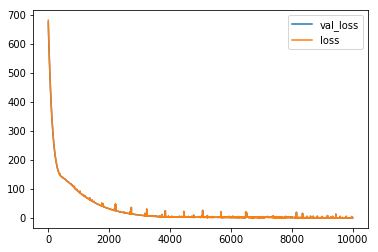

Creating network for 13-dimensional input and 1-dimensional output, with 1 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_293 (Dense)            (None, 100)               1400      
_________________________________________________________________
lambda_65 (Lambda)           (None, 100)               0         
_________________________________________________________________
dense_294 (Dense)            (None, 1)                 101       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_295 (Dense)            (None, 100)               1400      
_________________________________________________________________
dense_296 (Dense)            (None, 1)             

In [63]:
exp = TrainExperiment(x_train, y_train, x_train, y_train, N, p_inference, [0] * (2 + len(N)),
                      task = 'regression', KLips = KLips,
                      activation = activation, do_print = True, epochs = 10000)

In [64]:
get_session().run(tf.gradients([exp.model_correct.layers[-1].output], exp.model_correct.weights), feed_dict = {exp.model_correct.layers[0].input.name: x_train})

[array([[ 0.0000000e+00,  0.0000000e+00, -5.1543171e-05, ...,
          0.0000000e+00,  0.0000000e+00,  9.4854035e-25],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00, -1.3257302e-03, ...,
          0.0000000e+00,  0.0000000e+00,  1.2428490e-22],
        ...,
        [ 0.0000000e+00,  0.0000000e+00, -3.5205462e-03, ...,
          0.0000000e+00,  0.0000000e+00,  4.8372925e-22],
        [ 0.0000000e+00,  0.0000000e+00, -7.0241623e-02, ...,
          0.0000000e+00,  0.0000000e+00,  9.5045613e-21],
        [ 0.0000000e+00,  0.0000000e+00, -2.1123446e-03, ...,
          0.0000000e+00,  0.0000000e+00,  1.9181542e-22]], dtype=float32),
 array([ 0.0000000e+00,  0.0000000e+00, -1.7957772e-04,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  8.2988409e-15,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00, -4.4332335e-17,  0.0000000e+00,
         0.0000000e+00, -6.0826283

In [65]:
W = exp.W
B = exp.B

In [66]:
ps = np.linspace(0, 0.05, 10)

In [67]:
p = np.mean(ps)
exp = Experiment([13] + N + [1], W, B, [0, p, 0], activation = activation, KLips = KLips, do_print = False)

In [68]:
def compute_mean_error_dLdy_v3(exp):
    dLdy = np.sign(exp.predict_correct(x_train).flatten() - y_train.flatten()).flatten()
    error = exp.get_bound_v3(x_train)['mean'].flatten()
    return np.mean(np.multiply(dLdy, error))
def compute_mean_error_dLdy(exp):
    dLdy = np.sign(exp.predict_correct(x_train).flatten() - y_train.flatten()).flatten()
    error = np.mean(exp.compute_error(x_train, repetitions = 20000), axis = 1).flatten()
    return np.mean(np.multiply(dLdy, error))

In [69]:
res = []
res_v3 = []
for p in tqdm(ps):
    exp = Experiment([13] + N + [1], W, B, [0, p, 0], activation = activation, KLips = KLips, do_print = False)
    res += [compute_mean_error_dLdy(exp)]
    res_v3 += [compute_mean_error_dLdy_v3(exp)]
    #K.clear_session()

100%|██████████| 10/10 [00:33<00:00,  3.42s/it]


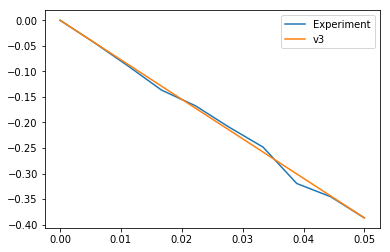

In [70]:
plt.figure()
plt.plot(ps, res, label = 'Experiment')
plt.plot(ps, res_v3, label = 'v3')
plt.legend()
plt.show()

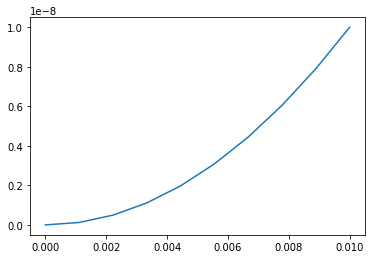

In [46]:
xs = np.linspace(0, 0.01, 10)
plt.plot(xs, [0.0001*x**2 for x in xs])